# **PREDICTING SOCIAL HEALTH INSURANCE FUND CONTRIBUTIONS FROM KENYA’S INFORMAL SECTOR WORKERS**
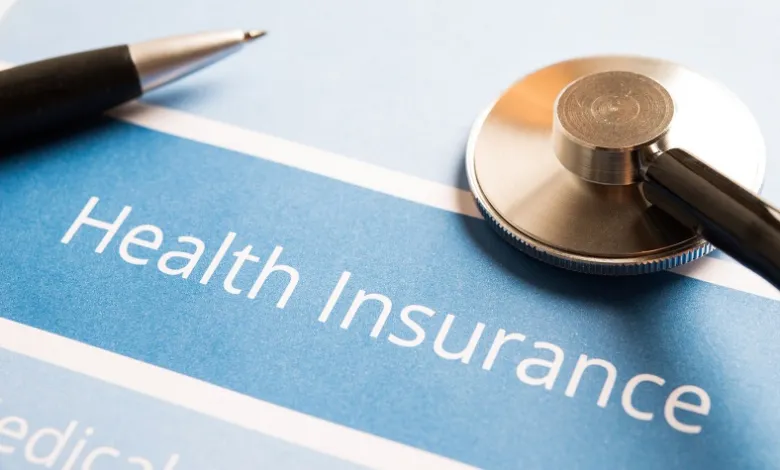

# **COLLABORATORS**
    

1. Cynthia Dalmas
2. Brian Ochieng
3. Nicole Bosibori
4. Nyakio Ruth
5. Edwin Mutendwa             

# **TABLE OF CONTENT**

1. Introduction

2. Business Understanding

3. Data Understanding

4. Problem Statement

5. Objectives

6. Metric of success

7. Preparation and Cleaning the data

8. Exploratory Data Analysis

9. Statistical Analysis

10. Data PreProcessing

11. Modelling

12. Evaluation

13. Conclusion

14. Recommendations

15. Next Steps

## **INTRODUCTION**

In 2023, the government of Kenya enacted the Social Health Insurance Act of 2023, marking a significant step towards Universal Health Coverage. This legislation ensures all citizens can access quality healthcare services without catastrophic health expenses.

An accurate income prediction model can significantly improve the SHIF program. It can streamline contribution collection by determining appropriate amounts for informal workers, ensuring fairness and accuracy. The model can also identify low-income households within the informal sector, enabling targeted social programs that support the most vulnerable. Furthermore, data insights from the model can inform policy decisions directly impacting informal workers and the overall SHIF program, making the system more responsive and efficient.

## **STAKEHOLDERS**

1. Informal Sector Workers: Beneficiaries who will receive fair and accurate contribution assessments and targeted social programs.
2. Government of Kenya: Implementers of the SHIF program who will benefit from streamlined contribution collection and informed policy decisions.

## **BUSINESS UNDERSTANDING**

A critical challenge in implementing this Act lies in determining appropriate contributions from informal sector workers, who make up a substantial portion of the Kenyan workforce. Unlike formal employment with documented salaries, income in the informal sector is often variable and undocumented, complicating the process of contribution assessment. About 80% of Kenya’s population is engaged in the informal sector, and it is difficult to determine the monthly income, and by extension the SHIF contributions, for this sector

## **DATA UNDERSTANDING**


The project aims to use publicly available data from the Kenya National Bureau of Statistics (KNBS), specifically the Kenya - Kenya Demographic and Health Survey 2022. KNBS collects data on household indicators from various regions in Kenya. Some of the variables include:**

Data Link: https://statistics.knbs.or.ke/nada/index.php/catalog/125#metadata-data_collection

    • House Structure: Type and quality of housing.
    
    • Sources of Water: Accessibility and types of water sources.
    
    • Incomes: Documented and estimated income levels.
    
    • Urban or Rural: Classification of the area as urban or rural.


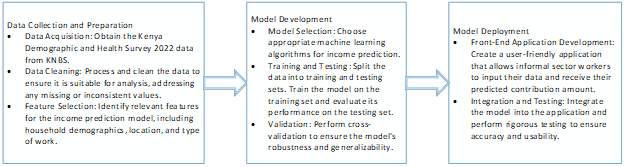



## **PROBLEM STATEMENT**

Determining appropriate contributions for informal sector workers is challenging due to the variable and undocumented nature of their income. This project aims to develop a machine learning model to predict the income of informal sector workers, ensuring accurate and fair contributions to the Social Health Insurance Fund (SHIF).

## **JUSTIFICATION OF THE PROBLEM**

The informal sector is a significant contributor to the Kenyan economy, yet informal workers often face challenges accessing social security benefits due to the undocumented and variable nature of their income. This presents a critical barrier to achieving Universal Health Coverage (UHC) through the Social Health Insurance Fund (SHIF).
Here's why predicting income for informal workers is a crucial problem to address:
- Fair and Equitable Contributions: An accurate income prediction model ensures fair contribution assessments for informal workers to the SHIF. Without such a model, some workers might be under- or over-charged, hindering the program's financial sustainability and fairness.
- Improved Program Efficiency: Streamlining contribution collection through a reliable model reduces administrative burdens, allowing the SHIF to focus on core functions like healthcare provision.
- Targeted Social Programs: Identifying low-income households within the informal sector enables the development of targeted social programs that directly address their needs. This improves the overall impact of social safety nets.
- Data-Driven Policy Decisions: Insights from the model can inform policy changes that better support informal workers and optimize the SHIF program. This promotes a more responsive and effective social security system.


## **OBJECTIVES**

**Main Objective**

1.	Develop a model to predict the contribution of the informal sector workers to the Social Health Insurance Fund based on data from household demographics, location, income group and type of work.

**Specific Objective**

1. Conduct Exploratory Data Analysis (EDA): Analyze the dataset to understand the distribution and relationships of various features and identify patterns associated with Income per month.
2.	Develop a user-friendly interface for informal sector workers to calculate their SHIF contributions using the deployed machine learning model.
3.	Utilize insights from the model to inform and support policy decisions, ensuring that SHIF contributions are fair and equitable for all informal sector workers.


## **METRICS OF SUCCESS**


1. 	Accuracy & F1 Score metrics will be used to evaluate the balance between precision and recall in classifying low-income households within the informal sector, ensuring targeted social programs are accurately directed.
2. ROC curves will be used to identify the best classification model
3. User Satisfaction Score: This metric will gauge the ease of use of the interface to determine their SHIF contribution
4. Policy Impact Assessment: This metric will evaluate how effectively our model's insights support policy decisions.


## **DATA PREPARATION**

Involves loading the dataset and checking to get information on the dataset

In [15]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore")
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud


In [16]:
#read csv files
data=pd.read_csv('Dataset 2.csv')
data.head()

case identification  respondent's year of birth  respondent's current age  \
0            1   4  2                        1987                        34   
1            1  20  2                        1992                        30   
2            1  78  2                        1993                        28   
3            2  15  2                        1995                        27   
4            2  68  2                        1994                        28   

  age in 5-year groups   region type of place of residence  \
0                30-34  mombasa                      urban   
1                30-34  mombasa                      urban   
2                25-29  mombasa                      urban   
3                25-29  mombasa                      urban   
4                25-29  mombasa                      urban   

  highest educational level highest year of education  \
0              no education                       NaN   
1                   primary                         8   
2                    higher                         4   
3              no education                       NaN   
4                    higher                         2   

  source of drinking water time to get to water source  ... currently working  \
0     public tap/standpipe                          15  ...               yes   
1       piped to yard/plot                 on premises  ...               yes   
2     public tap/standpipe                          20  ...               yes   
3        piped to neighbor                 on premises  ...               yes   
4     cart with small tank                 on premises  ...               yes   

                                occupation               occupation (grouped)  \
0                    motor vehicle drivers                     skilled manual   
1                    motor vehicle drivers                     skilled manual   
2  construction and maintenance labour/ers                   unskilled manual   
3                    motor vehicle drivers                     skilled manual   
4                     mechanical engineers  professional/technical/managerial   

  use mobile telephone for financial transactions how much paid in last month  \
0                                             yes                         NaN   
1                                             yes                       10000   
2                                             yes                         NaN   
3                                             yes                         NaN   
4                                             yes                         NaN   

  justifies domestic violence: refuses to cook  \
0                                           no   
1                                           no   
2                                           no   
3                                           no   
4                                           no   

                         respondent education  \
0                                no education   
1                                     primary   
2                                  university   
3                                no education   
4  middle level college (certificate/diploma)   

                            partner education  \
0                                no education   
1                                     primary   
2                         secondary/"a" level   
3                                no education   
4  middle level college (certificate/diploma)   

                       respondent education.1 how much paid in last month.1  
0    informal education (madrasa/adult basic)                         35000  
1                         secondary/"a" level                         20000  
2                                     primary                        100000  
3                                     primary                         12000  
4  middle level college (certificate/diploma)                        

In [17]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 83 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   case identification                                               5285 non-null   object
 1   respondent's year of birth                                        5285 non-null   int64 
 2   respondent's current age                                          5285 non-null   int64 
 3   age in 5-year groups                                              5285 non-null   object
 4   region                                                            5285 non-null   object
 5   type of place of residence                                        5285 non-null   object
 6   highest educational level                                         5285 non-null   object
 7   highest year of education                 

**The DataFrame contains 5285 entries and 82 columns and data types are integers and objects**

**The datatypes have 10 integers and 72 objects**

## **DATA CLEANING**

Data cleaning ensures the insights we get from the data is accurate.


In [20]:
#Make a copy of data
df= pd.read_csv('Dataset 2.csv')

**1.Dropping duplicated and irrelevant columns**

In [22]:
# Drop  columns
df = df.drop(columns=[
    'highest educational level', 'highest year of education', 'time to get to water source',
    'household has: refrigerator', 'religion','husband/partner\'s education level','ethnicity',
    'education in single years', 'household has: telephone (land-line)','educational level',
    'highest year of education (at level in mv106)', 'religion.1','partner education',
    'relationship to household head.1', 'sex of household head.1', 'age of household head.1',
    'literacy.1', 'owns a mobile telephone.1', 'last 12 months use mobile telephone for financial transactions.1',
    'is respondent\'s mobile phone a smart phone.1', 'has an account in a bank or other financial institution.1',
    'use of internet.1', 'frequency of using internet last month.1', 'self reported health status.1',
    'wealth index combined.1', 'husband/partner\'s total number of years of education',
    'justifies domestic violence: refuses to cook', 'respondent education.1','how much paid in last month',
    'occupation','respondent\'s occupation','case identification','wealth index for urban/rural','husband/partner\'s occupation'
])

# Check the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 49 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   respondent's year of birth                                      5285 non-null   int64 
 1   respondent's current age                                        5285 non-null   int64 
 2   age in 5-year groups                                            5285 non-null   object
 3   region                                                          5285 non-null   object
 4   type of place of residence                                      5285 non-null   object
 5   source of drinking water                                        5285 non-null   object
 6   type of toilet facility                                         5285 non-null   object
 7   household has: electricity                                  

**The columns were dropped due to redundancy, duplication, and the lack of impact on the main objective.**

**2.Checking for duplicate rows**

In [25]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**There are no duplicate rows.**

**3.Checking and handling unique values in how much paid in last month**

In [28]:
# Display the count of each unique value in the column 'How Much Paid in Last Month.1'
print(df['how much paid in last month.1'].value_counts())

how much paid in last month.1
10000     454
15000     400
20000     324
5000      310
30000     285
         ... 
14400       1
44200       1
176000      1
18500       1
245000      1
Name: count, Length: 199, dtype: int64


In [29]:
# Replace 'don't know' with NaN and 'did not work in last month' with 0
df['how much paid in last month.1'] = df['how much paid in last month.1'].replace({'don\'t know': np.nan, 'did not work in last month': 0})


**The values did not work in last month and don't know values in the column will be replaced to NaN to improve on the analysis.The Null values(NaN) will be handled in missing values**

**Covert column how much paid in last month to integer for better EDA**

In [32]:
# Convert to numeric, setting failed conversions to NaN
df['how much paid in last month.1'] = pd.to_numeric(df['how much paid in last month.1'], errors='coerce')

**4.Checking and handling the unique values in husband/partner\'s occupation**

In [34]:
# Display the unique values and their counts for 'husband/partner's occupation (grouped)'
print(df['husband/partner\'s occupation (grouped)'].value_counts())

husband/partner's occupation (grouped)
skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
.a                                     11
Name: count, dtype: int64


In [35]:
# Replace ".a" with "Unknown" in "husband/partner's occupation (grouped)"
df['husband/partner\'s occupation (grouped)'] = df['husband/partner\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify
print(df['husband/partner\'s occupation (grouped)'].value_counts())


husband/partner's occupation (grouped)
skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
Unknown                                11
Name: count, dtype: int64


**Replace rows where 'husband/partner's occupation (grouped)' is '.a' to improve on the data analysis**

**5.Checking and handling the unique values 'type of cooking fuel'**

In [38]:
# Display the unique values and their counts for 'type of cooking fuel'
print(df['type of cooking fuel'].value_counts())

type of cooking fuel
wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
alcohol/ethanol               4
17                            4
15                            1
agricultural crop             1
solar power                   1
Name: count, dtype: int64


In [39]:
# Replace '17' and '15' with 'unknown' in the 'type of cooking fuel' column
df['type of cooking fuel'] = df['type of cooking fuel'].replace(['17', '15'], 'unknown')

# Verify
print(df['type of cooking fuel'].value_counts())


type of cooking fuel
wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
unknown                       5
alcohol/ethanol               4
agricultural crop             1
solar power                   1
Name: count, dtype: int64


**Replace the rows where 'type of cooking fuel' is '17' or '15' with unknown for better data analysis**

**6.Checking and handling unique values and their counts for 'occupation (grouped)'**

In [42]:
# Display the unique values and their counts for 'occupation (grouped)'
occupation_grouped_counts = df['occupation (grouped)'].value_counts()

# Print the counts
print(occupation_grouped_counts)

occupation (grouped)
agriculture - employee               1438
skilled manual                       1248
professional/technical/managerial     907
unskilled manual                      556
sales                                 383
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               58
.a                                     19
Name: count, dtype: int64


In [43]:
# Replace ".a" with "Unknown" in "occupation (grouped)"
df['occupation (grouped)'] = df['occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['occupation (grouped)'].value_counts())

occupation (grouped)
agriculture - employee               1438
skilled manual                       1248
professional/technical/managerial     907
unskilled manual                      556
sales                                 383
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               58
Unknown                                19
Name: count, dtype: int64


**Replace rows where 'occupation (grouped)' is '.a' with unknown give insight to the data**

**7.Checking and handling unique values and their counts for respondent's occupation (grouped)**

In [46]:
# Display the unique values and their counts for 'occupation (grouped)'
respondent_occupation_grouped_counts = df['respondent\'s occupation (grouped)'].value_counts()

# Print the counts
print(respondent_occupation_grouped_counts)

respondent's occupation (grouped)
not working                          2002
agricultural - employee              1017
professional/technical/managerial     852
unskilled manual                      399
sales                                 367
services                              256
household and domestic                210
skilled manual                         58
don't know                             45
clerical                               39
agricultural - self employed           34
.a                                      6
Name: count, dtype: int64


In [47]:
# Replace ".a" with "Unknown" in "respondent's occupation (grouped)"
df['respondent\'s occupation (grouped)'] = df['respondent\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['respondent\'s occupation (grouped)'].value_counts())

respondent's occupation (grouped)
not working                          2002
agricultural - employee              1017
professional/technical/managerial     852
unskilled manual                      399
sales                                 367
services                              256
household and domestic                210
skilled manual                         58
don't know                             45
clerical                               39
agricultural - self employed           34
Unknown                                 6
Name: count, dtype: int64


**Replace rows where 'respondent's occupation (grouped)' is '.a' with unknown give insight to the data**

**8.Checking for missing values**

In [50]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

is respondent's mobile phone a smart phone    957
how much paid in last month.1                 675
dtype: int64

**Handling the missing values**

In [52]:
# Fill missing values in 'is respondent's mobile phone a smart phone' with mode
df['is respondent\'s mobile phone a smart phone'] = df['is respondent\'s mobile phone a smart phone'].fillna(df['is respondent\'s mobile phone a smart phone'].mode()[0])

# Impute missing income values with the median
df['how much paid in last month.1'] = df['how much paid in last month.1'].fillna(df['how much paid in last month.1'].median())


In [53]:
# Confirm missing values
missing_values = df.isnull().sum()
missing_values

respondent's year of birth                                        0
respondent's current age                                          0
age in 5-year groups                                              0
region                                                            0
type of place of residence                                        0
source of drinking water                                          0
type of toilet facility                                           0
household has: electricity                                        0
household has: radio                                              0
household has: television                                         0
household has: bicycle                                            0
household has: motorcycle/scooter                                 0
household has: car/truck                                          0
main floor material                                               0
main wall material                              

**The missing values in is respondents mobile phone a smart phone  was filled with mode and and how much paid in last month.1 was filled with median reasons is the datatype of each**

**9.Checking for outliers**

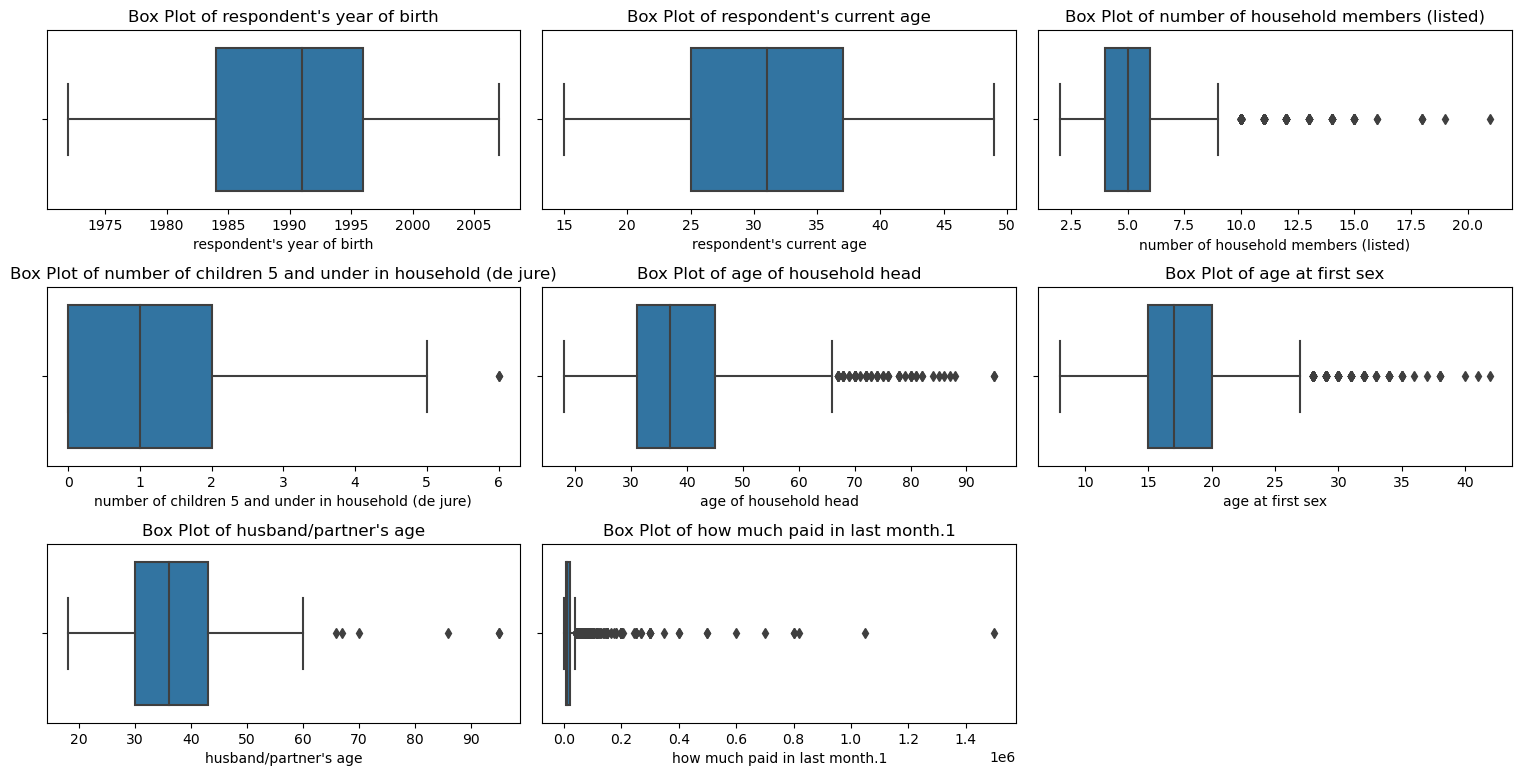

In [56]:
# Select numeric columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

**Handle the outliers  by capping them inorder to maintain all datapoints**

In [58]:
# Function to cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df = cap_outliers(df, column)

# Check the shape of the dataframe after capping outliers
print(df.shape)


(5285, 49)


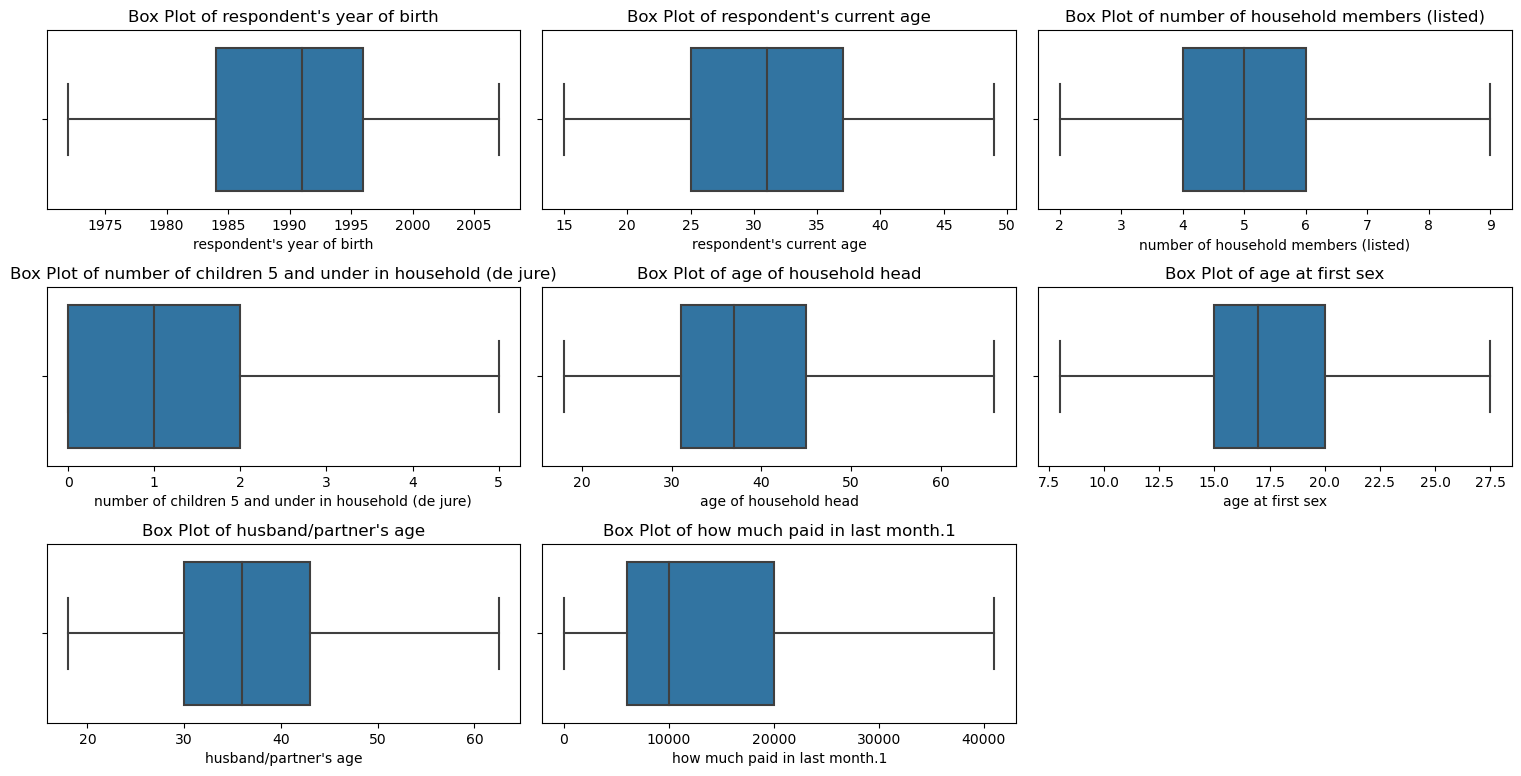

In [59]:
# Confirm the outliers were handled
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

# Plot box plots for numeric columns
# Set colors to match the Kenyan flag
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [60]:
df.to_csv('df.csv', index=False)

#  **EXPLORATORY DATA ANALYSIS 📉**

In [62]:
df.columns

Index(['respondent's year of birth', 'respondent's current age',
       'age in 5-year groups', 'region', 'type of place of residence',
       'source of drinking water', 'type of toilet facility',
       'household has: electricity', 'household has: radio',
       'household has: television', 'household has: bicycle',
       'household has: motorcycle/scooter', 'household has: car/truck',
       'main floor material', 'main wall material', 'main roof material',
       'number of household members (listed)',
       'number of children 5 and under in household (de jure)',
       'educational attainment', 'relationship to household head',
       'sex of household head', 'age of household head', 'literacy',
       'type of cooking fuel', 'owns a mobile telephone',
       'last 12 months use mobile telephone for financial transactions',
       'is respondent's mobile phone a smart phone',
       'has an account in a bank or other financial institution',
       'use of internet', 'frequency

**Notebook Colours**

In [64]:
kenya_colors = ['#000000', '#ff0000', '#006600']

The project utilizes the Kenya flag colors. The colors of the Kenyan flag serve as powerful symbols that can be integrated into your visualizations to convey deeper meanings. Black (#000000) represents the unity and diversity of the Kenyan people, particularly emphasizing the large population involved in the informal sector. This sector encompasses a wide range of occupations and demographics, reflecting the varied needs and challenges faced by those not covered by formal employment benefits, such as social health insurance.

Red (#ff0000), symbolizing the blood shed for independence, can be related to the ongoing struggle for economic empowerment and access to essential services, like healthcare, for those in the informal sector. The drive to extend social health insurance coverage to this segment of the population is a modern-day extension of the fight for equality and social justice. Green (#006600) represents Kenya’s natural wealth and the potential for growth and sustainability within the informal sector. As the government aims to provide health insurance, the green color underscores the importance of supporting this sector to ensure economic stability and improved living conditions.

### **Educational Attainment**

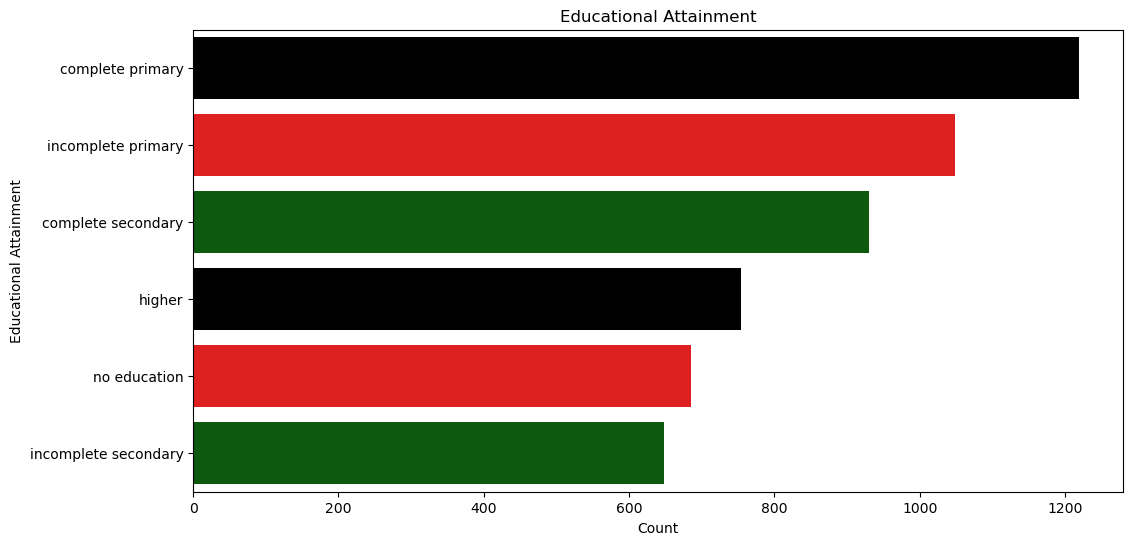

In [67]:
# Plot educational attainment
plt.figure(figsize=(12, 6))
sns.countplot(y='educational attainment', data=df, order=df['educational attainment'].value_counts().index, palette=kenya_colors)
plt.title('Educational Attainment')
plt.xlabel('Count')
plt.ylabel('Educational Attainment')
plt.savefig('educational_attainment.png')
plt.show()


The graph displays the educational attainment levels within a sampled Kenyan population. The largest group has completed primary education, followed by those with incomplete primary education. A notable portion of the sample has also completed secondary education, while fewer individuals have attained higher education or have no formal education. This distribution provides insights into the overall educational landscape, which is essential for understanding the broader socio-economic dynamics and planning targeted interventions or policies.

**Income distribution by place of residence**

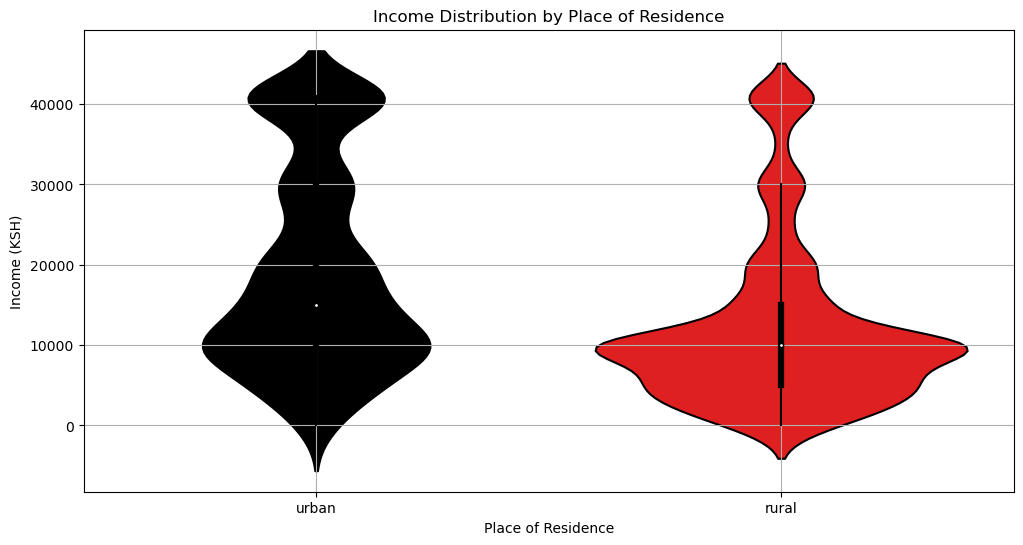

In [70]:

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot( x='type of place of residence', y='how much paid in last month.1', data=df,palette=kenya_colors)

plt.title('Income Distribution by Place of Residence')
plt.xlabel('Place of Residence')
plt.ylabel('Income (KSH)')
plt.grid(True)
plt.savefig('violin Income by place place of residence.png')  # Save the plot as a PNG file

plt.show()


The violin plot above illustrates the income distribution by place of residence, specifically comparing urban and rural areas. The plot shows that urban areas have a wider spread of income distribution, with the highest density around the 20,000 to 30,000 KSH range. There are also several outliers that extend above 40,000 KSH, indicating some urban residents earn significantly more. In contrast, the rural income distribution is more concentrated, with the majority of values clustering between 10,000 and 20,000 KSH. This suggests that while urban areas have greater income inequality with higher income potential, rural areas exhibit more uniformity in income, albeit at a generally lower level.

**Occupation**

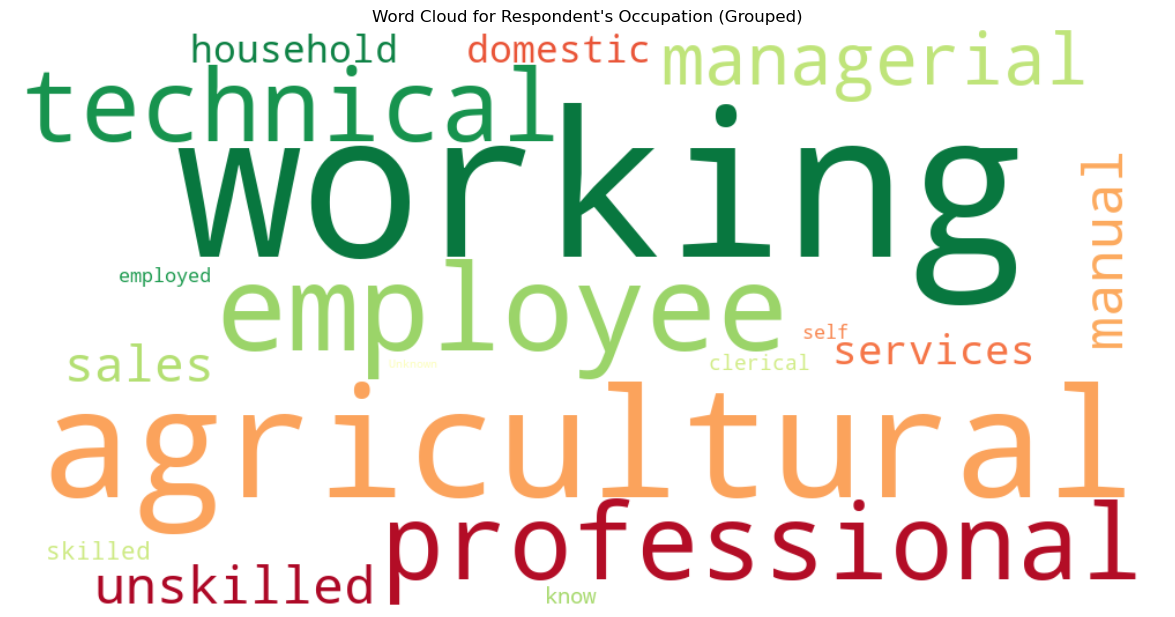

In [73]:
# Combine all text data from the "respondent's occupation (grouped)" column into a single string
text_data = ' '.join(df["respondent's occupation (grouped)"].dropna().astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500,  background_color='white',  colormap='RdYlGn', collocations=False).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Respondent's Occupation (Grouped)")
plt.axis('off')
plt.savefig('wordcloud_occupation.png')  # Save the plot as a PNG file
plt.show()

The word cloud visualization highlights the most frequently occurring words related to respondents' occupations in the dataset. Larger and bolder words, such as "working," "employee," "agricultural," and "technical," indicate higher frequency, suggesting they are common occupations or associated terms. The diverse range of terms such as "professional," "manual," "managerial," "skilled," and "unskilled" reflects the variety of employment types, skill levels, and sectors represented among the respondents. The prominence of words like "agricultural" and "services" suggests a significant portion of respondents work in these sectors.

**Age distribution of education**

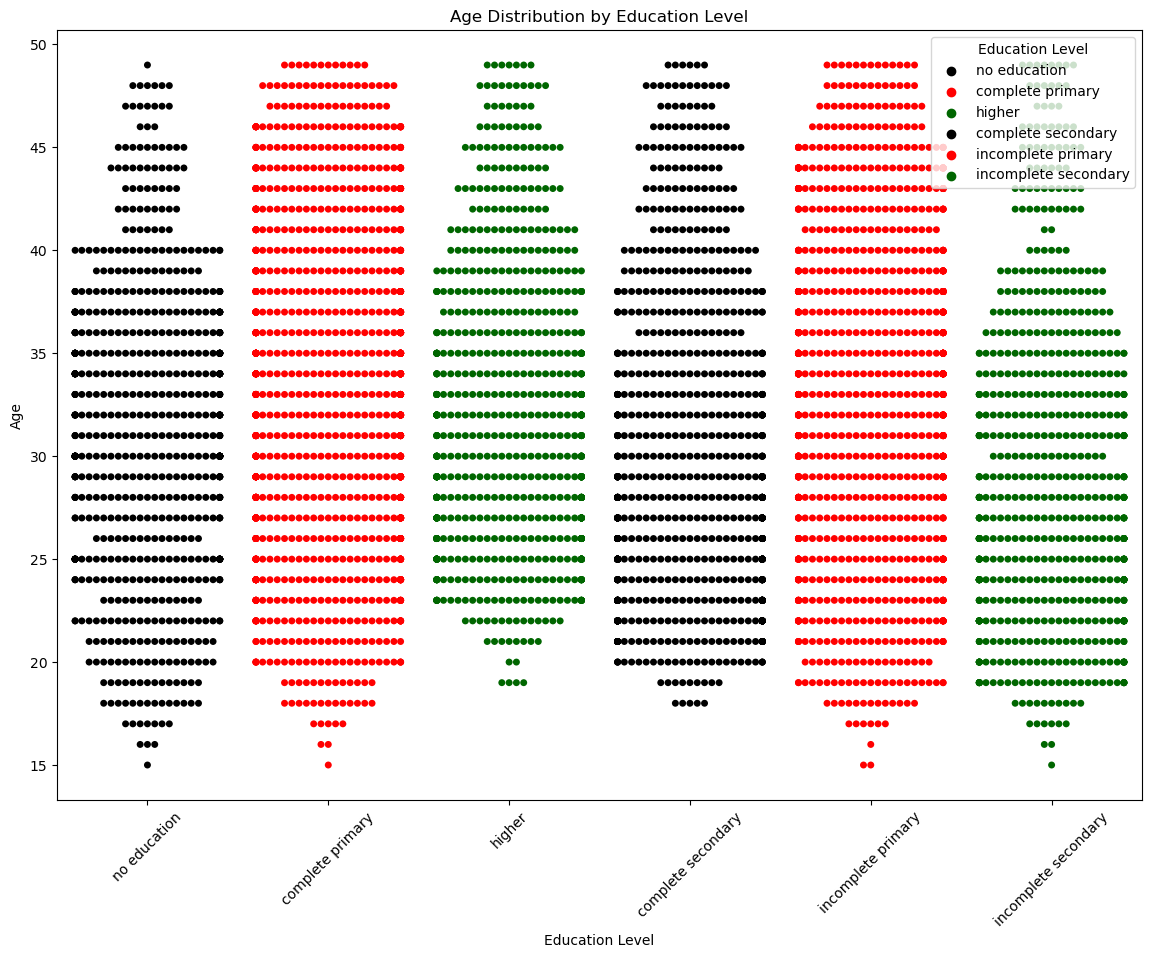

In [76]:
# Create the swarm plot
plt.figure(figsize=(14, 10))
sns.swarmplot(x='educational attainment', y='respondent\'s current age', data=df, hue='educational attainment', palette=kenya_colors, size=5)

# Customize the plot
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('Age Distribution by Education Level')
plt.xticks(rotation=45)

# Show plot
plt.legend(title='Education Level', loc='upper right')
plt.savefig('Age distribution of education.png')  # Save the plot as a PNG file
plt.show()

The dot plot illustrates the age distribution across different education levels, revealing insights into educational attainment patterns. Each dot represents an individual, showing how ages are distributed within categories like "no education," "complete primary," "higher," "complete secondary," "incomplete primary," and "incomplete secondary." Notably, "no education" and "complete primary" span a broad age range from 15 to 50, indicating that these educational levels include individuals of varying ages. Conversely, the "higher" education category is more concentrated among younger individuals, mainly between 20 and 35 years, suggesting that higher education is more accessible or prioritized among the younger generation. The "complete secondary" and "incomplete secondary" categories show a spread across ages 15 to 45, indicating diverse educational experiences. In contrast, "incomplete primary" has a narrower age distribution, mainly from 20 to 35.

**Average Income by Education**

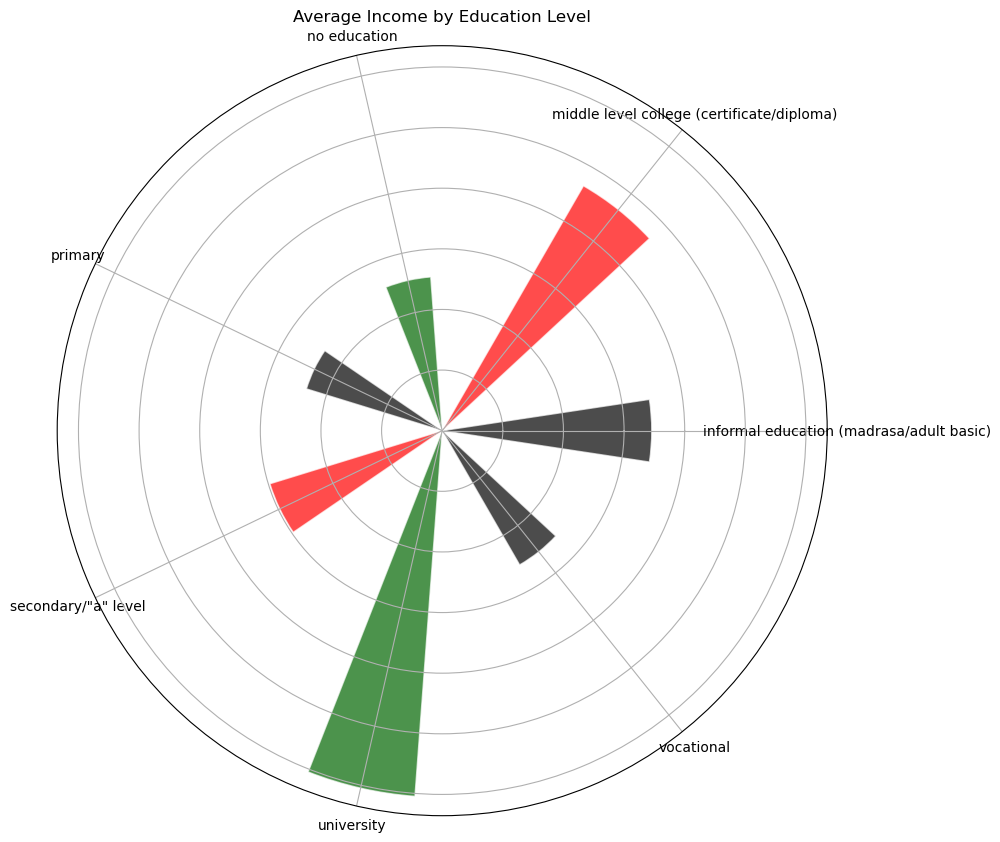

In [79]:
# Calculate average income by education level
avg_income_by_education = df.groupby('respondent education')['how much paid in last month.1'].mean()

# Create a circular bar plot
plt.figure(figsize=(10, 10))
angles = np.linspace(0, 2 * np.pi, len(avg_income_by_education), endpoint=False).tolist()
values = avg_income_by_education.tolist()

ax = plt.subplot(111, polar=True)
ax.bar(angles, values, color=kenya_colors, alpha=0.7, width=0.3, edgecolor='white')

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(avg_income_by_education.index, fontsize=10)

plt.title('Average Income by Education Level')
plt.savefig('Average Income distribution by education.png')  # Save the plot as a PNG file

plt.show()


The radar chart visualizes the average income distribution across various education levels, providing insights into how education correlates with earning potential. Each spoke of the chart represents a different education level, including "no education," "primary," "secondary/'A' level," "middle-level college (certificate/diploma)," "informal education (madrasa/adult education)," "vocational," and "university." The length and color intensity of each segment reflect the average income associated with each education level. The "university" segment is the longest, indicating that individuals with a university education tend to have the highest average income. In contrast, "informal education" and "no education" have shorter segments, suggesting lower average incomes for these groups. Middle-level college and secondary education also show significant average incomes, although not as high as university education. The chart highlights the positive correlation between higher education levels and increased income, emphasizing the economic benefits of advanced educational attainment.

**Occupational Distribution**

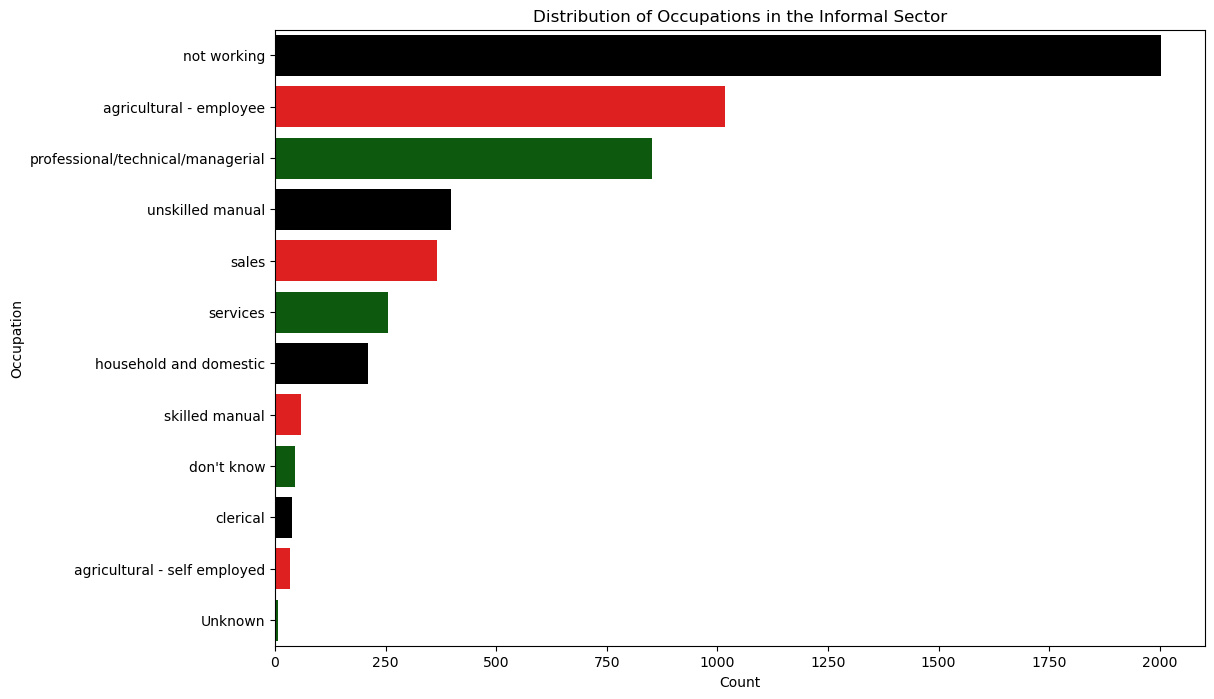

In [82]:
# Plot occupation distribution
plt.figure(figsize=(12, 8))
sns.countplot(y="respondent's occupation (grouped)", data=df, order=df["respondent's occupation (grouped)"].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Occupations in the Informal Sector')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.savefig('occupation_distribution.png')  # Save the plot as a PNG file
plt.show()


The graph illustrates the distribution of occupations within a sampled population in the informal sector. A large portion of individuals in this sample are not currently working. Among those employed, the most common occupation is in agriculture as employees, followed by professional/technical/managerial roles. Other significant occupational categories include unskilled manual labor and sales, while a smaller number of people work in services, household and domestic roles, skilled manual jobs, and clerical positions. This distribution highlights the diversity of occupations within the informal sector and underscores the varied economic activities individuals engage in. Understanding these occupational patterns is crucial for assessing income levels and developing targeted support programs.

### **Assets and Resources**

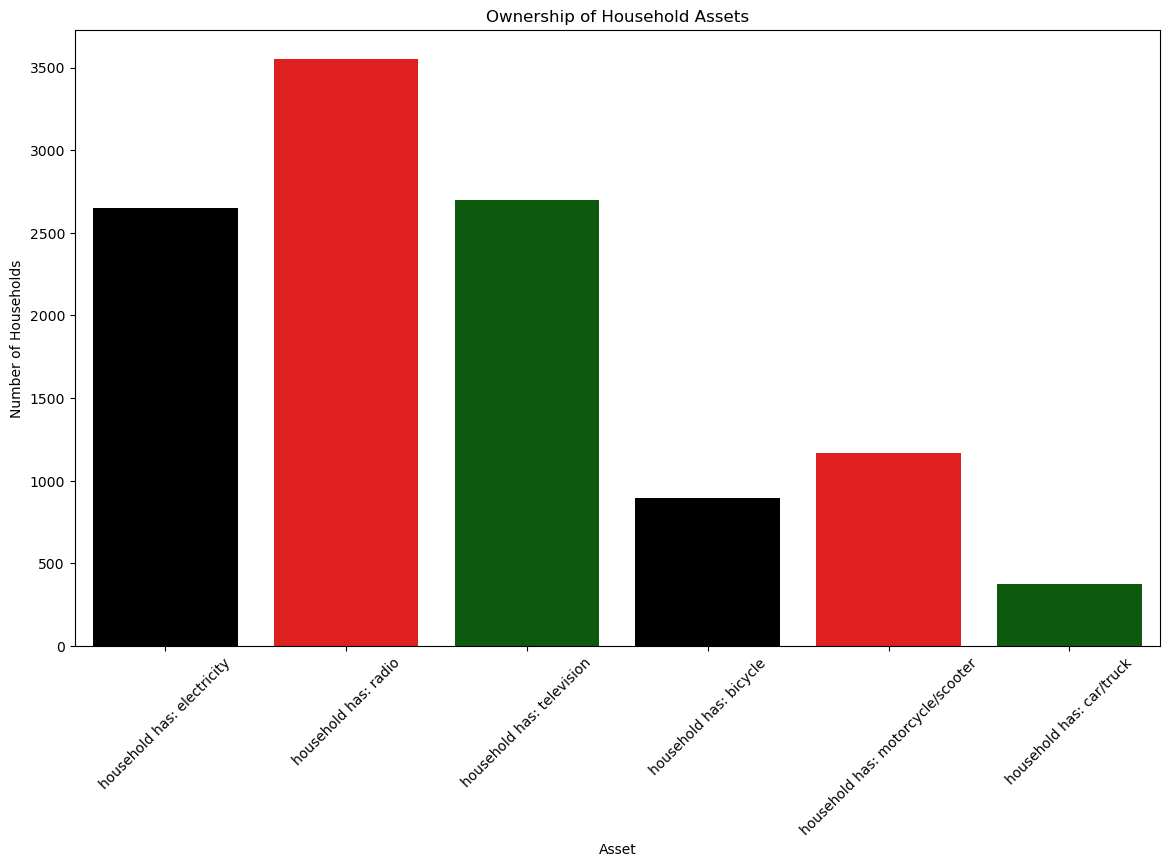

In [85]:
# Household asset ownership
assets = [
    'household has: electricity', 'household has: radio', 'household has: television',
    'household has: bicycle', 'household has: motorcycle/scooter', 'household has: car/truck'
]

# Plot ownership of household assets
plt.figure(figsize=(14, 8))
asset_counts = df[assets].apply(lambda x: x.value_counts().get('yes', 0), axis=0)
sns.barplot(x=asset_counts.index, y=asset_counts.values, palette=kenya_colors)
plt.title('Ownership of Household Assets')
plt.xlabel('Asset')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.savefig('household_assets.png')  # Save the plot as a PNG file
plt.show()


Radios and televisions are the most commonly owned assets, followed by electricity access, indicating a moderate level of connectivity and access to information. Bicycles are also relatively common, suggesting their role in transportation for many households. Fewer households own motorcycles or scooters, and even fewer have access to cars or trucks, highlighting a limited presence of motorized personal transportation. This asset distribution reflects the economic conditions and lifestyle choices within the population, providing insights into their living standards and potential needs for social programs.

### **Region of residence**

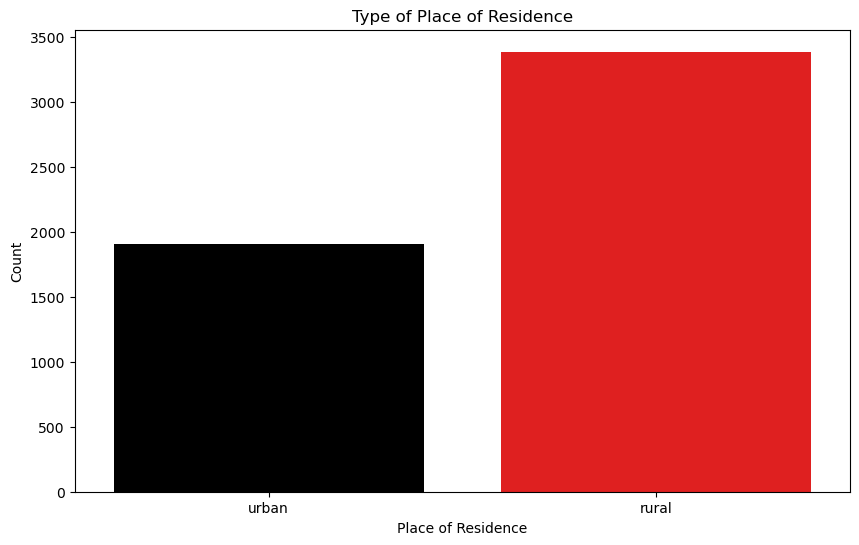

In [88]:
# Type of place of residence
plt.figure(figsize=(10, 6))
sns.countplot(x='type of place of residence', data=df, palette=kenya_colors)
plt.title('Type of Place of Residence')
plt.xlabel('Place of Residence')
plt.ylabel('Count')
plt.savefig('place_of_residence.png')  # Save the plot as a PNG file
plt.show()

Majority of individuals live in rural areas compared to urban areas. This skewed distribution highlights the dominance of rural living, which could affect access to services, infrastructure, and economic opportunities. Understanding this residential pattern is crucial for policymakers and planners when designing programs aimed at improving living standards and providing targeted support, particularly in rural areas where there might be more significant needs for development and resources.

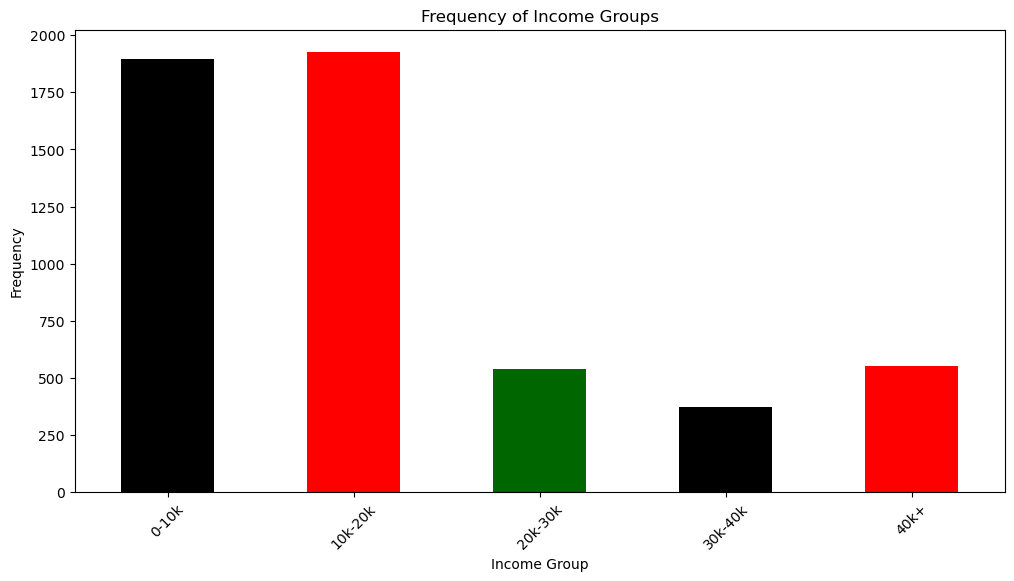

In [90]:

bins = [0, 10000, 20000, 30000, 40000, float('inf')]
bin_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# Bin the income data
df['income_group'] = pd.cut(df['how much paid in last month.1'], bins=bins, labels=bin_labels, right=False)

# Count the frequencies of each income group
income_group_counts = df['income_group'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
income_group_counts.plot(kind='bar', color=kenya_colors)
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Frequency of Income Groups')
plt.xticks(rotation=45)
plt.savefig('income_group_distribution.png', bbox_inches='tight')

plt.show()


The majority of individuals fall within the lower income brackets of 0-10k and 10k-20k, indicating a significant portion of the population earns relatively low incomes. Fewer individuals are found in the 20k-30k, 30k-40k, and 40k+ income groups. This distribution suggests a high concentration of lower-income earners, which is important for designing financial support programs and policies aimed at income redistribution and poverty alleviation.

### **Distribution of respondent income by years of birth**

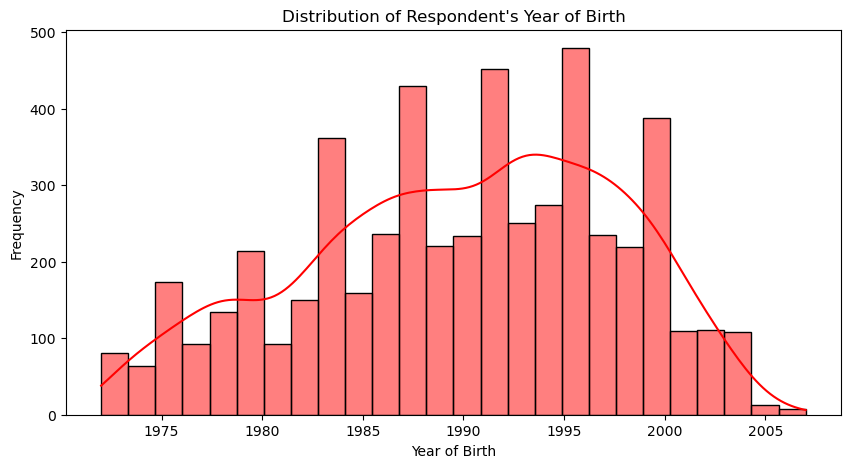

In [93]:
# Plot distribution of Respondent's Year of Birth
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="respondent's year of birth", kde=True, color=kenya_colors[1])
plt.title("Distribution of Respondent's Year of Birth")
plt.xlabel("Year of Birth")
plt.ylabel("Frequency")

# Save the plot as a PNG file
plt.savefig('respondents_year_of_birth_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph depicts the distribution of respondents' years of birth, showing a higher frequency of individuals born between 1985 and 2000. This indicates that the majority of the sampled population is relatively young, falling within the age range of approximately 20 to 40 years old. The distribution peaks around the mid-1990s, reflecting a significant number of births during that period. Fewer respondents were born before 1980 or after 2000, suggesting a lower representation of older and very young individuals in the sample.

### **Distribution of the respondents by current age**

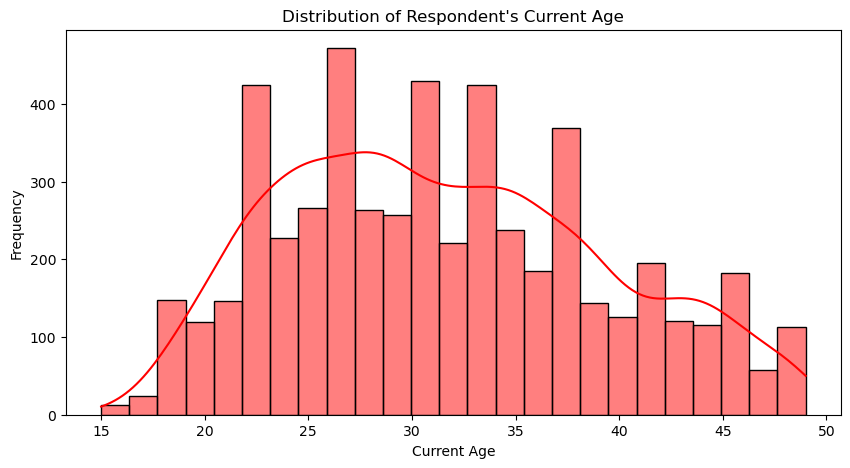

In [96]:
# Plot distribution of Respondent's Current Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="respondent's current age", kde=True, color=kenya_colors[1])
plt.title("Distribution of Respondent's Current Age")
plt.xlabel("Current Age")
plt.ylabel("Frequency")

# Save the plot as a PNG file
plt.savefig('respondents_current_age_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph shows the distribution of respondents' current ages, with a significant concentration of individuals in their mid-20s to mid-30s. The peak age group is around 25 to 30 years, indicating that the sample is predominantly composed of young adults. The distribution tapers off towards both younger (below 20) and older ages (above 45), suggesting fewer respondents in these age ranges. This age distribution highlights a young population that could be key to driving economic and social dynamics, emphasizing the need for targeted policies and programs that address the priorities and challenges faced by this age group.

### **Distribution of Respondent's Current Age**

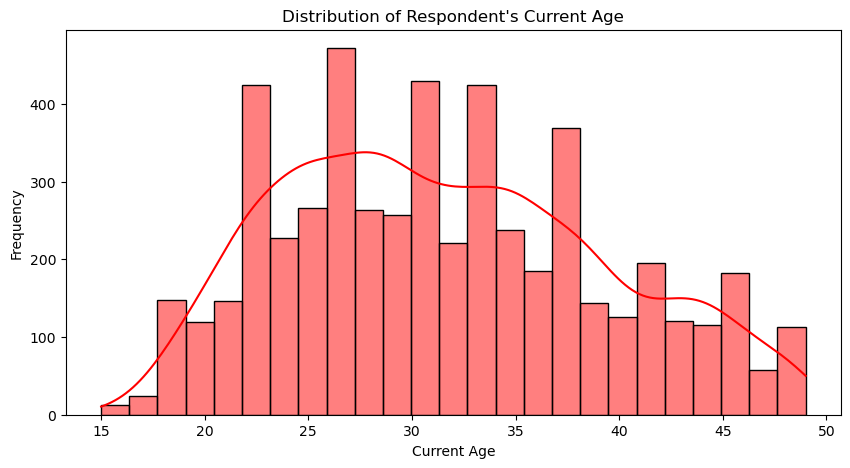

In [99]:
# Plot distribution of Respondent's Current Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="respondent's current age", kde=True, color=kenya_colors[1])  # Using black color
plt.title("Distribution of Respondent's Current Age")
plt.xlabel("Current Age")  # Adds label to the x-axis
plt.ylabel("Frequency")    # Adds label to the y-axis
#plt.grid(True, alpha=0.7)

# Save the plot as a PNG file
plt.savefig('respondents_current_age_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph displays the distribution of respondents' current ages, revealing a concentration of individuals in their mid-20s to mid-30s. This age group appears most frequently, suggesting that young adults form the largest segment of the sampled population. The distribution peaks around the late 20s, indicating a significant representation of individuals in this age range. As the age increases past 35, the frequency decreases, showing fewer respondents in the older age groups. This demographic profile underscores the importance of focusing on the needs and opportunities for young adults, as they represent a substantial portion of the population and may have different socioeconomic challenges and opportunities compared to older age groups.

### **Distribution of Age**

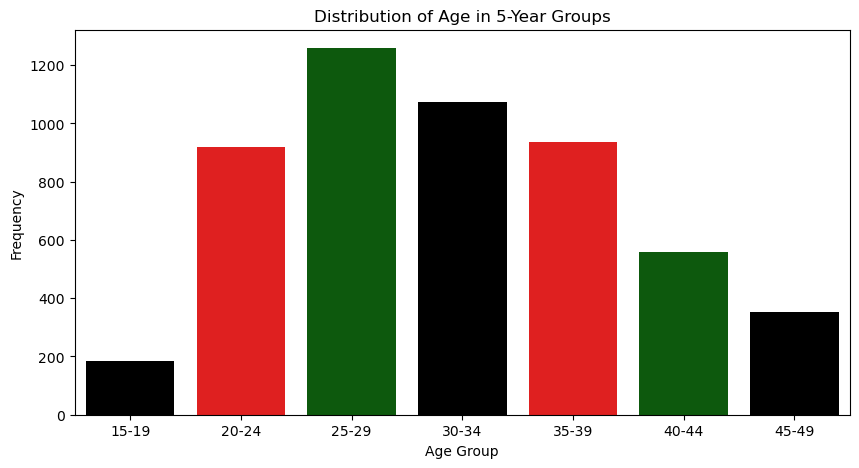

In [102]:
# Ensure 'age in 5-year groups' is treated as a categorical variable
df['age in 5-year groups'] = df['age in 5-year groups'].astype('category')

# Plot distribution of age in 5-year groups
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age in 5-year groups', palette=kenya_colors)
plt.title('Distribution of Age in 5-Year Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
# Save the plot as a PNG file
plt.savefig('age_in_5_year_groups_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The age group 25-29 is the most prominent, indicating a significant portion of the population falls within this range. This is closely followed by the 30-34 and 20-24 age groups, highlighting a strong representation of young adults. As the age groups increase beyond 35, the frequency decreases, with the 45-49 age group being the least represented. This pattern underscores a youthful demographic, suggesting that programs and policies focused on young adults could have substantial impacts.

### **Distribution of informal sector by region**

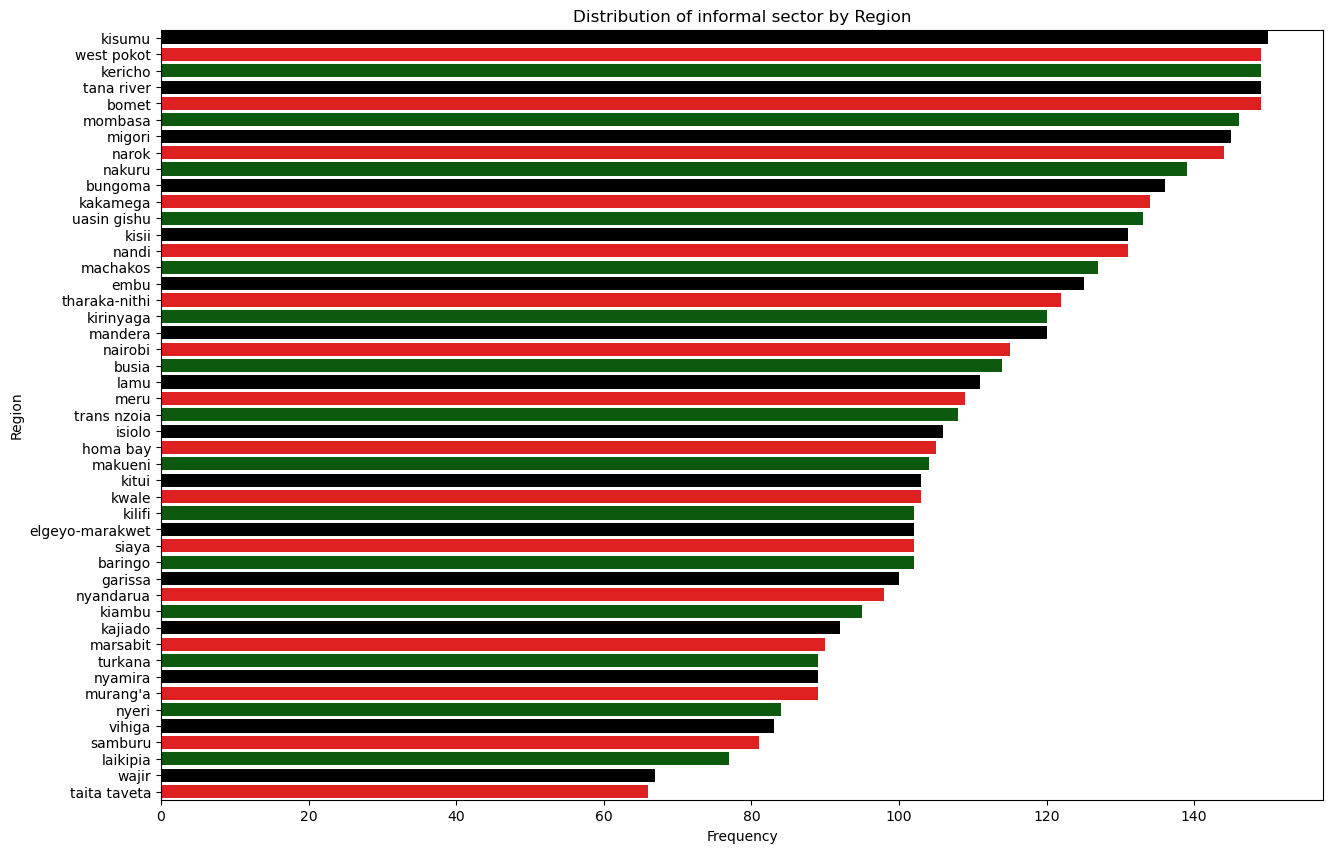

In [105]:
# Plot distribution of Region
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of informal sector by Region')
plt.xlabel('Frequency')
plt.ylabel('Region')

# Save the plot as a PNG file
plt.savefig('region_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph illustrates the distribution of the informal sector across various regions. The regions are ranked by frequency, with Kisumu, West Pokot, and Kericho showing the highest levels of informal sector activity. This regional analysis highlights areas with substantial informal economic activities, suggesting where economic interventions and support might be most needed. Conversely, regions like Taita Taveta and Wajir exhibit lower frequencies, potentially indicating lesser informal sector involvement or different economic structures.

### **Sources of drinking water**

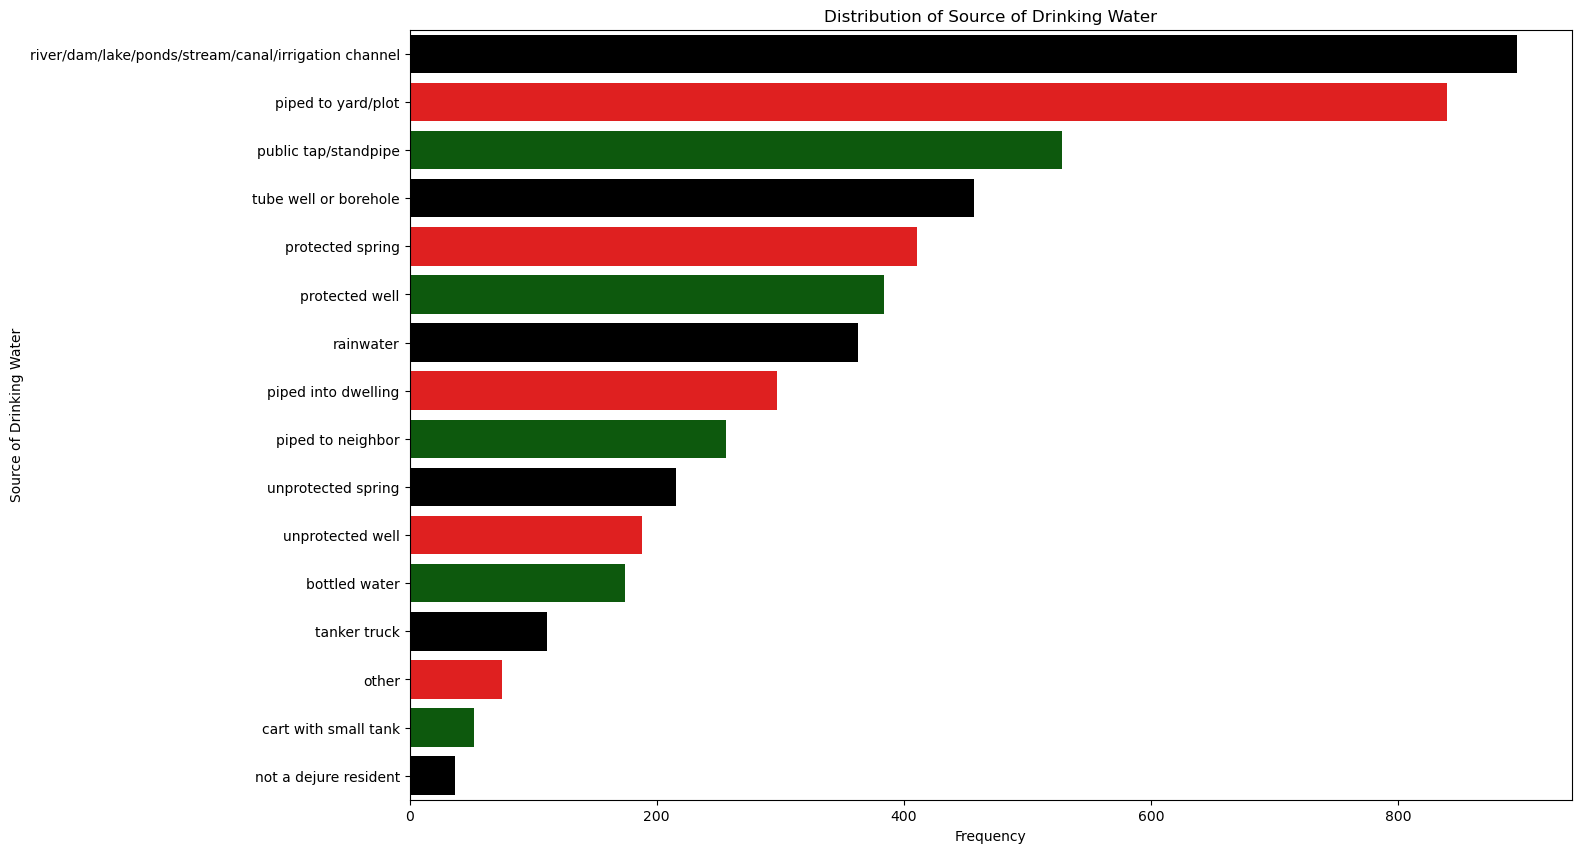

In [108]:
# Plot distribution of Source of Drinking Water
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='source of drinking water', order=df['source of drinking water'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Source of Drinking Water')
plt.xlabel('Frequency')
plt.ylabel('Source of Drinking Water')

# Save the plot as a PNG file
plt.savefig('source_of_drinking_water_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()


The graph illustrates the distribution of sources of drinking water among the sampled population. The most common sources are natural water bodies such as rivers, dams, lakes, ponds, streams, canals, and irrigation channels, followed by piped water to yards or plots. Public taps or standpipes and tube wells or boreholes also serve as significant water sources. Protected sources like springs and wells are more frequently used than unprotected ones, indicating some level of awareness and access to safer drinking water options. However, the reliance on natural water bodies highlights potential vulnerabilities in water safety and accessibility, underscoring the need for improved water infrastructure and sanitation practices.

### **Distribution of type of toilet facility**

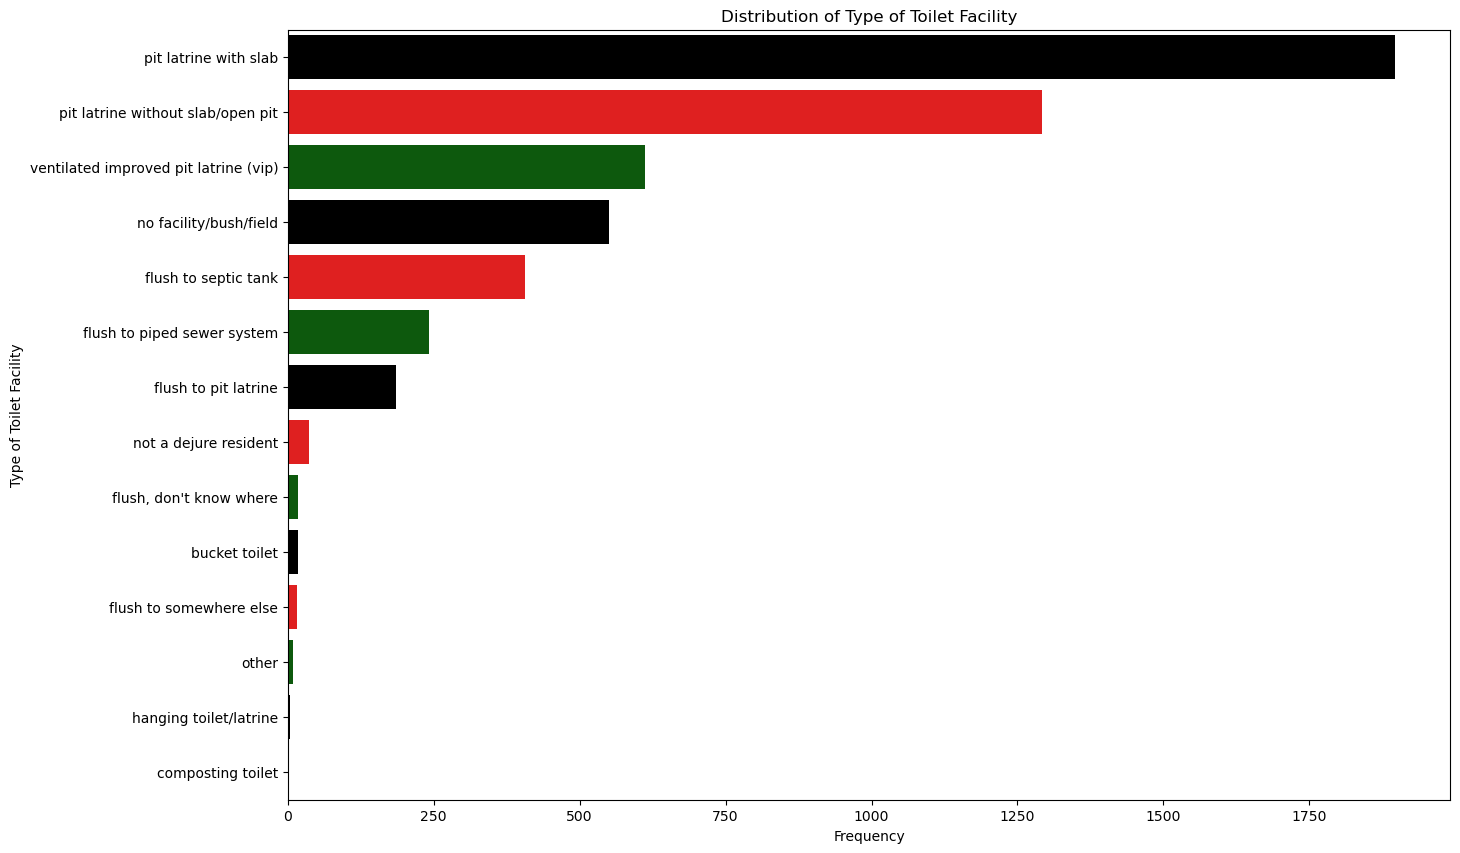

In [111]:
# Plot distribution of Type of Toilet Facility
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of toilet facility', order=df['type of toilet facility'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Type of Toilet Facility')
plt.xlabel('Frequency')
plt.ylabel('Type of Toilet Facility')

# Save the plot as a PNG file
plt.savefig('type_of_toilet_facility_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph shows the distribution of different types of toilet facilities used by the sampled population. The most common facility is a pit latrine with a slab, followed by a pit latrine without a slab or open pit, indicating a heavy reliance on basic sanitation options. Ventilated Improved Pit Latrines (VIPs) and the absence of any facility (bush/field) are also prominent. Flush toilets connected to septic tanks and piped sewer systems are less common, highlighting disparities in access to improved sanitation. This distribution reflects the varied sanitation infrastructure and emphasizes the need for targeted interventions to improve access to safe and hygienic toilet facilities. Investing in better sanitation facilities can significantly enhance public health outcomes and quality of life for the communities represented in the dataset.

### **Distribution of households with electricity**

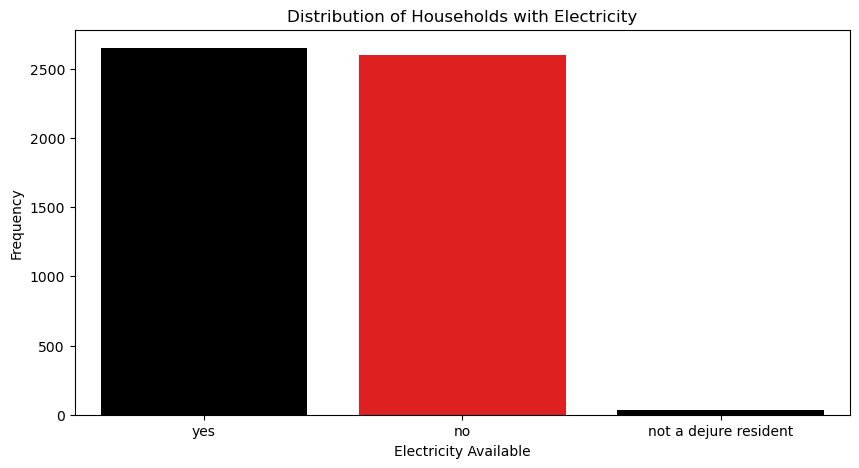

In [405]:
# Plot distribution of Household Has: Electricity
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: electricity', order=df['household has: electricity'].value_counts().index, palette=kenya_colors[:2])
plt.title('Distribution of Households with Electricity')
plt.xlabel('Electricity Available')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('household_has_electricity_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph illustrates the distribution of electricity availability among households in the sampled population. It shows that the number of households with electricity is almost equal to those without it, highlighting a significant disparity in access to electrical infrastructure. A very small fraction of the population is classified as "not a de jure resident," indicating transient or informal housing situations.



**Distribution of main floor material**

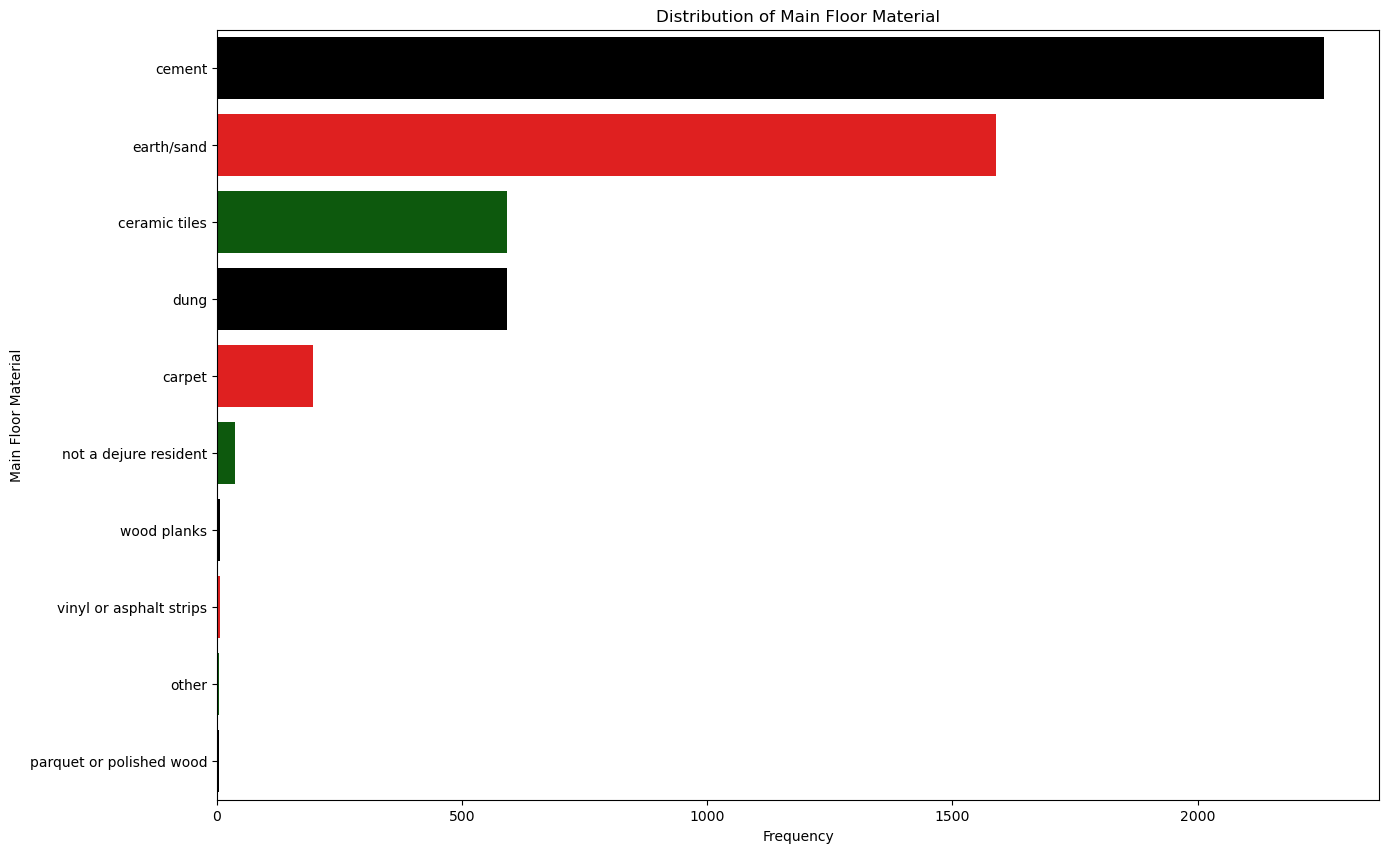

In [117]:
# Plot distribution of Main Floor Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main floor material', order=df['main floor material'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Main Floor Material')
plt.xlabel('Frequency')
plt.ylabel('Main Floor Material')

# Save the plot as a PNG file
plt.savefig('main_floor_material_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph illustrates the distribution of main floor materials used in households. Cement is the most common flooring material, followed by earth or sand, indicating a mix of durable and basic flooring options. Ceramic tiles and dung are also used, reflecting variations in economic status and availability of materials. Less common materials include carpet, wood planks, vinyl or asphalt strips, and parquet or polished wood, suggesting that more expensive or specialized flooring options are less accessible. The use of basic materials like earth/sand and dung highlights economic disparities and the need for improved housing conditions.

### **Distribution of main wall material**

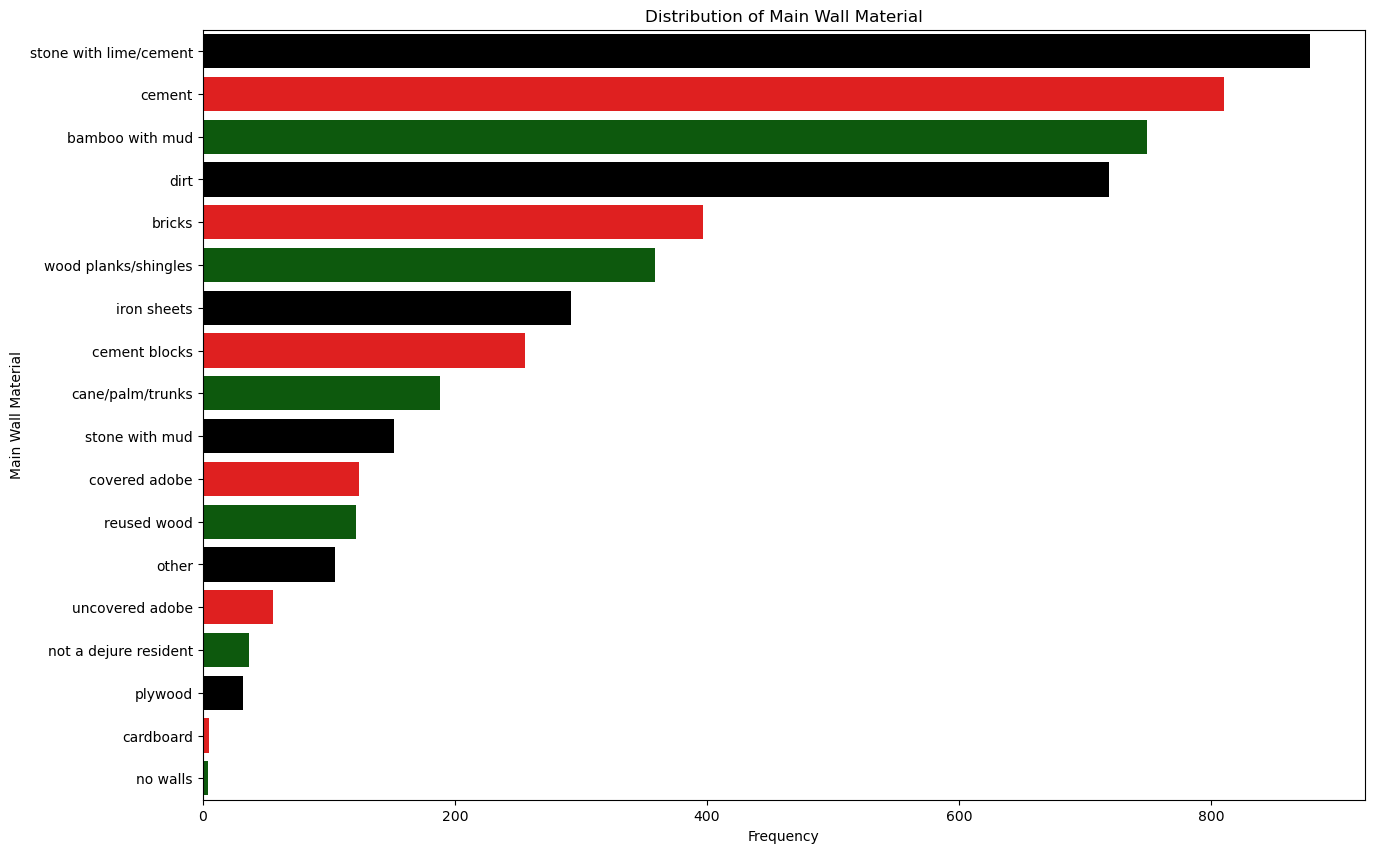

In [120]:
# Plot distribution of Main Wall Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main wall material', order=df['main wall material'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Main Wall Material')
plt.xlabel('Frequency')
plt.ylabel('Main Wall Material')

# Save the plot as a PNG file
plt.savefig('main_wall_material_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph depicts the distribution of main wall materials used in households within the sample. The most common materials are stone with lime or cement, followed by cement, indicating a preference for durable and solid wall constructions. Other prevalent materials include bamboo with mud and dirt, which are more traditional and may reflect lower-cost construction methods. Materials such as bricks, wood planks, and iron sheets are also used but to a lesser extent, suggesting variations in economic capacity and building practices. Less common materials like covered adobe, reused wood, and unconventional options like cardboard and no walls indicate potential areas of concern for housing stability and quality. This distribution highlights economic and regional differences in housing materials, pointing to opportunities for improving housing conditions through targeted interventions that promote the use of more durable materials where needed.

### **Majority of the informal sector workers live in houses with walls made of stone with lime/cement**

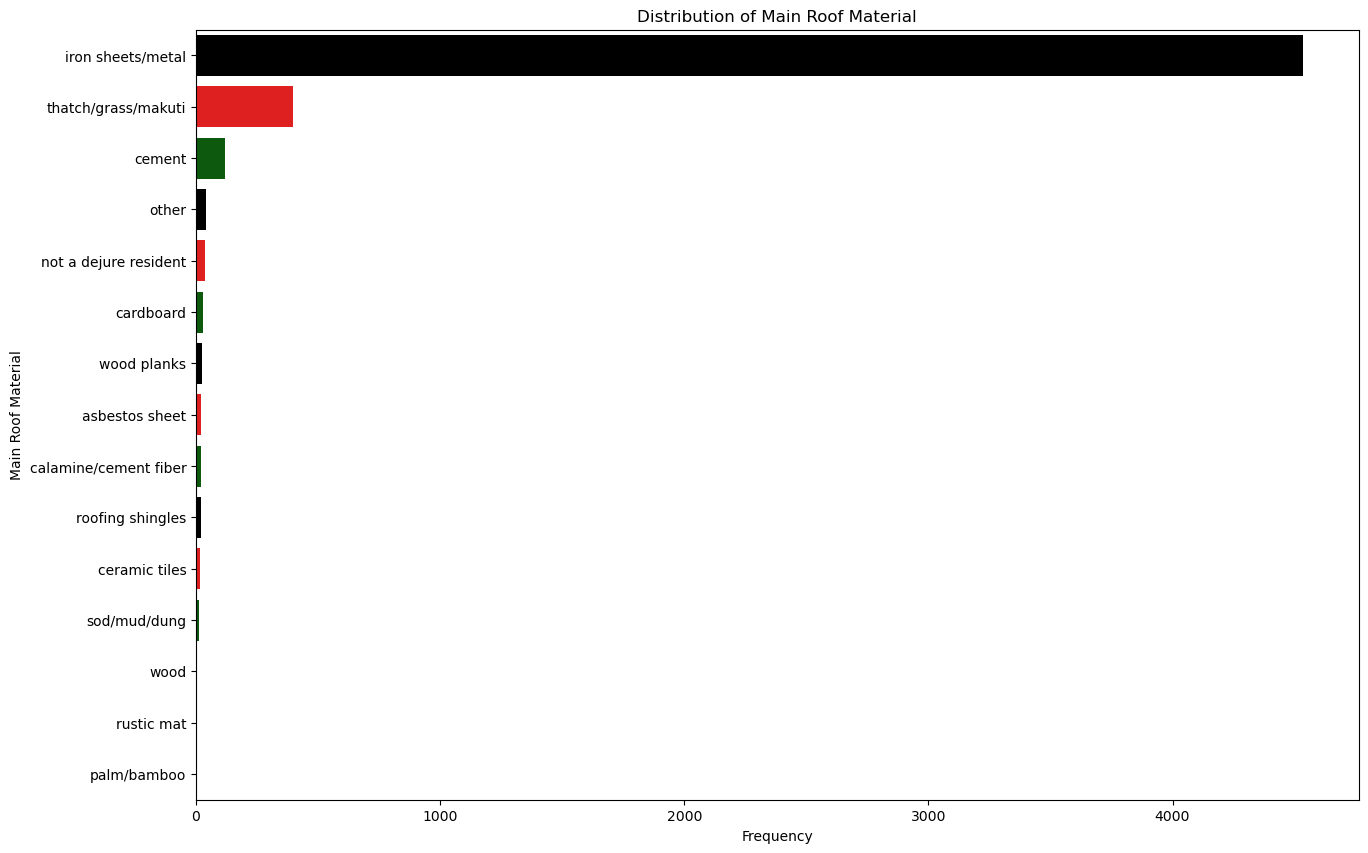

In [123]:
# Plot distribution of Main Roof Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main roof material', order=df['main roof material'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Main Roof Material')
plt.xlabel('Frequency')
plt.ylabel('Main Roof Material')

# Save the plot as a PNG file
plt.savefig('main_roof_material_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph shows the distribution of main roof materials used in the sampled households. Iron sheets or metal are overwhelmingly the most common roofing material, indicating a strong preference for durable and cost-effective roofing solutions. This material's prevalence suggests it is widely accessible and possibly the most affordable option for many households. Thatch, grass, or makuti are the second most common roofing materials, reflecting traditional practices and possibly lower economic capacity in some areas. Other materials like cement and less common options such as asbestos sheets, cardboard, and ceramic tiles make up a small portion of the sample, highlighting significant disparities in roofing quality and resources.

**Majority of the informal sector workers live in houses with roofs made of iron sheets/metal**

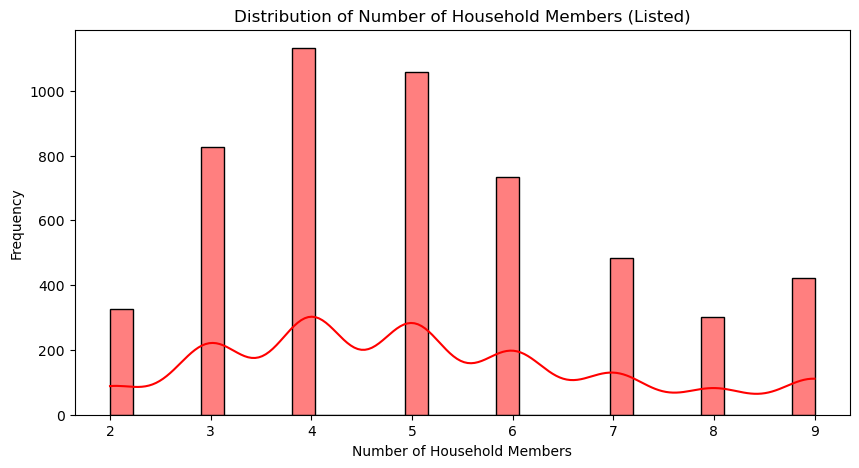

In [126]:
# Plot distribution of Number of Household Members (Listed)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of household members (listed)', kde=True, color=kenya_colors[1])  # Using red color
plt.title('Distribution of Number of Household Members (Listed)')
plt.xlabel('Number of Household Members')
plt.ylabel('Frequency')
# Save the plot as a PNG file
plt.savefig('household_members_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph displays the distribution of the number of household members among the sampled population. The most common household sizes are 4 and 5 members, indicating that many families in the sample consist of medium-sized households. Households with 3 and 6 members are also frequent, while those with 2, 7, 8, and 9 members are less common.

**Majority of the households have 4 members**

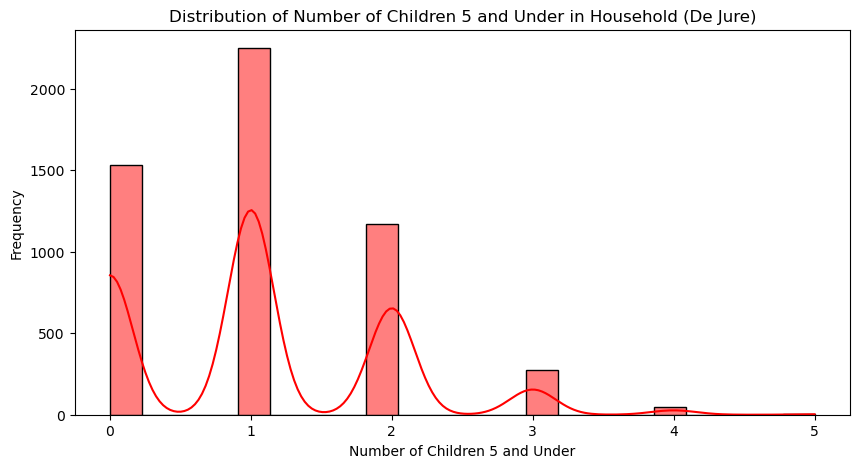

In [129]:
# Plot distribution of Number of Children 5 and Under in Household (De Jure)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of children 5 and under in household (de jure)', kde=True, color=kenya_colors[1])
plt.title('Distribution of Number of Children 5 and Under in Household (De Jure)')
plt.xlabel('Number of Children 5 and Under')
plt.ylabel('Frequency')

# Save the plot as a PNG file
plt.savefig('children_under_5_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph depicts the distribution of the number of children aged 5 and under in households. The most common scenario is having one child aged 5 or under, followed by households with no children in this age group. A smaller number of households have two young children, and very few have three or more. This distribution suggests that while many households have young children, a significant portion do not, indicating a diversity in family structures and life stages.

**Household heads by sex**

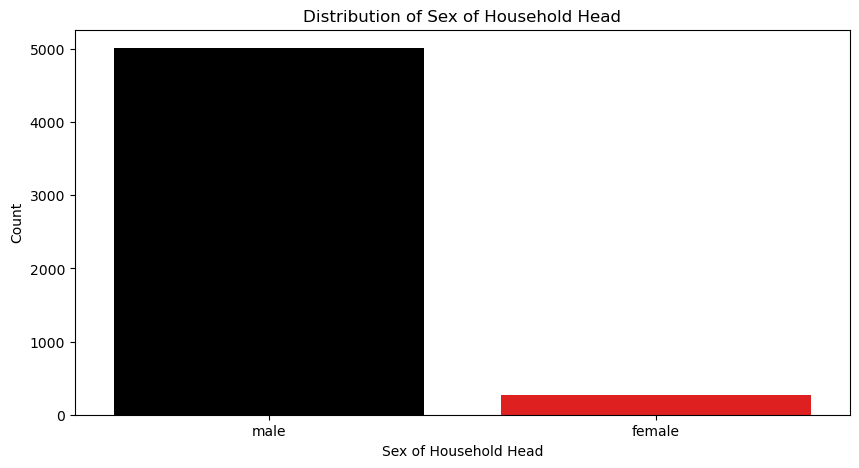

In [132]:
# Plot distribution of Sex of Household Head
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex of household head', order=df['sex of household head'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Sex of Household Head')
plt.xlabel('Sex of Household Head')
plt.ylabel('Count')

# Save the plot as a PNG file
plt.savefig('sex_of_household_head_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar chart above illustrates the gender breakdown among household heads in the dataset. The chart shows that a significant majority of household heads are male, with over 5,000 instances, while female household heads are much fewer in number, represented by a much shorter bar in red.

**Distribution of the relationshi[ of household head**

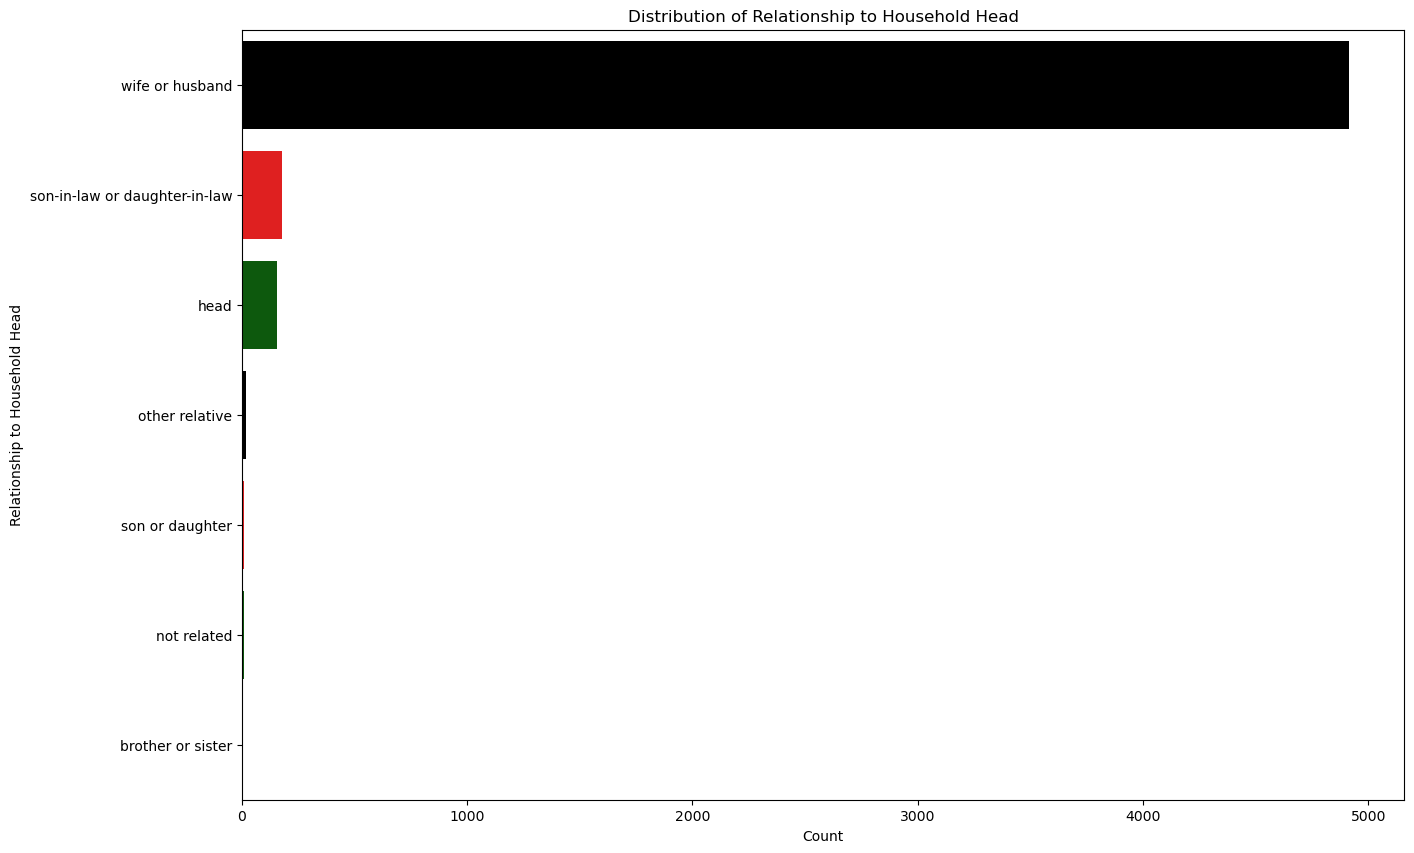

In [135]:
# Plot distribution of Relationship to Household Head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='relationship to household head', order=df['relationship to household head'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Relationship to Household Head')
plt.xlabel('Count')
plt.ylabel('Relationship to Household Head')

# Save the plot as a PNG file
plt.savefig('relationship_to_household_head_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph reveals the composition of household members based on their relationship to the head of the household. The chart shows that the majority of household members are spouses, with over 4,500 instances, suggesting that most households are nuclear or extended families centered around a couple. Other relationships, such as son-in-law or daughter-in-law, sons or daughters, and heads themselves, have significantly fewer representations. This distribution highlights the importance of understanding familial dynamics when considering income contribution assessments for the SHIF, as household relationships can influence financial responsibilities and social security needs.

**Household heads by age**

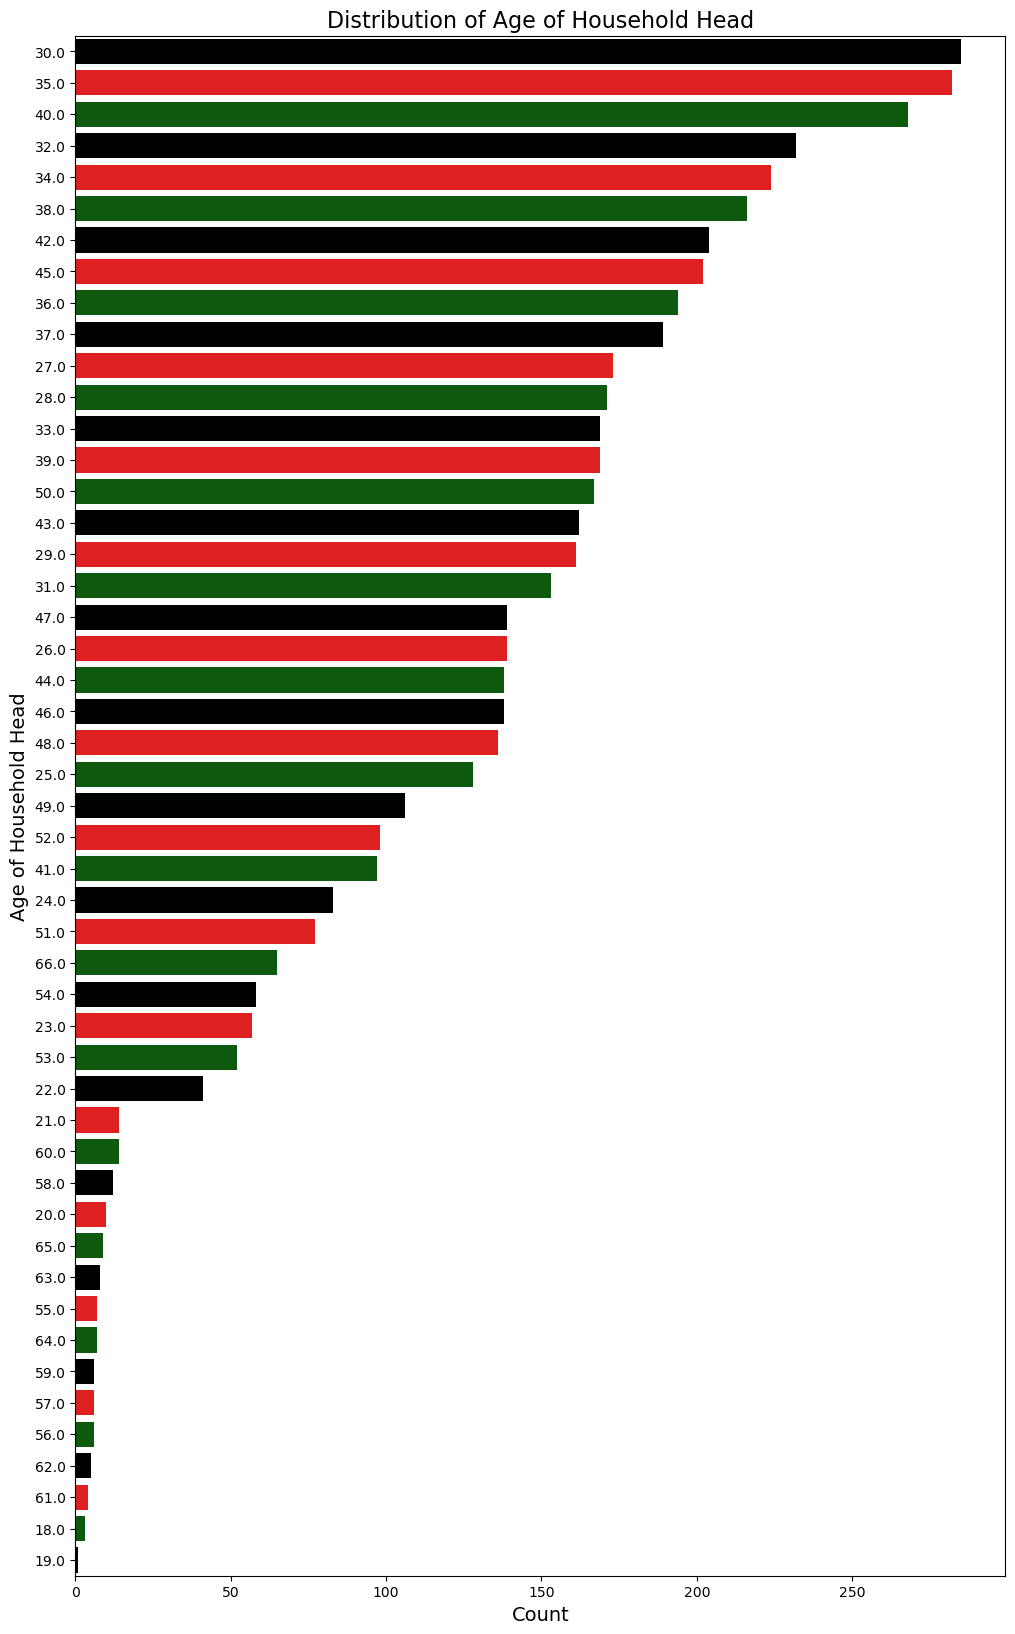

In [138]:
# Plot distribution of Age of Household Head
plt.figure(figsize=(12, 20))

# Countplot with Kenya colors
sns.countplot(data=df, y='age of household head', order=df['age of household head'].value_counts().index, palette=kenya_colors)

# Adding titles and labels
plt.title('Distribution of Age of Household Head', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age of Household Head', fontsize=14)

# Save the plot as a PNG file
plt.savefig('age_of_household_head_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar bar graph above presents the ages of household heads, illustrating a diverse range of ages. The most common age groups for household heads fall between 30 and 40 years old, with ages 30 and 35 being the most frequent. This indicates that a significant portion of household heads are in their prime working years, which is crucial for assessing income contribution to the Social Health Insurance Fund (SHIF). Younger and older age groups are less represented, suggesting potential differences in economic stability and financial planning needs across age demographics. Understanding these age-related trends helps tailor the SHIF to meet the varying needs of households at different life stages.

**Distribution of literacy**

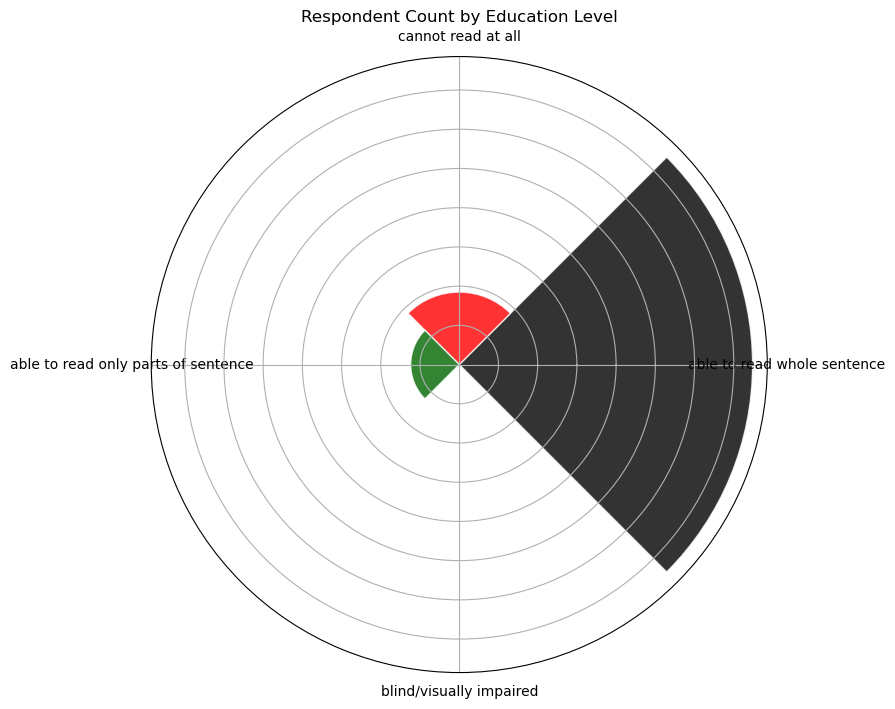

In [141]:
# Count respondents by education level
education_counts = df['literacy'].value_counts()

# Create a polar area chart
plt.figure(figsize=(10, 8))
theta = np.linspace(0.0, 2 * np.pi, len(education_counts), endpoint=False)
radii = education_counts.values
width = (2 * np.pi) / len(education_counts)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, color=kenya_colors, alpha=0.8, edgecolor='white')

ax.set_yticklabels([])
ax.set_xticks(theta)
ax.set_xticklabels(education_counts.index, fontsize=10)

plt.title('Respondent Count by Education Level')
plt.show()


Thepolar area chart depicts the literacy levels among individuals in the dataset. The majority of individuals are able to read whole sentences, indicating a relatively high literacy rate in the sample. However, there are still a significant number of people who cannot read at all or can only read parts of a sentence, with a smaller group being blind or visually impaired. This distribution underscores the importance of considering literacy in income assessments for the SHIF, as literacy can influence employment opportunities and income potential. Addressing literacy gaps could be crucial for ensuring fair contributions and access to social security benefits for all individuals.

**Distribution of type of cooking fuel**

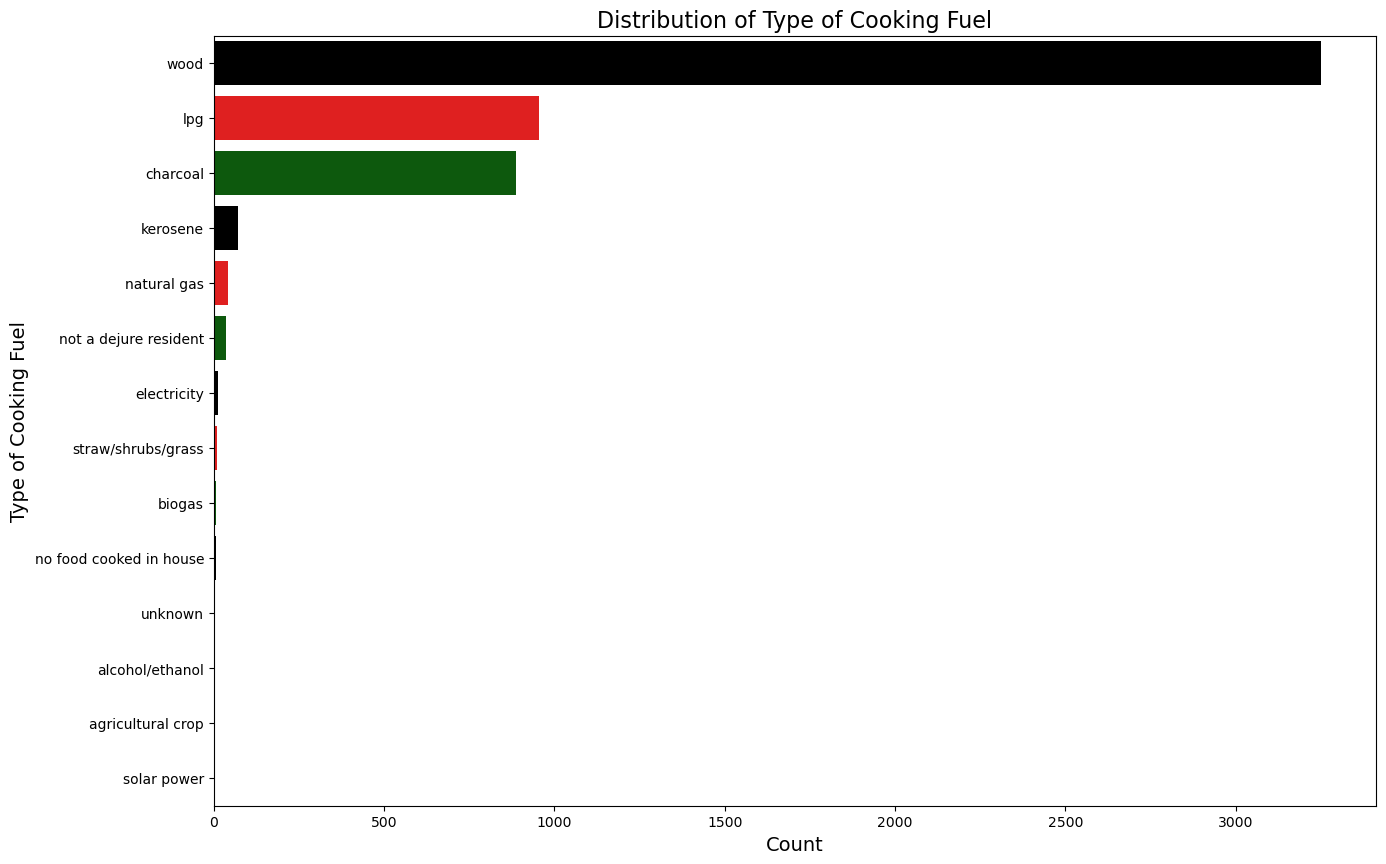

In [144]:
# Plot distribution of Type of Cooking Fuel
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of cooking fuel', order=df['type of cooking fuel'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Type of Cooking Fuel', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type of Cooking Fuel', fontsize=14)

# Save the plot as a PNG file
plt.savefig('type_of_cooking_fuel_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar chart above shows the prevalence of different cooking fuels used in households. The majority of households use wood as their primary cooking fuel, followed by LPG (liquefied petroleum gas) and charcoal. This indicates a reliance on traditional and easily accessible fuels, which may reflect economic factors or availability. The use of cleaner fuels like electricity and natural gas is minimal, highlighting potential areas for policy intervention to promote cleaner energy sources. Understanding these patterns can help tailor the SHIF contributions, considering how energy costs and availability affect household budgets and overall well-being.

**Mobile phone ownership**

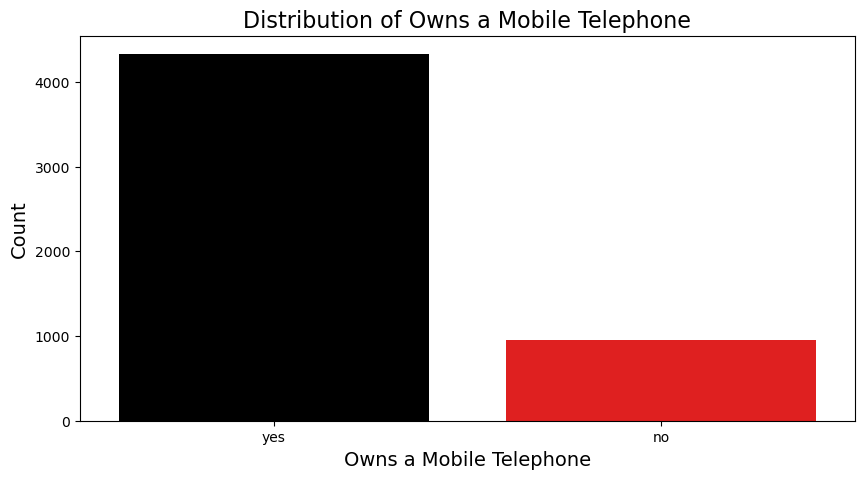

In [147]:
# Plot distribution of Owns a Mobile Telephone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='owns a mobile telephone', order=df['owns a mobile telephone'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Owns a Mobile Telephone', fontsize=16)
plt.xlabel('Owns a Mobile Telephone', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('owns_a_mobile_telephone_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The  graph illustrates the ownership of mobile phones among individuals in the dataset. The chart shows that a large majority of individuals own a mobile phone, while a smaller portion does not. This high rate of mobile phone ownership suggests that mobile technology could be a viable platform for communication and transactions related to SHIF. Leveraging mobile technology can facilitate access to SHIF services, enable easier contribution processes, and improve the reach of social programs, especially in areas where other forms of communication are limited.

**Mobile Financial Transactions**

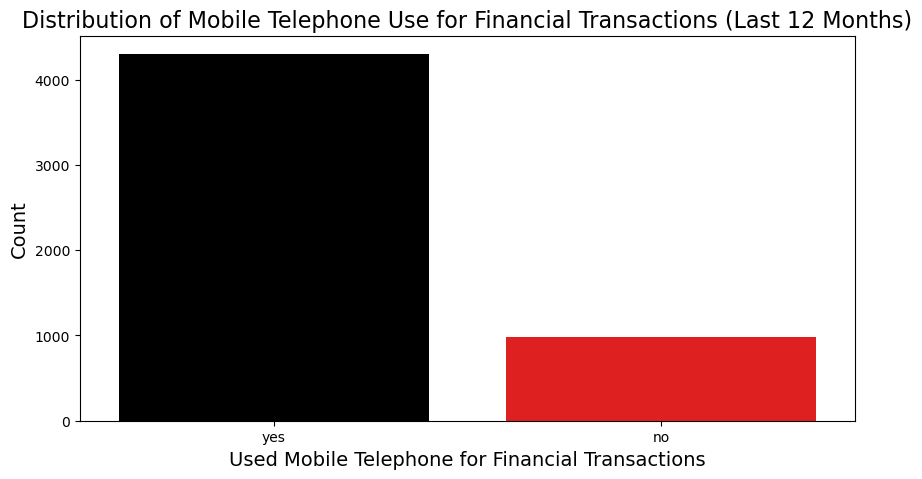

In [150]:
# Plot distribution of Last 12 Months Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='last 12 months use mobile telephone for financial transactions', order=df['last 12 months use mobile telephone for financial transactions'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Mobile Telephone Use for Financial Transactions (Last 12 Months)', fontsize=16)
plt.xlabel('Used Mobile Telephone for Financial Transactions', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('mobile_telephone_financial_transactions_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph shows that a significant majority of individuals in the dataset use their mobile phones for financial transactions. This highlights the widespread adoption of mobile banking and payment solutions, reflecting the potential for mobile technology to facilitate financial inclusivity and streamline contributions to the SHIF. Leveraging mobile financial services can enhance access to SHIF benefits and simplify contribution processes, particularly in regions where traditional banking infrastructure is limited.

**Use of smartphones**

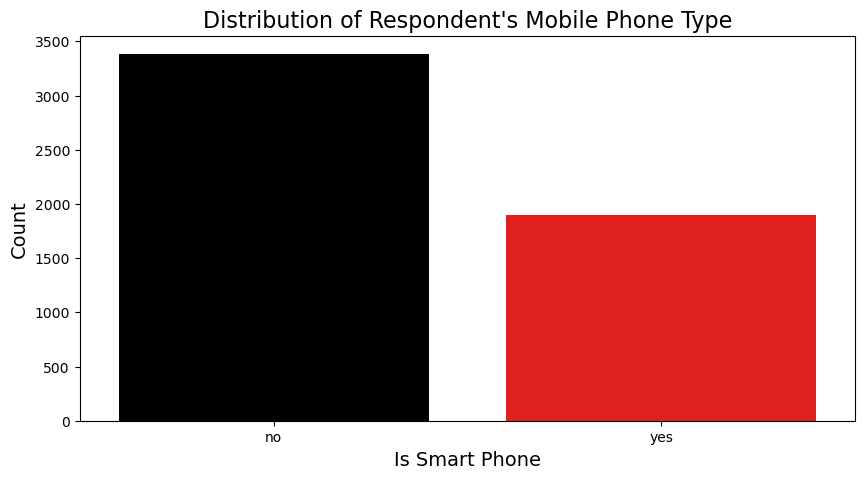

In [153]:
# Plot distribution of Is Respondent's Mobile Phone a Smart Phone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='is respondent\'s mobile phone a smart phone', order=df['is respondent\'s mobile phone a smart phone'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Respondent\'s Mobile Phone Type', fontsize=16)
plt.xlabel('Is Smart Phone', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('respondent_smartphone_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph indicates that most respondents own non-smartphones, while a smaller proportion have smartphones. This suggests that while mobile technology is widespread, access to advanced features and internet connectivity provided by smartphones is less common. For the Social Health Insurance Fund to effectively use mobile technology, solutions should accommodate both basic and smart mobile phones. This could involve designing user-friendly interfaces for non-smartphones and leveraging smartphone capabilities for enhanced service delivery, ensuring inclusivity across different types of mobile device users.

**Bank account ownership**

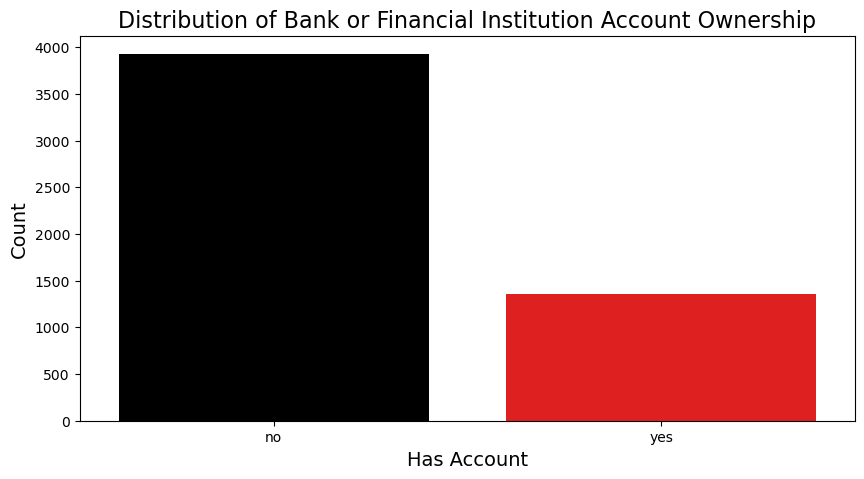

In [156]:
# Plot distribution of Has an Account in a Bank or Other Financial Institution
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, x='has an account in a bank or other financial institution',
    order=df['has an account in a bank or other financial institution'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Bank or Financial Institution Account Ownership', fontsize=16)
plt.xlabel('Has Account', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('bank_account_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph reveals that most respondents do not have a bank account or an account with a financial institution. This indicates a gap in formal financial inclusion, which can impact individuals' ability to save, borrow, and transact efficiently. For the Social Health Insurance Fund to be effective, strategies should consider this lack of financial access and explore alternative methods, such as mobile money services, to facilitate contributions and benefits distribution.

**Use of internet**

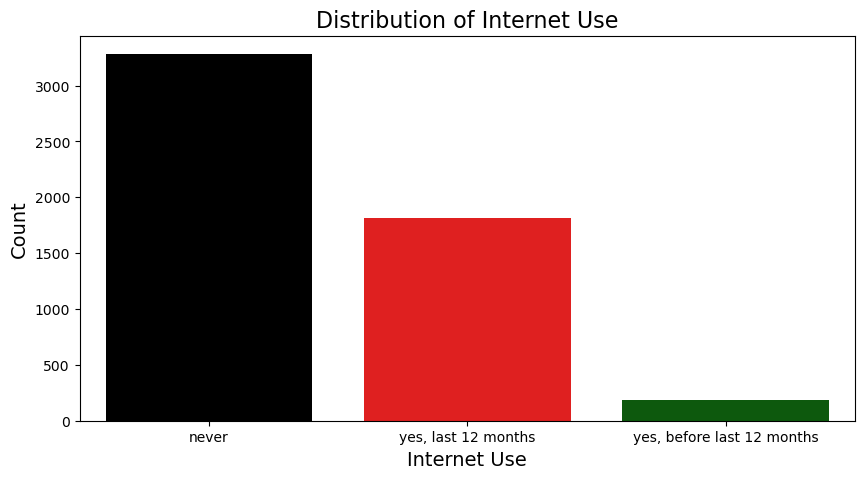

In [159]:
# Plot distribution of Use of Internet
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, x='use of internet', order=df['use of internet'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Internet Use', fontsize=16)
plt.xlabel('Internet Use', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('internet_use_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The chart reveals that a majority of respondents have never used the internet, while a smaller portion has used it within the last 12 months, and an even smaller group used it before the last 12 months. This limited internet access underscores a digital divide, which can impact the effectiveness of online platforms for the Social Health Insurance Fund contributions and communications. To address this, SHIF strategies may need to incorporate offline and low-tech solutions to ensure inclusivity and accessibility, reaching individuals who are not connected to the internet.

**Health Status**

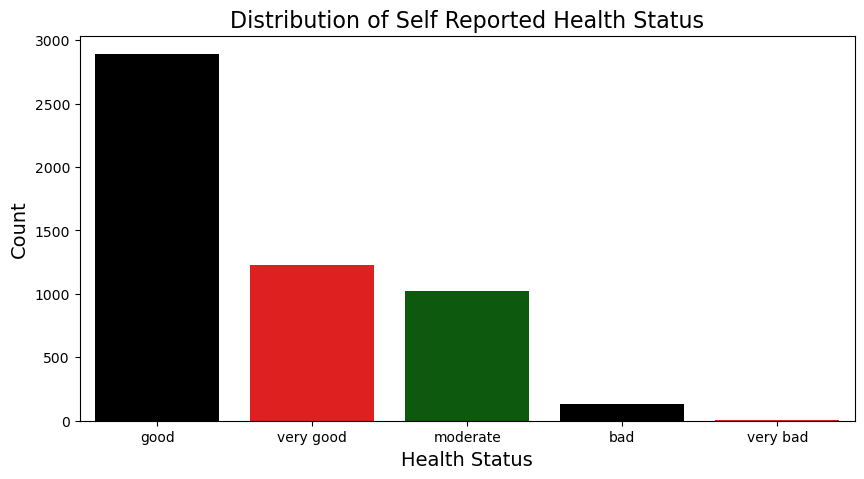

In [162]:
# Plot distribution of Self Reported Health Status
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='self reported health status', order=df['self reported health status'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Self Reported Health Status', fontsize=16)
plt.xlabel('Health Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('self_reported_health_status_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph shows how individuals in the dataset perceive their health. Most respondents rate their health as "good," followed by "very good" and "moderate." A small number report "bad" or "very bad" health status. This positive self-assessment indicates that a majority feel relatively healthy, which could affect their contributions and expectations from the Social Health Insurance Fund. However, the presence of individuals with poor health highlights the need for SHIF to provide comprehensive coverage and support for those with greater health challenges, ensuring equitable access to healthcare services for all individuals.

**Wealth Index**

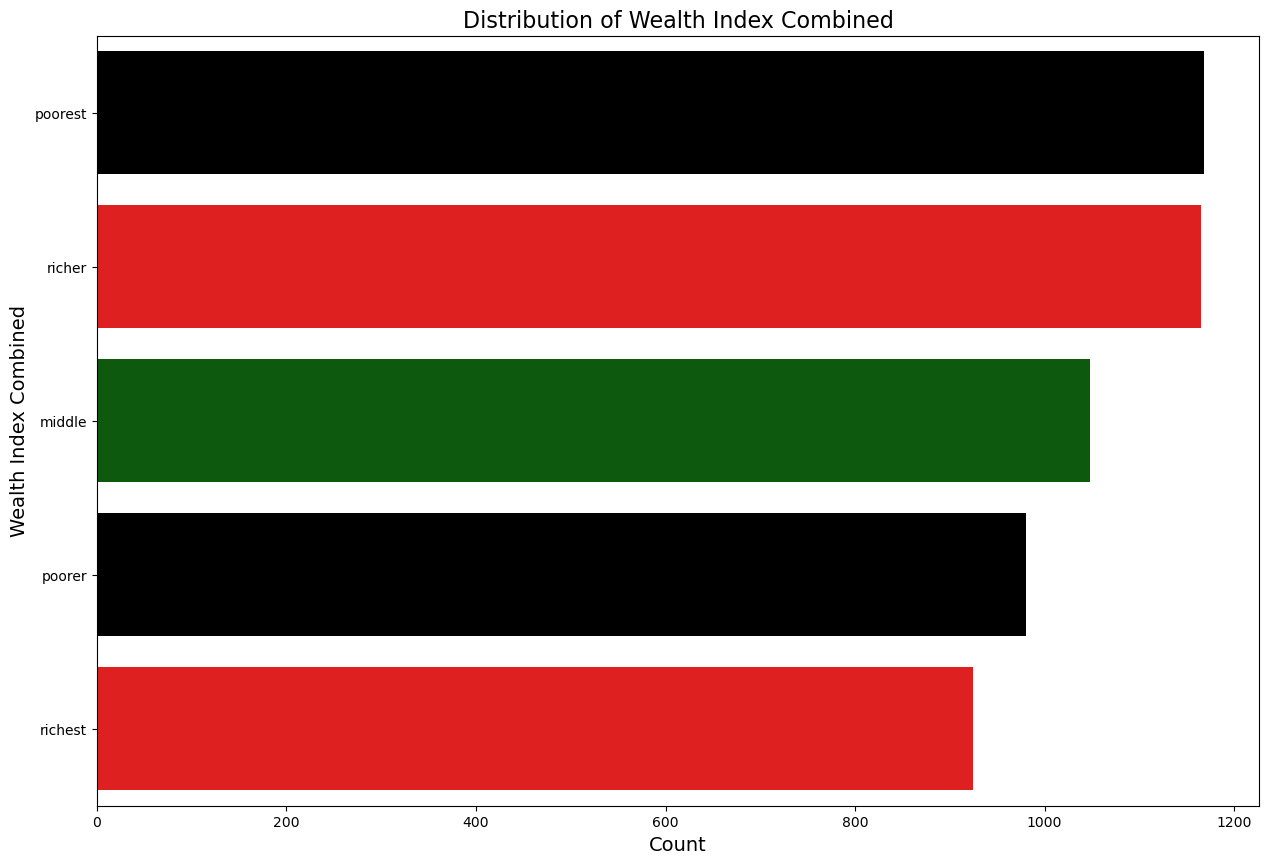

In [165]:
# Plot distribution of Wealth Index Combined
plt.figure(figsize=(15, 10))
sns.countplot(
    data=df, y='wealth index combined', order=df['wealth index combined'].value_counts().index, palette=kenya_colors)
plt.title('Distribution of Wealth Index Combined', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Wealth Index Combined', fontsize=14)

# Save the plot as a PNG file
plt.savefig('wealth_index_combined_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph above shows the wealth distribution among the respondents, categorized into five groups: poorest, poorer, middle, richer, and richest. The chart demonstrates a relatively balanced distribution across these groups, with a slightly higher number of individuals in the "richer" and "richest" categories. This diversity in wealth levels indicates varying capacities to contribute to the SHIF and highlights the need for a tailored approach in policy implementation. Understanding this wealth distribution can help in designing SHIF contributions that are equitable and consider the financial abilities of different socio-economic groups, ensuring that all individuals have access to essential health services without undue financial strain.

**Educational level of household heads**

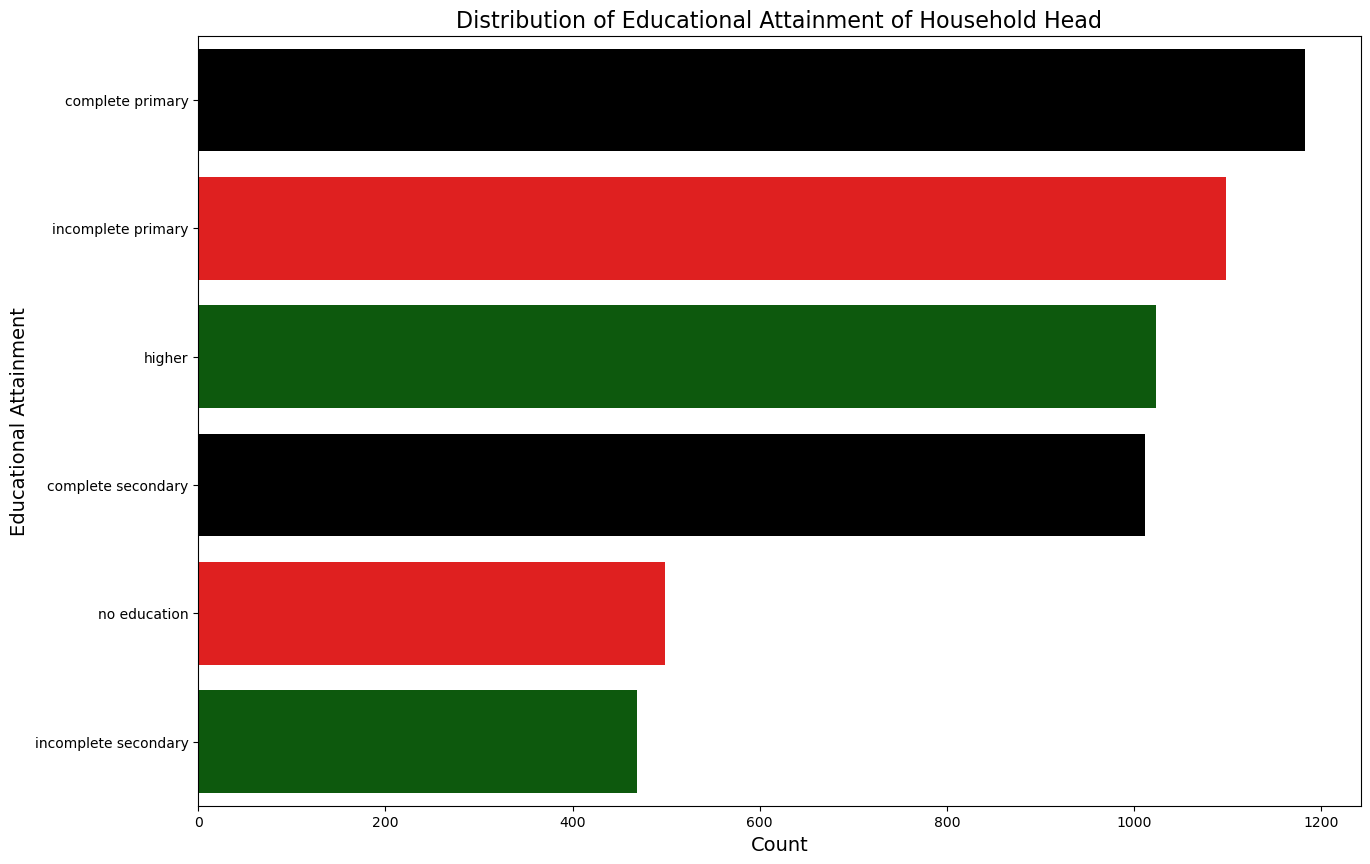

In [168]:
# Plot distribution of Educational Attainment Head
plt.figure(figsize=(15, 10))
sns.countplot(
    data=df,
    y='educational attainment head', order=df['educational attainment head'].value_counts().index,palette=kenya_colors
)

plt.title('Distribution of Educational Attainment of Household Head', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Educational Attainment', fontsize=14)

# Save the plot as a PNG file
plt.savefig('educational_attainment_head_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph above displays the levels of education completed by individuals in the dataset. The chart shows that the most common level of education is "complete primary," followed by "incomplete primary" and "complete secondary." A smaller number of individuals have attained higher education or have no formal education at all. This distribution highlights the varying educational backgrounds among the population, which can influence employment opportunities, income levels, and contributions to the Social Health Insurance Fund. Addressing educational disparities could improve economic opportunities and ensure more equitable SHIF contributions, as education is a key factor in enhancing individuals' earning potential and financial stability.

**Listening to Radio**

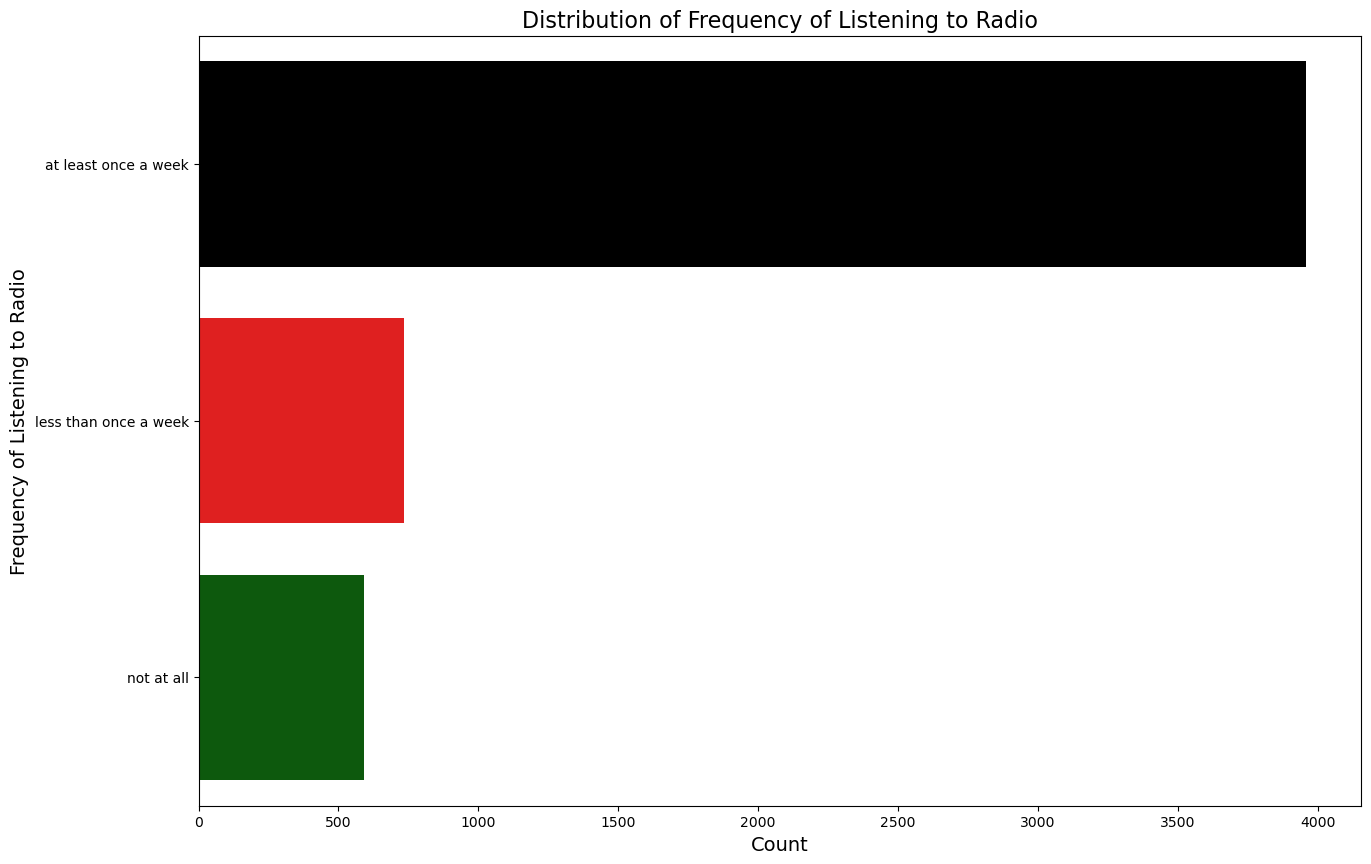

In [171]:
# Plot distribution of Frequency of Listening to Radio
plt.figure(figsize=(15, 10))
sns.countplot(
    data=df,
    y='frequency of listening to radio',
    order=df['frequency of listening to radio'].value_counts().index,
    palette=kenya_colors
)

plt.title('Distribution of Frequency of Listening to Radio', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency of Listening to Radio', fontsize=14)

# Save the plot as a PNG file
plt.savefig('frequency_of_listening_to_radio_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph shows how often respondents listen to the radio. Most individuals listen to the radio at least once a week, indicating that radio remains a popular medium for information and entertainment. A smaller number of respondents listen less frequently, while an even smaller group does not listen at all. This widespread use of radio suggests it could be an effective channel for disseminating information about the Social Health Insurance Fund and engaging with the community. Leveraging radio broadcasts for educational campaigns and updates about SHIF could help reach a broad audience, including those who might not have access to other forms of media.

**Watching television**

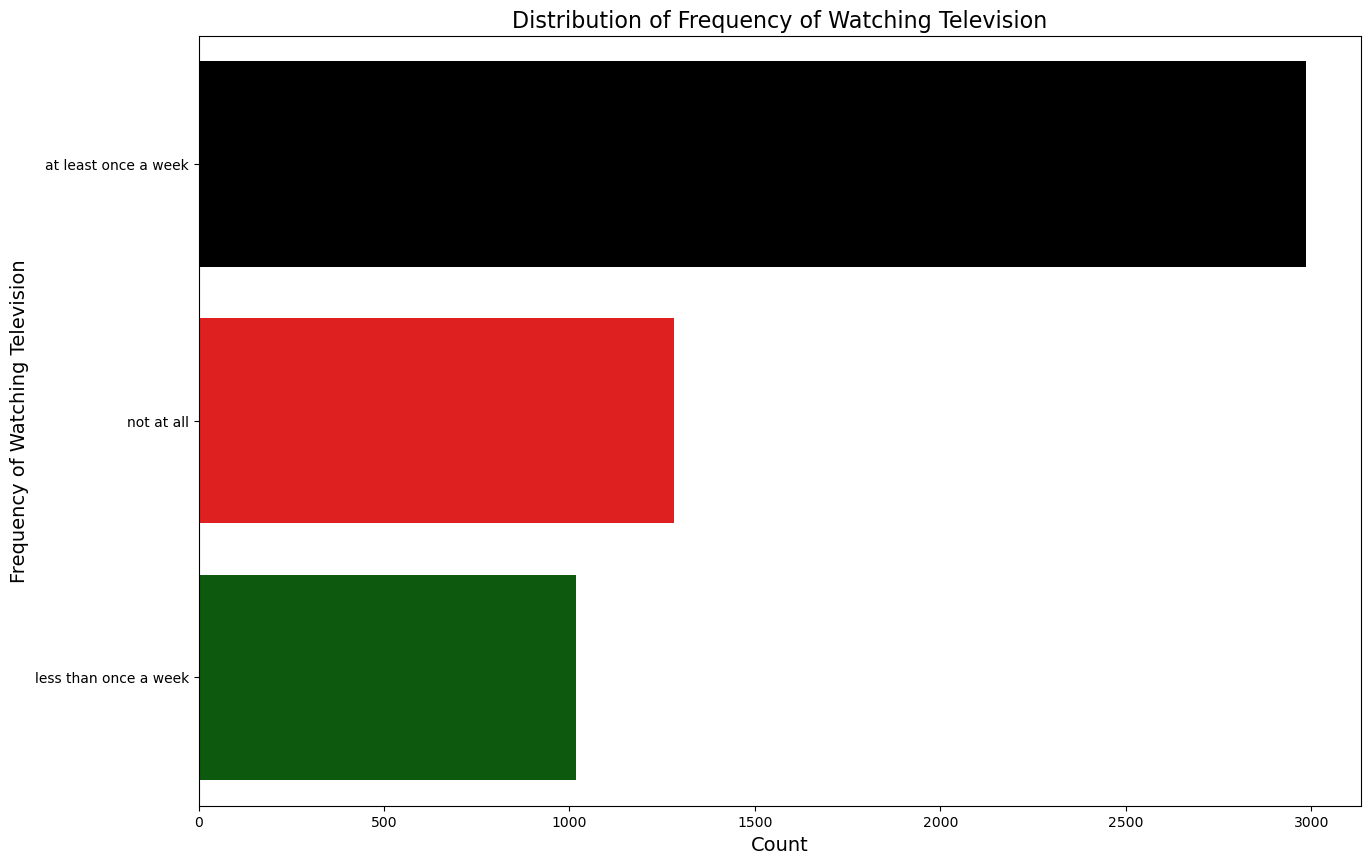

In [174]:
# Plot distribution of Frequency of Watching Television
plt.figure(figsize=(15, 10))
sns.countplot(
    data=df, y='frequency of watching television', order=df['frequency of watching television'].value_counts().index,
    palette=kenya_colors)

plt.title('Distribution of Frequency of Watching Television', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Frequency of Watching Television', fontsize=14)

# Save the plot as a PNG file
plt.savefig('frequency_of_watching_television_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph illustrates how often respondents watch television. The chart shows that most individuals watch television at least once a week, indicating it as a prominent source of information and entertainment. A substantial number do not watch television at all, and a smaller group watches less than once a week. This data suggests that television can be an effective medium for disseminating information about the Social Health Insurance Fund. Utilizing television broadcasts for SHIF-related announcements and educational campaigns could reach a broad audience, including those who rely on this medium for news and updates.

**Age when had first sex**

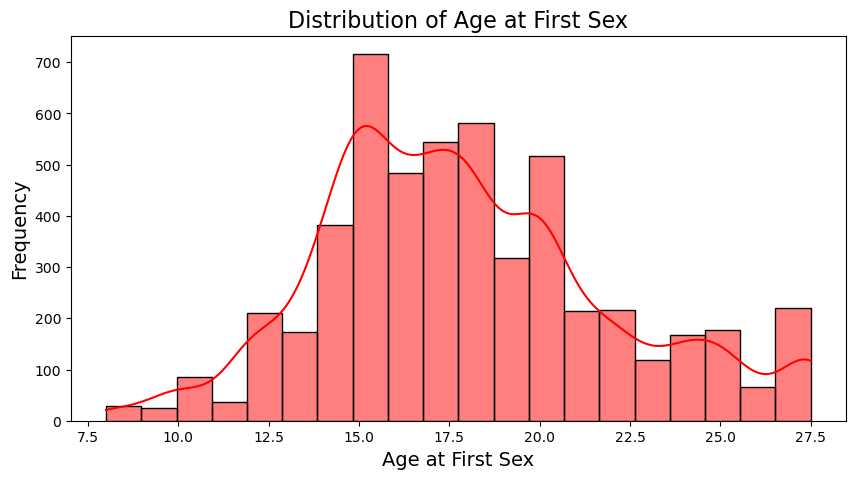

In [177]:
# Plot distribution of Age at First Sex
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x='age at first sex',
    bins=20,
    kde=True,
    color=kenya_colors[1]  # Use a specific Kenya flag color for the histogram
)

plt.title('Distribution of Age at First Sex', fontsize=16)
plt.xlabel('Age at First Sex', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Save the plot as a PNG file
plt.savefig('age_at_first_sex_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The histogram displays the ages at which respondents first engaged in sexual activity. The chart shows that most individuals had their first sexual experience between the ages of 15 and 20, with a peak around age 15. The frequency decreases as the age increases, with fewer respondents reporting their first sexual experience beyond age 20. This information can be critical for informing sexual health education and intervention programs, as understanding the typical age of first sexual activity can help tailor educational materials and health services to address the needs of younger populations effectively. Programs promoting safe practices and awareness could focus on adolescents and young adults to have a more significant impact.

**Distribution of Partner's Occupation**

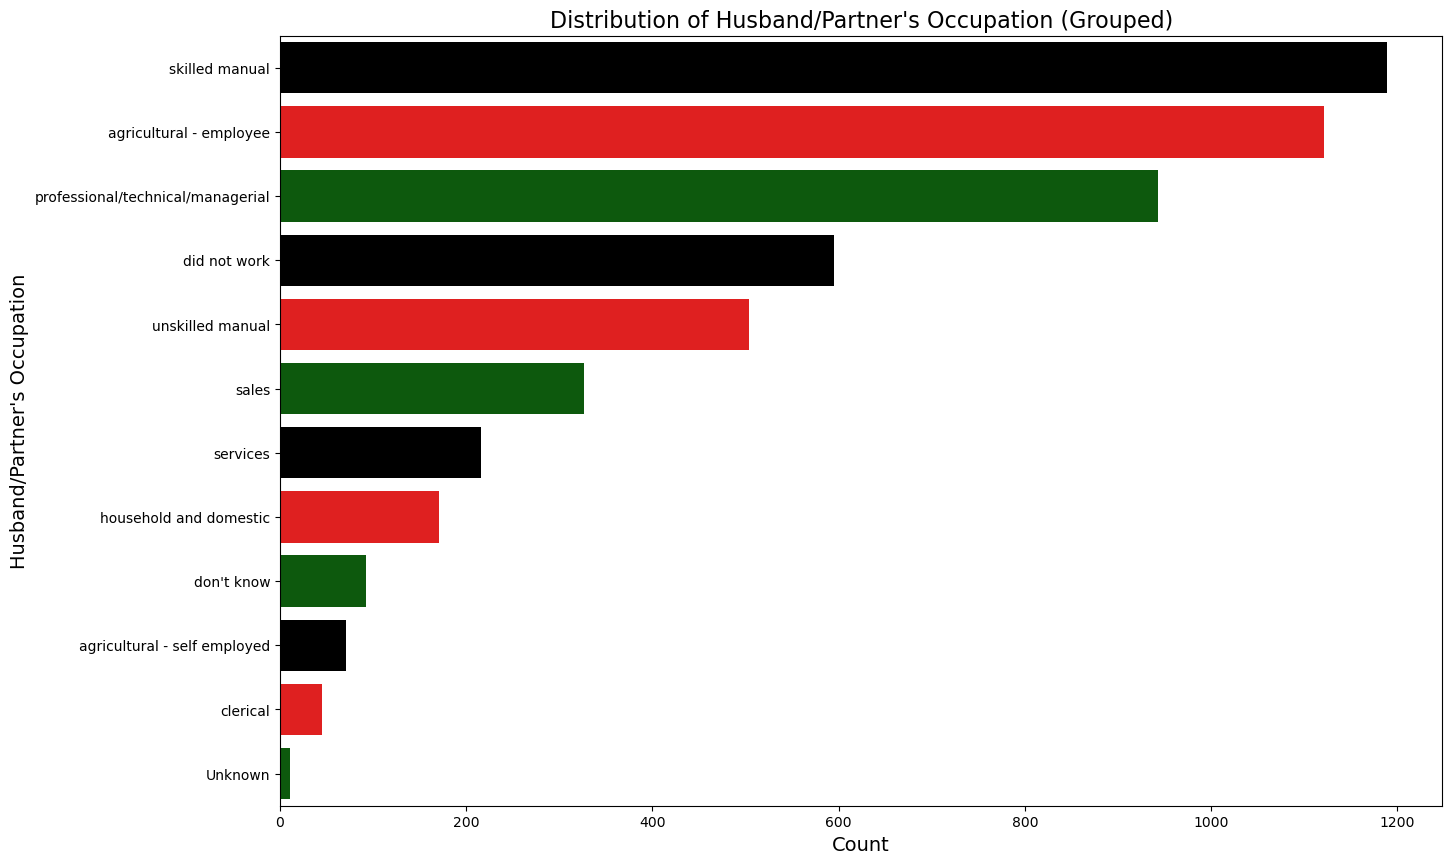

In [180]:

# Plot distribution of Husband/Partner's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(
    data=df,
    y="husband/partner's occupation (grouped)",
    order=df["husband/partner's occupation (grouped)"].value_counts().index,
    palette=kenya_colors
)

plt.title("Distribution of Husband/Partner's Occupation (Grouped)", fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel("Husband/Partner's Occupation", fontsize=14)

# Save the plot as a PNG file
plt.savefig('husband_partner_occupation_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar chart presents the occupational categories of husbands or partners. The most common occupations are "skilled manual," "agricultural - employee," and "professional/technical/managerial," indicating a diverse range of skills and employment sectors among this group. Notably, a significant number also fall into the "did not work" and "unskilled manual" categories. This variety in occupations highlights the differing economic contributions to households and may affect the ability to contribute to the Social Health Insurance Fund. Understanding these occupational trends can help tailor SHIF policies and programs to support individuals across various employment types, ensuring equitable access to healthcare services and financial contributions aligned with income levels.

**Working status**

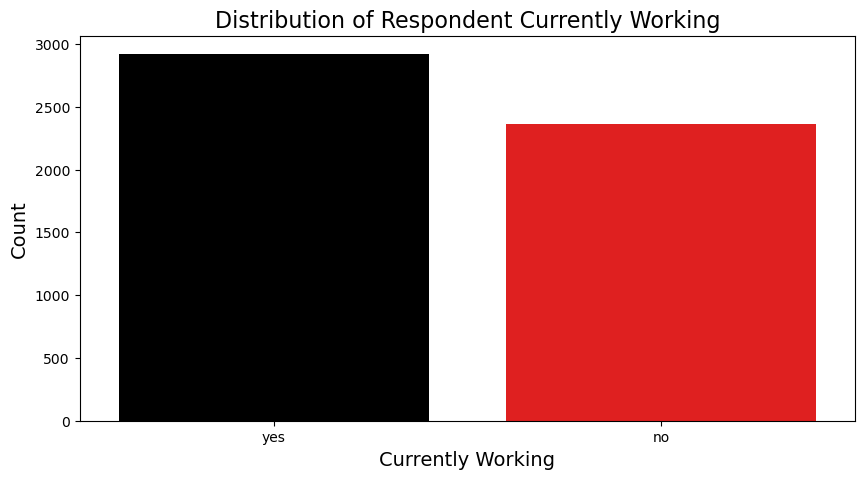

In [183]:
# Plot distribution of Respondent Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, x='respondent currently working', order=df['respondent currently working'].value_counts().index,
    palette=kenya_colors)

plt.title('Distribution of Respondent Currently Working', fontsize=16)
plt.xlabel('Currently Working', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('respondent_currently_working_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph shows the employment status of respondents, with a slightly higher number currently employed compared to those not working. This balance indicates that a significant portion of the population is actively contributing to the economy, which is crucial for the Social Health Insurance Fund (SHIF) as it determines the potential contributor base. Understanding the employment distribution helps in assessing the capacity of individuals to contribute financially to SHIF and highlights the need for policies that support both employed and unemployed individuals, ensuring that healthcare access is equitable regardless of employment status.

**Current Occupation**

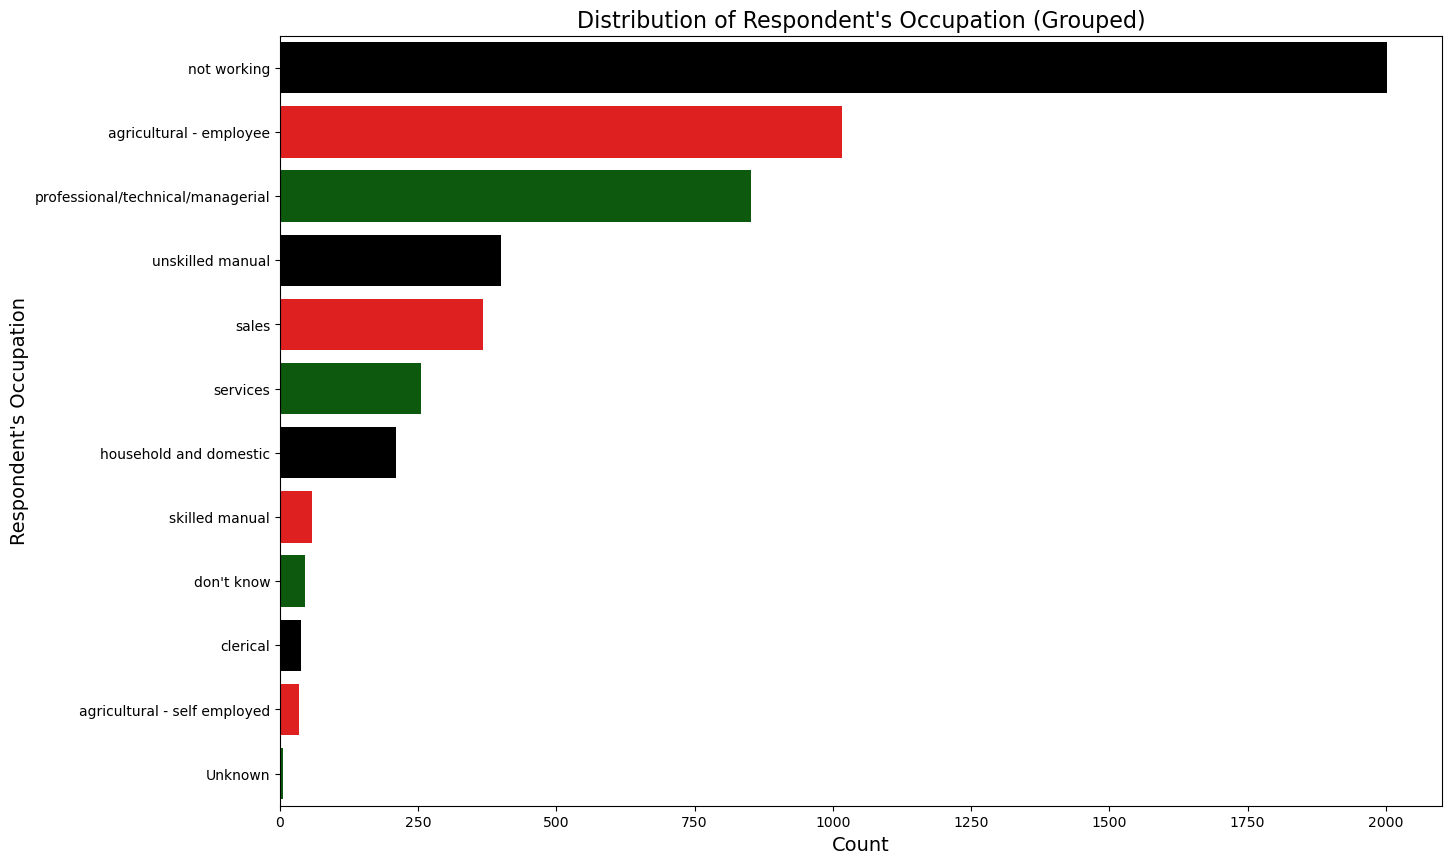

In [186]:
# Plot distribution of Respondent's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(
    data=df,
    y="respondent's occupation (grouped)",
    order=df["respondent's occupation (grouped)"].value_counts().index,
    palette=kenya_colors
)

plt.title("Distribution of Respondent's Occupation (Grouped)", fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel("Respondent's Occupation", fontsize=14)

# Save the plot as a PNG file
plt.savefig('respondent_occupation_grouped_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar chart displays the various occupational categories among respondents. The chart shows that the largest group is "not working," followed by "agricultural - employee" and "professional/technical/managerial" positions. Other categories such as "unskilled manual," "sales," and "services" also have notable representations, while occupations like "skilled manual" and "agricultural - self-employed" are less common. This distribution highlights the diversity of employment among respondents and suggests that many individuals may face different economic challenges and opportunities. The high number of respondents not working underscores the importance of considering unemployment and underemployment in the design of the Social Health Insurance Fund. Tailoring SHIF contributions and benefits to accommodate various occupational statuses, including those who are unemployed, can help ensure that healthcare access is equitable and sustainable across different sectors of the population.

**Distribution of Husband age**

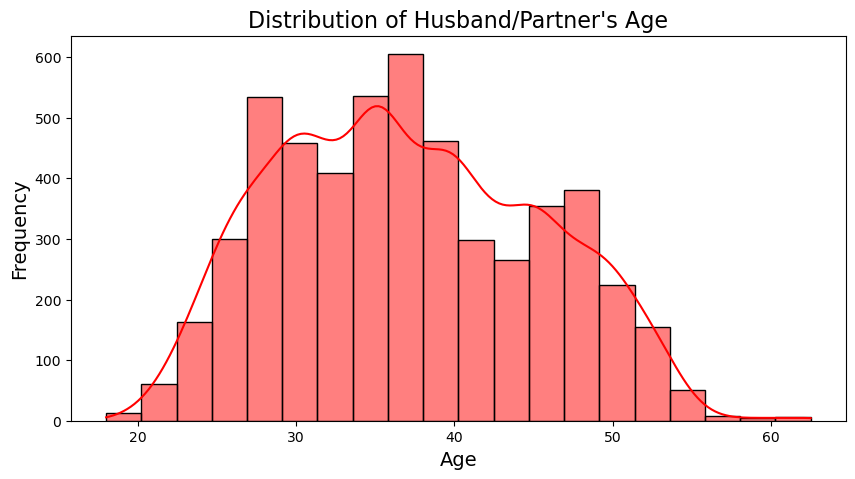

In [189]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df, x="husband/partner's age", bins=20, kde=True, color=kenya_colors[1] )

plt.title("Distribution of Husband/Partner's Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Save the plot as a PNG file
plt.savefig('husband_partner_age_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The histogram titled "Distribution of Husband/Partner's Age" shows the age distribution of husbands or partners in the dataset. The chart reveals that most individuals fall within the age range of 30 to 50, with the highest frequency around ages 35 to 45. This distribution indicates that the majority of husbands or partners are in their prime working years, which has implications for household income and financial stability. Understanding the age distribution is crucial for the Social Health Insurance Fundas it can inform policy decisions on healthcare coverage and contribution rates. For instance, targeting health interventions and insurance plans for this age group can help address their specific healthcare needs and ensure they are adequately supported, contributing to the overall sustainability of the SHIF program.

**Majority of the patners are between the ages of 30 and 40 years**

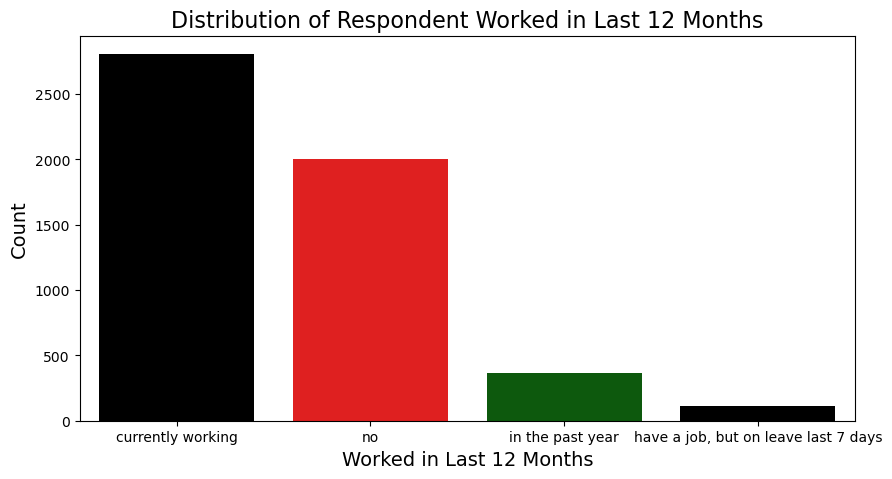

In [192]:
# Plot distribution of Respondent Worked in Last 12 Months
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, x='respondent worked in last 12 months', order=df['respondent worked in last 12 months'].value_counts().index, palette=kenya_colors)

plt.title('Distribution of Respondent Worked in Last 12 Months', fontsize=16)
plt.xlabel('Worked in Last 12 Months', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('respondent_worked_last_12_months_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()


The bar graph displays the employment activity of respondents over the past year. The chart indicates that the largest group is "currently working," followed by those who have not worked in the last 12 months. A smaller number of respondents worked in the past year but are not currently working, and an even smaller group is on leave from their job. This distribution highlights that a significant portion of the population is actively engaged in the workforce, while a considerable number are not currently employed. Understanding these employment patterns is important for the Social Health Insurance Fund as it helps determine the potential pool of contributors and identifies groups that may require additional support. Policies that provide coverage for both employed and unemployed individuals can help ensure that healthcare access is equitable and inclusive, addressing the needs of all segments of the population.

**The majority of respondents have been working in the last 12 months**

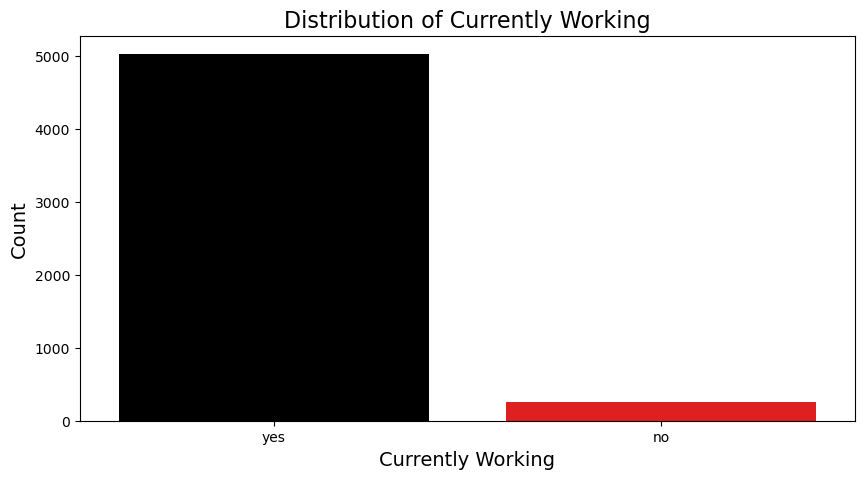

In [195]:
# Plot distribution of Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, x='currently working', order=df['currently working'].value_counts().index,
    palette=kenya_colors)

plt.title('Distribution of Currently Working', fontsize=16)
plt.xlabel('Currently Working', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the plot as a PNG file
plt.savefig('currently_working_distribution.png', bbox_inches='tight')

# Show the plot
plt.show()

The graph shows the employment status of respondents, highlighting that the vast majority are currently employed, with over 5,000 individuals in this category. Only a small fraction of respondents are not currently working. This strong employment rate is crucial for the Social Health Insurance Fund (SHIF) as it suggests a large base of potential contributors who can sustain the fund. However, the presence of non-working individuals indicates a need for SHIF policies to also support those temporarily out of the workforce, ensuring that healthcare access remains comprehensive and inclusive for everyone, regardless of employment status.

**Respondent's Year of Birth has no impact on their income**

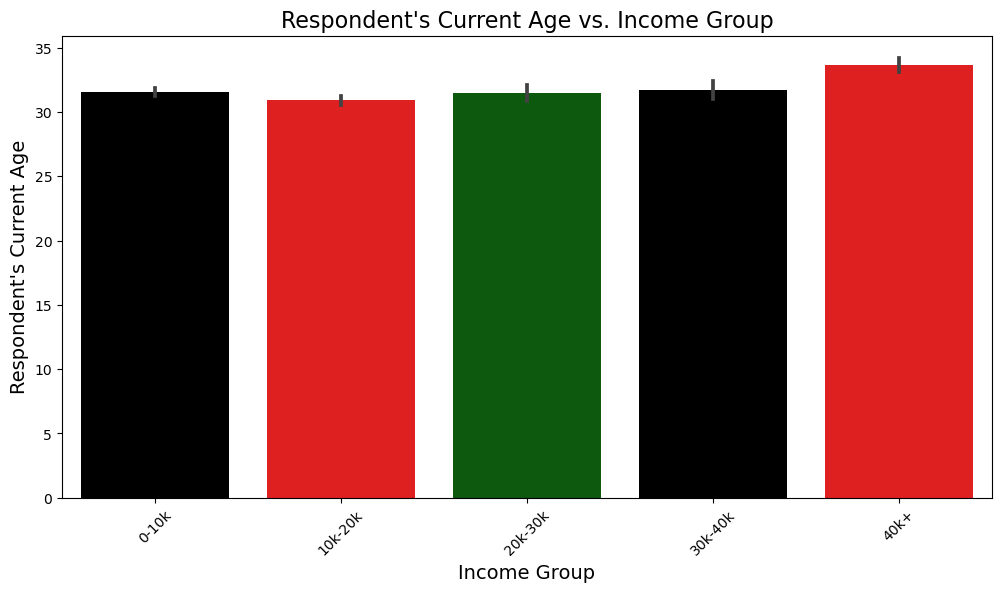

In [198]:
# Plot Respondent's Current Age vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(
    x='income_group', y="respondent's current age", data=df, palette=kenya_colors)

plt.title("Respondent's Current Age vs. Income Group", fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel("Respondent's Current Age", fontsize=14)
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('respondent_age_vs_income_group.png', bbox_inches='tight')

# Show the plot
plt.show()

The bar graph above compares the average ages of respondents across different income groups. The chart indicates that the average age remains relatively consistent across income groups, ranging from approximately 30 to 35 years old. This suggests that income level is not strongly correlated with age in this dataset. The uniformity in age across income groups implies that factors other than age may play a more significant role in determining income levels. Understanding this relationship is important for the Social Health Insurance Fund, as it highlights the need to consider other socio-economic factors, such as education, occupation, and regional differences, when assessing contributions and designing policies. Tailoring SHIF initiatives to address the diverse needs of individuals within these income groups can help ensure equitable healthcare access and financial sustainability.

**Respondent's above the Age of 35 years have more income**

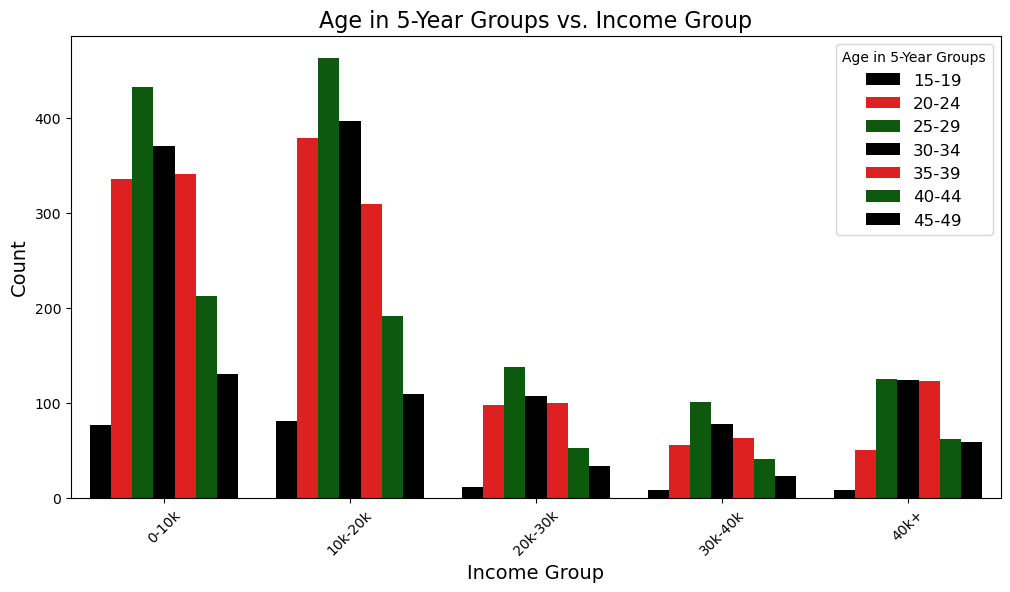

In [201]:
# Plot Age in 5-Year Groups vs. Income Group using Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot( x='income_group', hue='age in 5-year groups', data=df, palette=kenya_colors)

plt.title("Age in 5-Year Groups vs. Income Group", fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Age in 5-Year Groups', fontsize=12)

# Save the plot as a PNG file
plt.savefig('age_5year_groups_vs_income_group.png', bbox_inches='tight')

# Show the plot
plt.show()

This bar chart illustrates the distribution of income across different age groups within the informal sector. Each color represents a specific 5-year age group, allowing us to observe the variations in income distribution among these groups. Notably, the age group 25-29 (green) shows the highest count in the lower income bracket ($0-10k and $10k-20k), suggesting that younger workers predominantly fall into lower income categories. However, as age increases, there is a noticeable decline in the number of individuals in higher income brackets, highlighting the potential income growth challenges faced by older workers in the informal sector. This insight can guide targeted interventions and support strategies for different age demographics to ensure equitable contribution assessments to the Social Health Insurance Fund (SHIF).

**Region vs Income group**

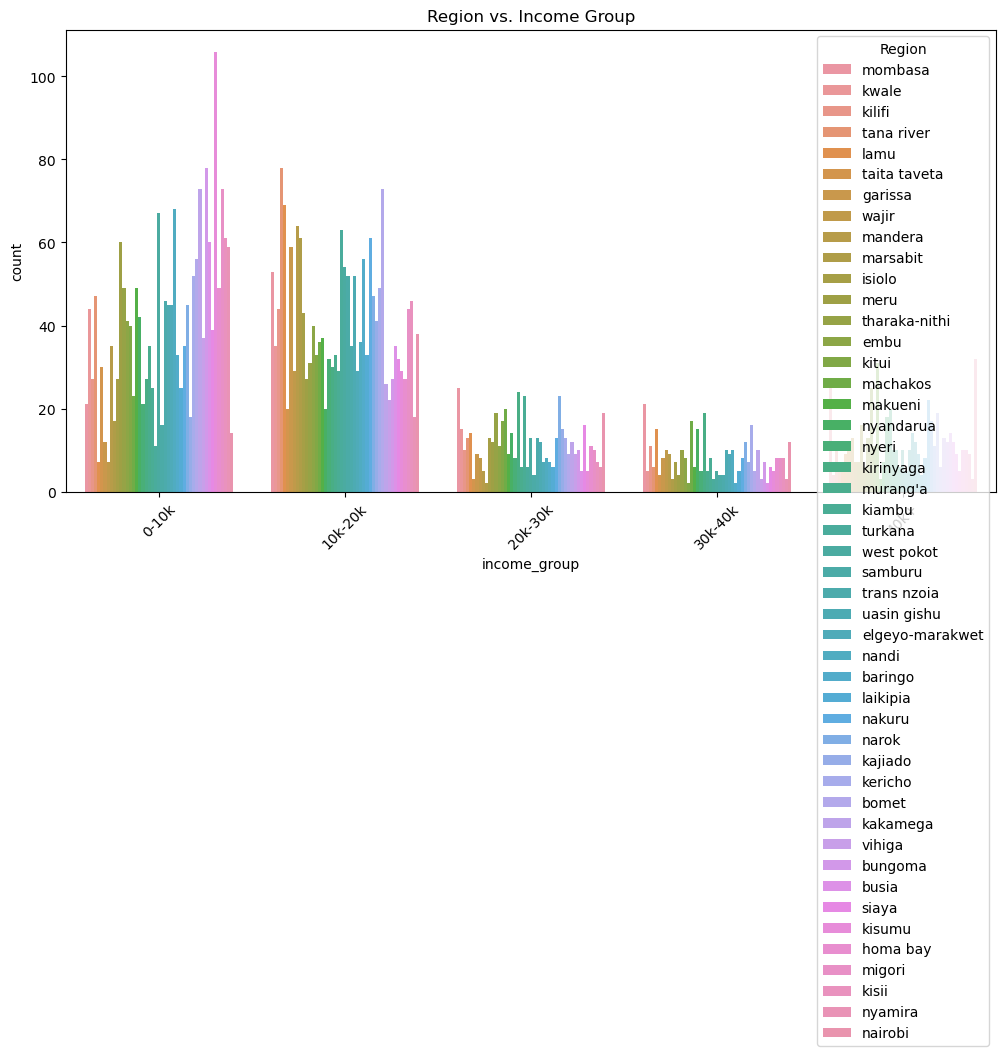

In [204]:
# Region vs. Income Group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='region', data=df)
plt.title("Region vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.savefig('region_vs_income_group.png', bbox_inches='tight')

plt.show()

This bar chart depicts the distribution of income groups across various regions in Kenya. Each color represents a different region, showing how income is distributed geographically among informal sector workers. The lower income brackets (0-10k and 10k-20k) are densely populated across almost all regions, indicating a widespread challenge of low income among informal workers. However, regions like Nairobi and Mombasa (visible in distinct colors) have a relatively higher concentration of individuals in the $20k-30k income group, suggesting slightly better income opportunities in these urban areas. This geographic analysis highlights the need for region-specific strategies to improve income levels and ensure fair contributions to the Social Health Insurance Fund.

**Residence vs Income**

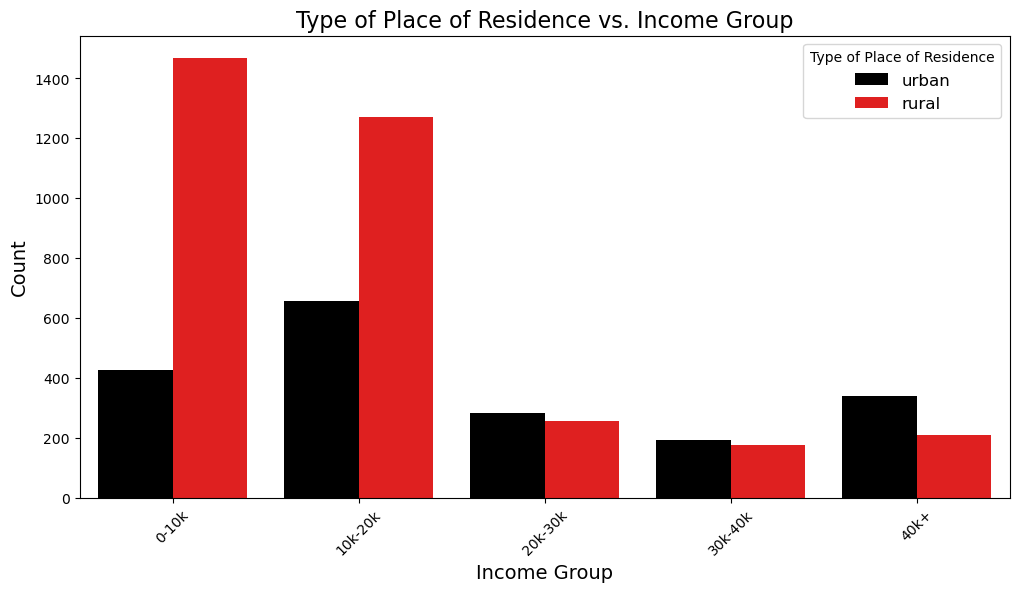

In [207]:
# Plot Type of Place of Residence vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(
    x='income_group', hue='type of place of residence', data=df, palette=kenya_colors)

plt.title("Type of Place of Residence vs. Income Group", fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type of Place of Residence', fontsize=12)

# Save the plot as a PNG file
plt.savefig('residence_vs_income_group.png', bbox_inches='tight')

# Show the plot
plt.show()


This bar chart illustrates the distribution of income groups between urban and rural residents. The chart shows that a significant majority of individuals in both urban (black) and rural (red) areas fall into the lower income brackets (0-10k and 10k-20k), with rural areas having a noticeably higher count. This suggests that rural residents are more likely to earn lower incomes compared to their urban counterparts. However, urban areas show a higher representation in the $30k-40k and 40k+ income groups, indicating that urban residents generally have better income opportunities. These findings underscore the importance of targeted policy interventions to bridge the income gap between rural and urban areas, ensuring equitable contributions to the Social Health Insurance Fund.

**Sources of drinking water vs income**

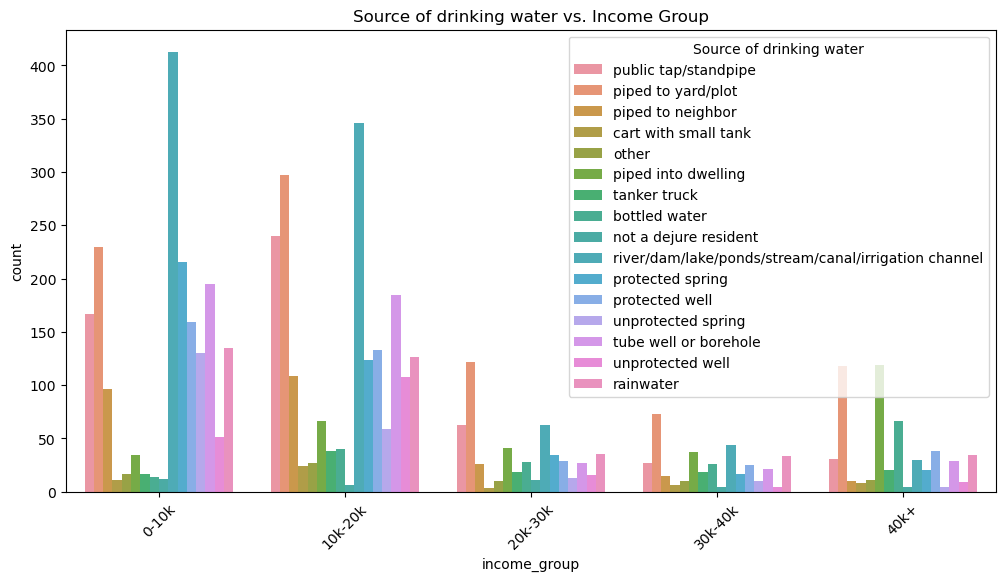

In [210]:
# Source of drinking water vs. Income group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='source of drinking water', data=df)
plt.title("Source of drinking water vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Source of drinking water')
plt.savefig('Source of drinking water vs income.png', bbox_inches='tight')
plt.show()


This bar chart presents the relationship between income groups and sources of drinking water among informal sector workers. It shows a notable trend where those relying on public taps/standpipes and protected wells are mostly concentrated in the lower income brackets (0-10k and 10k-20k). Conversely, individuals with access to piped into dwelling or bottled water are more prevalent in the higher income brackets, such as $30k-40k and 40k+. This indicates that access to safer and more reliable water sources is often correlated with higher income levels. The chart highlights disparities in access to clean water, suggesting that improving water access could be crucial in raising living standards for lower-income groups. This insight can help shape policies to ensure equitable resource distribution, which supports fair contributions to the Social Health Insurance Fund.

**Type of toilet vs income**

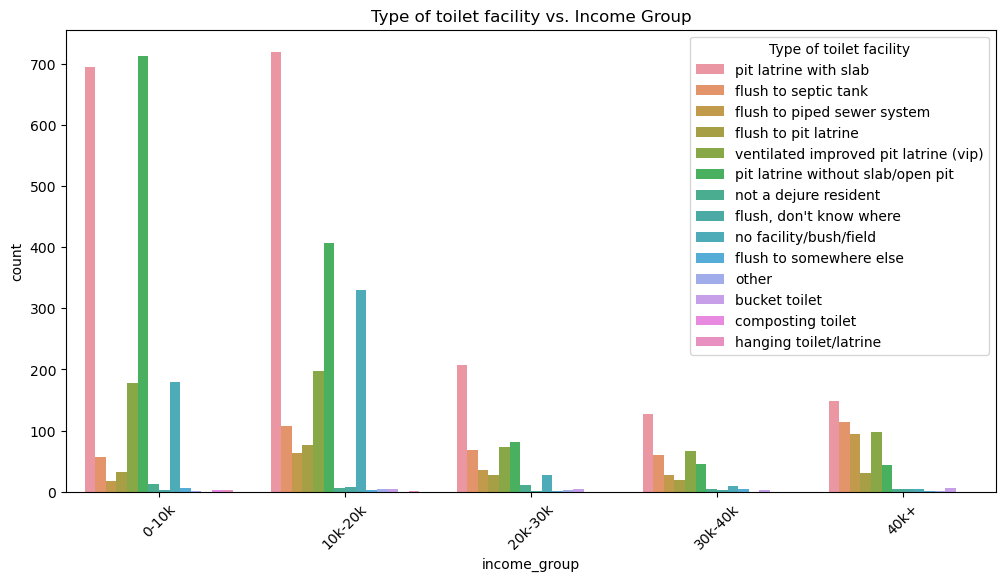

In [213]:
# Type of toilet facility vs. Income group

plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='type of toilet facility', data=df)
plt.title("Type of toilet facility vs. Income Group")
plt.xticks(rotation=45)
plt.legend(title='Type of toilet facility')
plt.savefig('Type of tollet vs income.png', bbox_inches='tight')
plt.show()

This bar chart illustrates the distribution of toilet facilities used by different income groups within the informal sector. The majority of individuals in lower income brackets (0-10k and 10k-20k) primarily use pit latrines with slabs and ventilated improved pit latrines (VIP), indicated by the high counts for these facilities. As income increases, there is a gradual shift toward more sophisticated sanitation solutions like flush to septic tank and flush to piped sewer systems. The presence of no facility/bush/field usage remains relatively low but is concerning as it represents inadequate sanitation options among the poorest groups. This chart highlights the need for improved sanitation infrastructure, particularly for lower-income individuals, which can contribute to better health outcomes and potentially support more equitable income assessments for the Social Health Insurance Fund.

**Electricity vs Income**

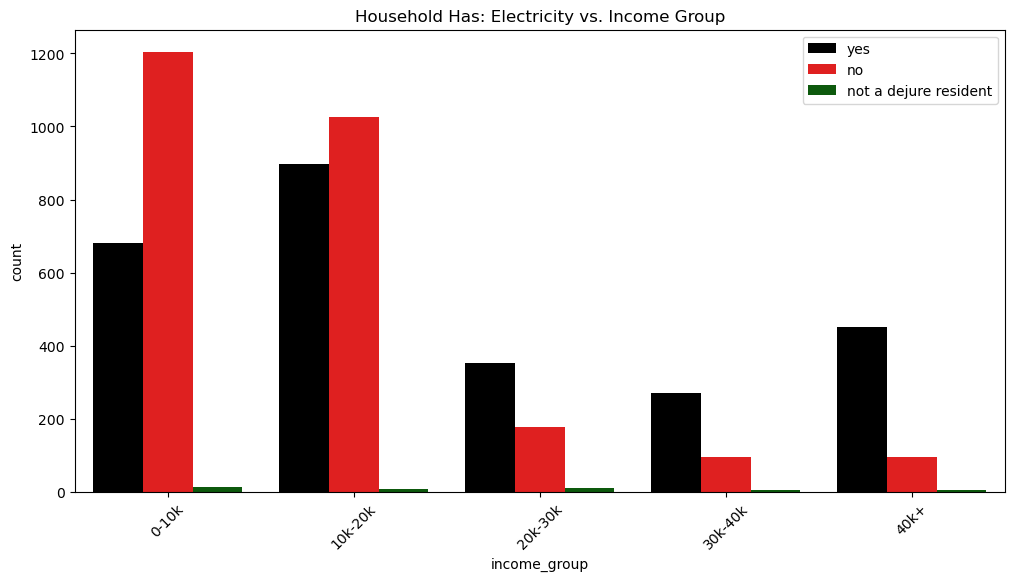

In [216]:
# Household Has: Electricity vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: electricity', data=df, palette=kenya_colors)
plt.title("Household Has: Electricity vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('House with electricity vs income.png', bbox_inches='tight')
plt.show()

This bar chart shows the relationship between household electricity access and income groups among informal sector workers. It reveals that a large portion of households in the lower income brackets (0-10k and 10k-20k) lack electricity, indicated by the high counts in the "no" category (red). However, as income increases, the number of households with electricity access (black) rises significantly. By the 30k-40k and 40k+ income groups, most households have electricity, highlighting a clear correlation between income level and access to electricity. This suggests that improving electricity access could be a key factor in enhancing the living conditions of lower-income groups, thereby contributing to more equitable contributions to the Social Health Insurance Fund.

**Radio ownership vs Income**

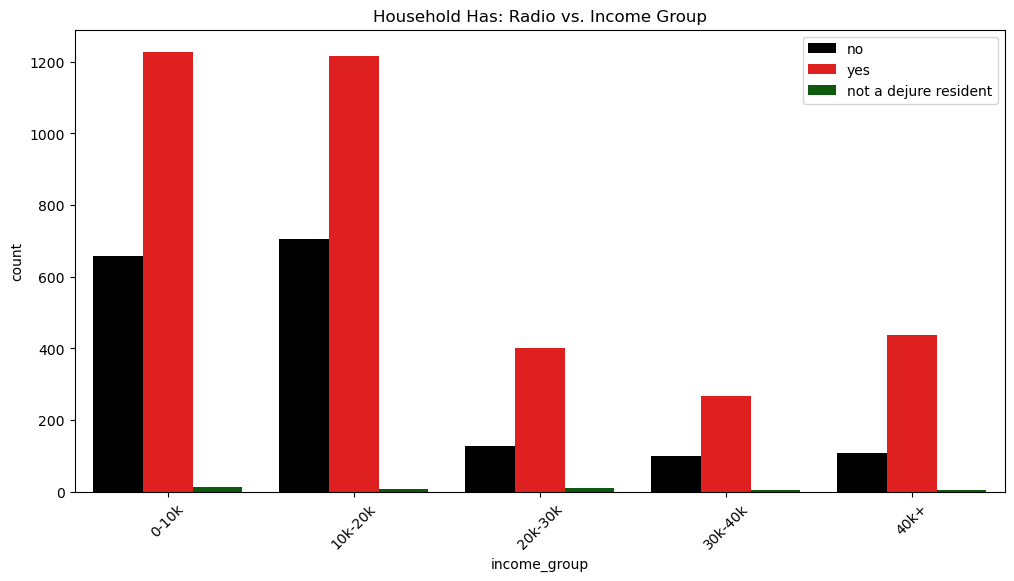

In [219]:
# Household Has: Radio vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: radio', data=df, palette=kenya_colors)
plt.title("Household Has: Radio vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('House with Radio vs income.png', bbox_inches='tight')
plt.show()

This bar chart displays the distribution of radio ownership across different income groups among informal sector workers. A significant number of households in the lower income brackets (0-10k and 10k-20k) own radios, indicated by the high counts in the "yes" category (red). This trend remains consistent across all income groups, with radio ownership being relatively stable even as income increases. Radios appear to be a common household item regardless of income, potentially serving as an accessible source of information and entertainment across socio-economic levels. The consistent radio ownership across income groups highlights its importance as a communication tool that could be leveraged for disseminating information about the Social Health Insurance Fund and other social programs.

**Television ownership vs Income**

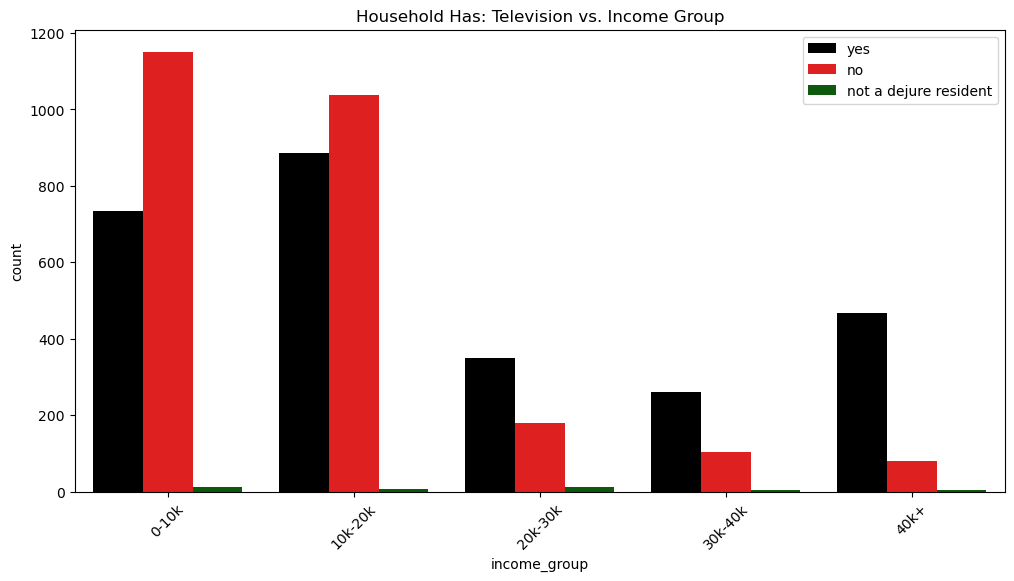

In [222]:
# Household Has: Television vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: television', data=df, palette=kenya_colors)
plt.title("Household Has: Television vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Television ownership vs income', bbox_inches='tight')
plt.show()

This bar chart illustrates the distribution of television ownership across different income groups among informal sector workers. In the lower income brackets (0-10k and 10k-20k), a significant number of households do not own televisions, as indicated by the higher count in the "no" category (red). However, as income increases, television ownership becomes more prevalent, with a noticeable shift in the 30k-40k and 40k+ income groups where most households own a television (black). This trend suggests that television ownership is closely tied to income levels, potentially reflecting the improved financial capacity of higher-income groups to afford such amenities. Access to television can enhance information dissemination and entertainment, contributing to a higher quality of life and potentially more informed participation in programs like the Social Health Insurance Fund.

**The highest proportion of households with televisions is in the 10k-20k income group, while the lowest is in the 20k-30k income group**

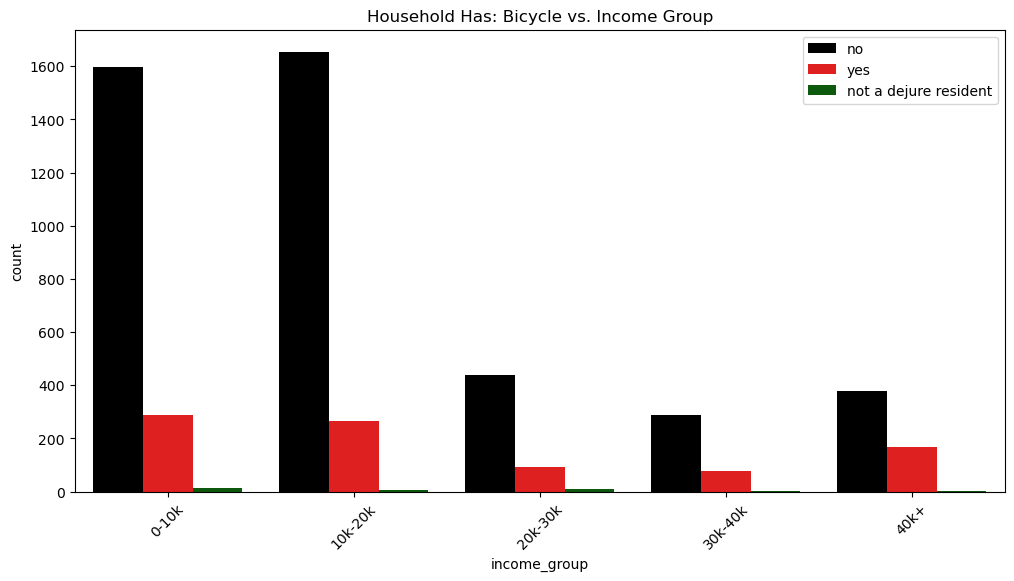

In [225]:
# Household Has: Bicycle vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: bicycle', data=df, palette=kenya_colors)
plt.title("Household Has: Bicycle vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Bicycle ownership vs income', bbox_inches='tight')
plt.show()

This bar chart shows the distribution of bicycle ownership across different income groups among informal sector workers. A large majority of households across all income brackets do not own bicycles, as indicated by the high counts in the "no" category (black). The lack of bicycle ownership is particularly pronounced in the lower income brackets (0-10k and 10k-20k), with only a small proportion owning bicycles (red). As income increases, the pattern remains relatively consistent, although there is a slight increase in bicycle ownership in the higher income groups (30k-40k and 40k+). This suggests that bicycle ownership is not strongly tied to income levels, potentially due to other factors like geographical location or access to public transportation influencing transportation choices. Understanding these patterns can help tailor interventions and policies to improve mobility options for lower-income individuals, supporting their economic activities and contributions to the Social Health Insurance Fund.

**Motorcycle ownership vs Income**

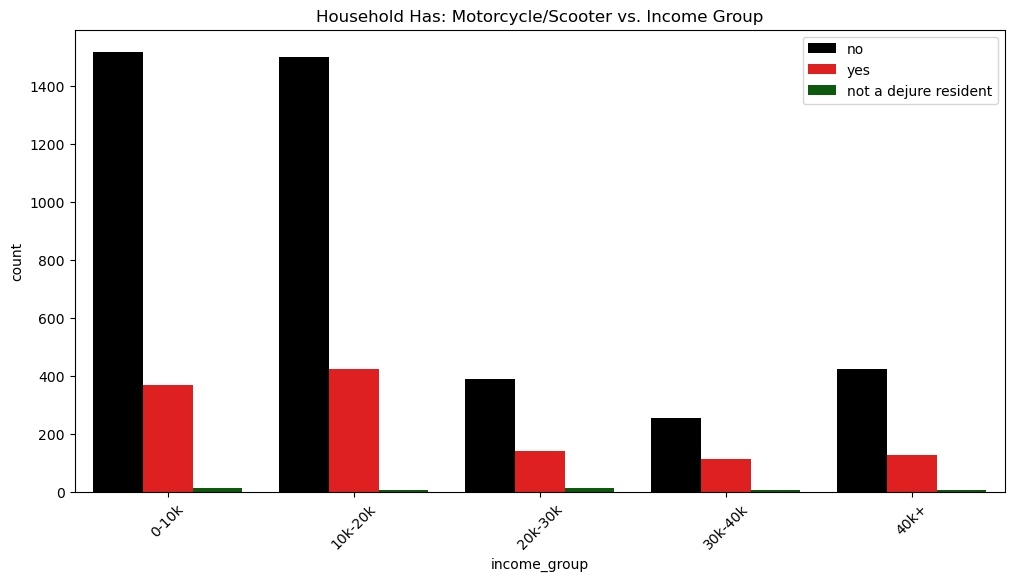

In [228]:
# Household Has: Motorcycle/Scooter vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: motorcycle/scooter', data=df, palette=kenya_colors)
plt.title("Household Has: Motorcycle/Scooter vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Motorcycle vs income', bbox_inches='tight')
plt.show()

This bar chart displays the distribution of motorcycle or scooter ownership across different income groups among informal sector workers. In the lower income brackets (0-10k and 10k-20k), the majority of households do not own motorcycles or scooters, as indicated by the high counts in the "no" category (black). However, there is a notable presence of motorcycle ownership (red) in these lower income brackets, suggesting that motorcycles might be a more affordable transportation option compared to cars. As income increases, the proportion of households owning motorcycles or scooters rises slightly, particularly in the 30k-40k and 40k+ income groups. This trend indicates that motorcycle ownership is somewhat linked to income levels, potentially serving as a practical and cost-effective mode of transportation for middle-income households. Understanding this pattern can help inform policies aimed at improving transportation access and economic opportunities for lower-income individuals, supporting their contributions to the Social Health Insurance Fund.

**The highest proportion of households with motorcycles/scooters is in the 10k-20k income group, while the lowest is in the 0-10k income group**

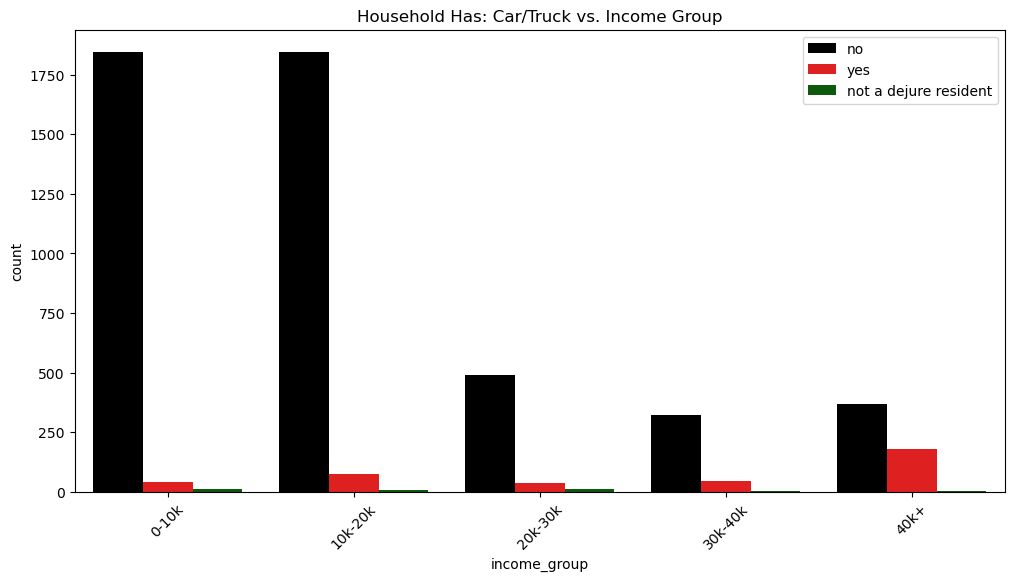

In [231]:
# Household Has: Car/Truck vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='household has: car/truck', data=df,  palette=kenya_colors)
plt.title("Household Has: Car/Truck vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Car ownership vs income', bbox_inches='tight')

plt.show()

This bar chart shows the distribution of car or truck ownership across different income groups among informal sector workers. The vast majority of households in the lower income brackets (0-10k and 10k-20k) do not own cars or trucks, as indicated by the overwhelming counts in the "no" category (black). Ownership of vehicles is relatively rare across all income groups, with only a slight increase in the higher income brackets (30k-40k and 40k+), where there is a small but noticeable number of households with vehicles (red). This pattern suggests that car ownership is largely limited to higher-income households, reflecting the significant financial investment required for vehicle ownership.

**Floor material vs income**

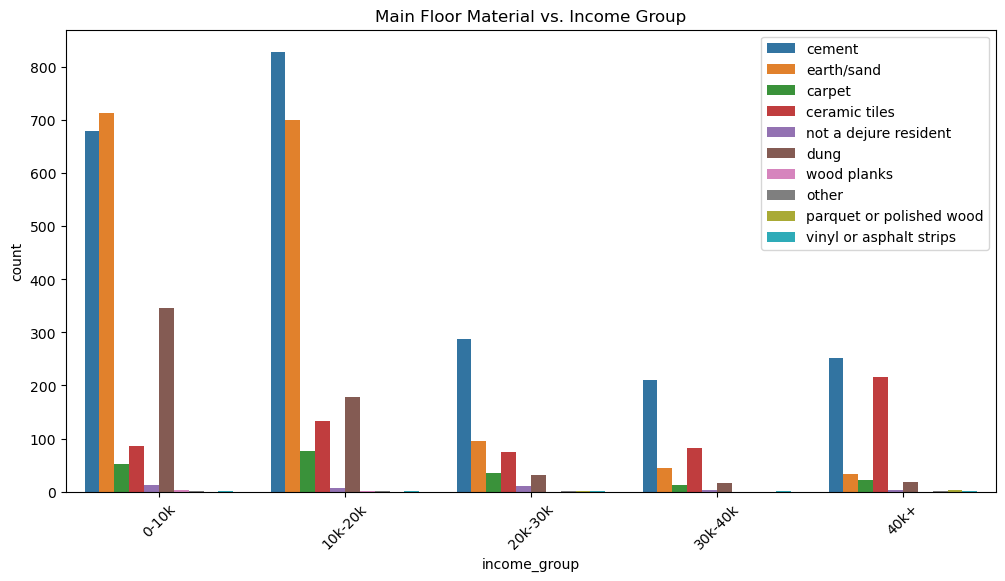

In [234]:
# Plot: Main Floor Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main floor material', data=df)
plt.title("Main Floor Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Main floor material vs income', bbox_inches='tight')

plt.show()

This bar chart illustrates the distribution of main floor materials used in households across different income groups among informal sector workers. In the lower income brackets (0-10k and 10k-20k), cement and earth/sand are the most common flooring materials, with cement being slightly more prevalent. As income increases, the use of more expensive materials like ceramic tiles becomes more common, particularly in the $30k-40k and 40k+ income groups. The use of dung and wood planks is minimal and primarily seen in the lowest income group, reflecting poorer housing conditions. This pattern suggests that flooring material is a strong indicator of household income levels, with higher-income households able to afford better quality and more durable materials.

**The highest proportion of households with cement floors is in the 10k-20k income group, while the lowest is in the 40k-50k income group**

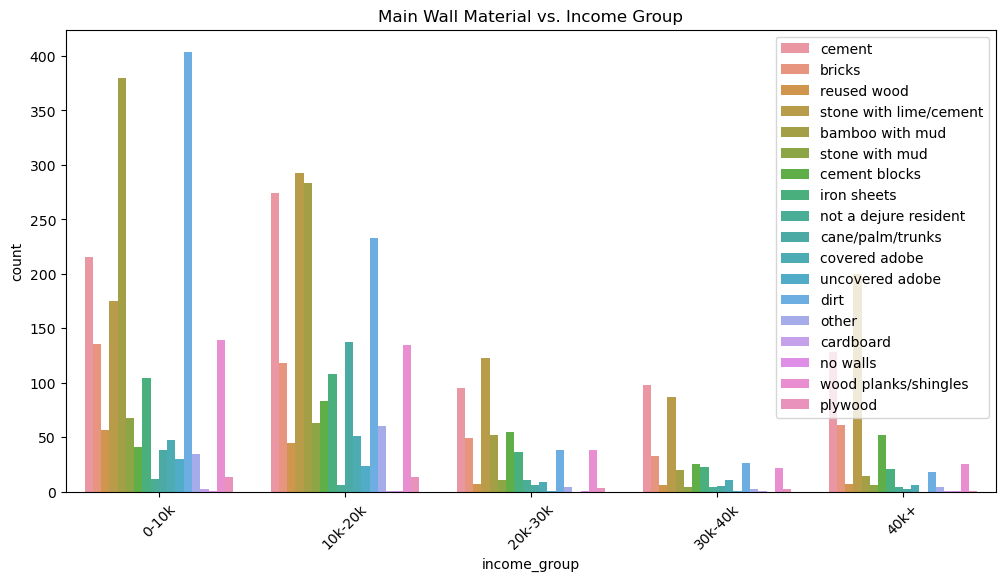

In [237]:
# Main Wall Material vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='main wall material', data=df)
plt.title("Main Wall Material vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Main wall material vs income', bbox_inches='tight')

plt.show()

This bar chart shows the distribution of main wall materials across different income groups among informal sector workers. In the lower income brackets (0-10k and 10k-20k), cement and reused wood are the most common materials, followed by iron sheets and bricks. These materials are likely chosen for their affordability and availability. As income increases, particularly in the $30k-40k and 40k+ groups, there is a noticeable shift toward more durable and higher-quality materials like cement blocks and bricks, indicating improved financial capacity for better housing. The use of more primitive materials like bamboo with mud and cardboard is primarily seen in the lowest income group, reflecting inadequate housing conditions.

**House members vs income**

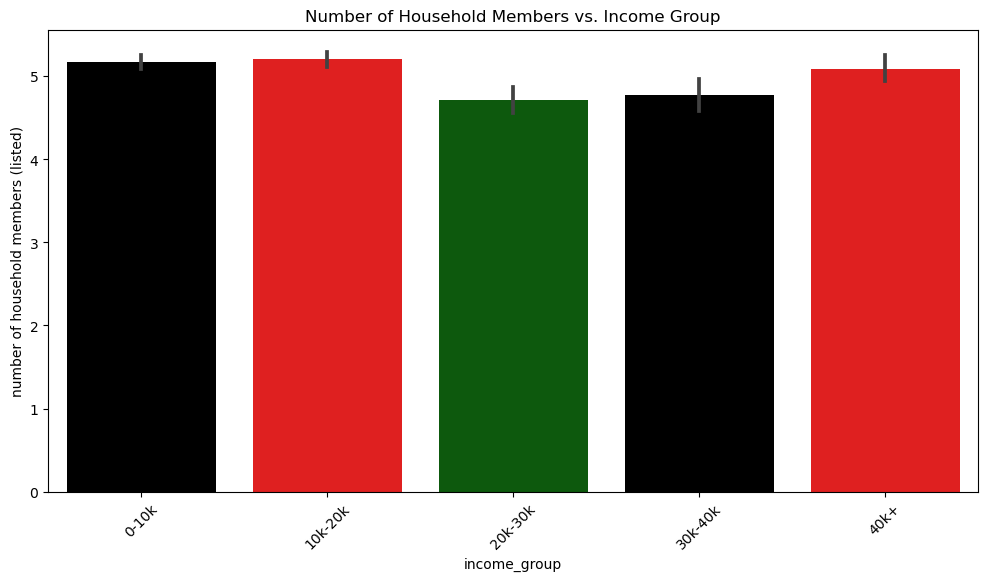

In [240]:
# Number of Household Members vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='number of household members (listed)', data=df, palette=kenya_colors)
plt.title("Number of Household Members vs. Income Group")
plt.xticks(rotation=45)
plt.savefig('House members vs income', bbox_inches='tight')

plt.show()

This bar chart compares the average number of household members across different income groups. The chart shows that the number of household members remains relatively consistent across all income groups, hovering around five members per household. There is a slight decrease in household size for the 20k-30k income group, but overall, the differences are minimal. This indicates that household size is not strongly correlated with income levels within this population, suggesting that family size may be influenced by other factors such as cultural or regional norms rather than economic status.

**The highest number of household members is in the 0-10k and 10k-20k income groups, while the lowest is in the 20k-30k income group**

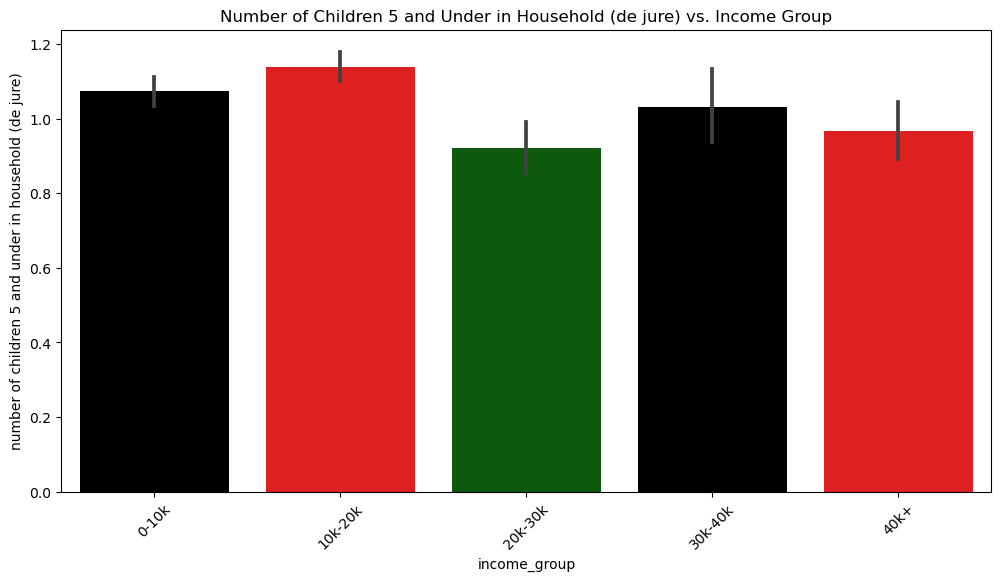

In [243]:
# Number of Children 5 and Under in Household (de jure) vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='number of children 5 and under in household (de jure)', data=df, palette=kenya_colors)
plt.title("Number of Children 5 and Under in Household (de jure) vs. Income Group")
plt.xticks(rotation=45)
plt.savefig('Number of children under 5 vs income', bbox_inches='tight')

plt.show()


This bar chart displays the average number of children aged 5 and under in households across different income groups among informal sector workers. The chart reveals that households in the lowest income bracket (0-10k) have slightly fewer young children compared to those in the 10k-20k group. Interestingly, as income increases to the 20k-30k range, the number of young children decreases slightly, and this trend continues through the higher income brackets (30k-40k and 40k+). This suggests that higher-income households might have fewer young children, potentially reflecting choices related to family planning and resource allocation.

**Education vs income**

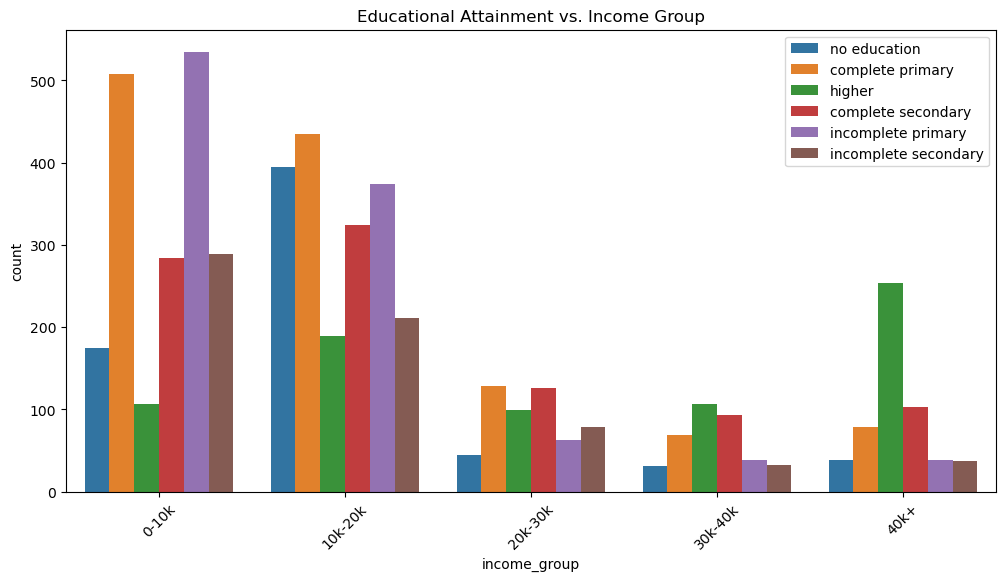

In [246]:
# Educational Attainment vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='educational attainment', data=df)
plt.title("Educational Attainment vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Education vs income', bbox_inches='tight')

plt.show()

This bar chart illustrates the distribution of educational attainment across different income groups among informal sector workers. In the lowest income group (0-10k), complete primary and incomplete primary education are the most common, indicating limited educational opportunities. As income levels increase to the 10k-20k range, there is a noticeable shift towards higher educational attainment, with complete secondary and higher education becoming more prevalent. In the highest income brackets (30k-40k and 40k+), a significant number of individuals have completed secondary or higher education, suggesting a strong correlation between education level and income.



**Education vs income**

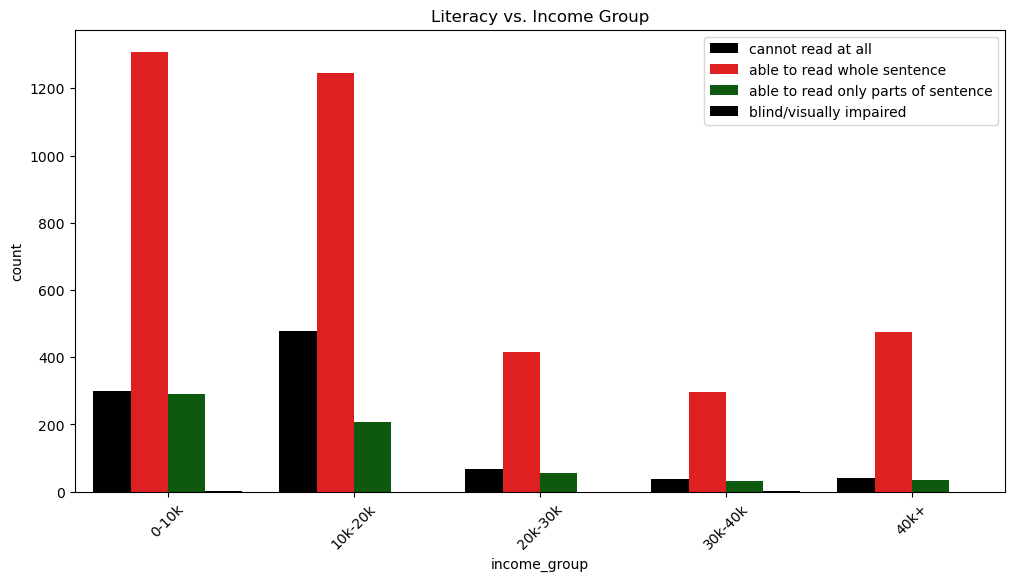

In [249]:
# Literacy vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='literacy', data=df, palette=kenya_colors)
plt.title("Literacy vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Education vs income', bbox_inches='tight')

plt.show()

This chart illustrates the relationship between literacy levels and income groups within the informal sector. It shows that the ability to read whole sentences is prevalent across all income groups, but there is a significant number of individuals in the lower income brackets (0-10k and 10k-20k) who cannot read at all. As income increases, the number of individuals with full literacy also rises, indicating that literacy is closely linked to higher income levels. This highlights the importance of literacy programs to improve income opportunities and economic mobility for informal workers, supporting fair contributions to the Social Health Insurance Fund.

**Cooking fuel vs income**

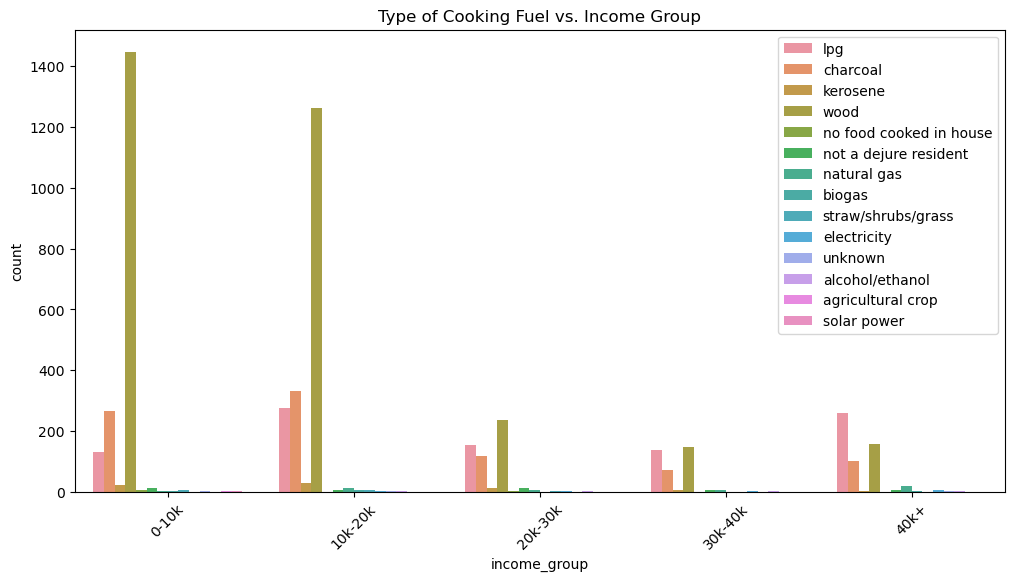

In [252]:
# Type of Cooking Fuel vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='type of cooking fuel', data=df)
plt.title("Type of Cooking Fuel vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Cooking fuel vs income', bbox_inches='tight')

plt.show()


This chart illustrates the types of cooking fuel used across different income groups among informal sector workers. The data shows that wood is the most common fuel for households in the lowest income brackets (0-10k and 10k-20k), indicating a reliance on traditional fuels. As income increases, particularly in the 30k-40k and 40k+ groups, there is a noticeable shift towards cleaner and more modern fuels such as LPG and electricity. This transition highlights how higher income levels enable access to safer and more efficient energy sources, which can improve health and reduce environmental impact. Promoting access to cleaner fuels could enhance living conditions for lower-income households and support their economic activities, leading to more equitable contributions to the Social Health Insurance Fund.

**Smartphone use vs income**

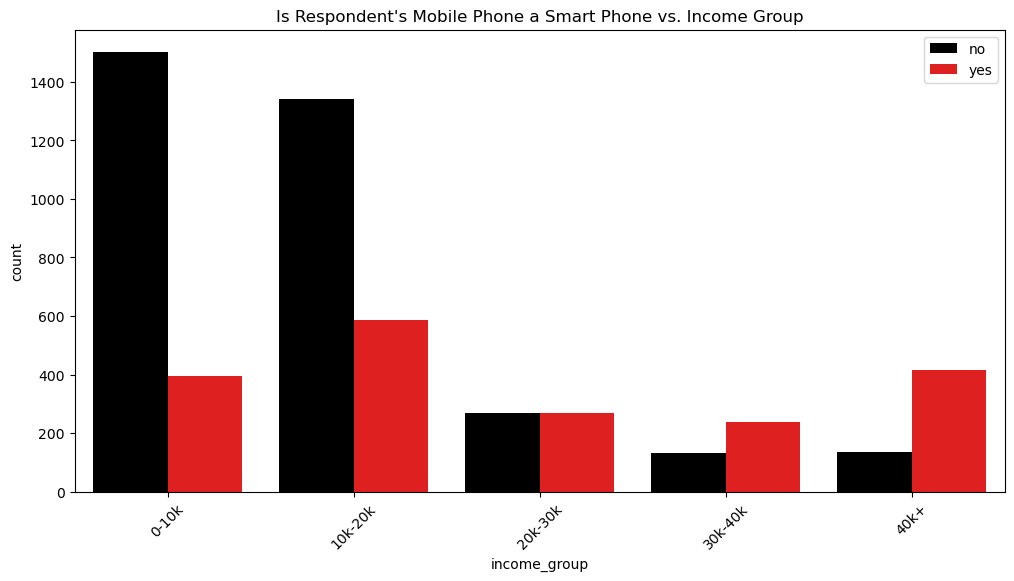

In [255]:
# Is Respondent's Mobile Phone a Smart Phone vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='is respondent\'s mobile phone a smart phone', data=df, palette=kenya_colors)
plt.title("Is Respondent's Mobile Phone a Smart Phone vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Smartphone use vs income', bbox_inches='tight')

plt.show()


This chart shows the relationship between smartphone ownership and income levels among informal sector workers. In the lowest income brackets ($0-10k and 10k-20k), most individuals do not own smartphones, as indicated by the high count of "no" responses (black). However, as income increases, particularly in the 30k-40k and 40k+ groups, the ownership of smartphones (red) becomes more prevalent. This trend suggests that higher income levels are associated with greater access to technology, which can enhance communication, access to information, and economic opportunities.

**Banks account ownership vs income**

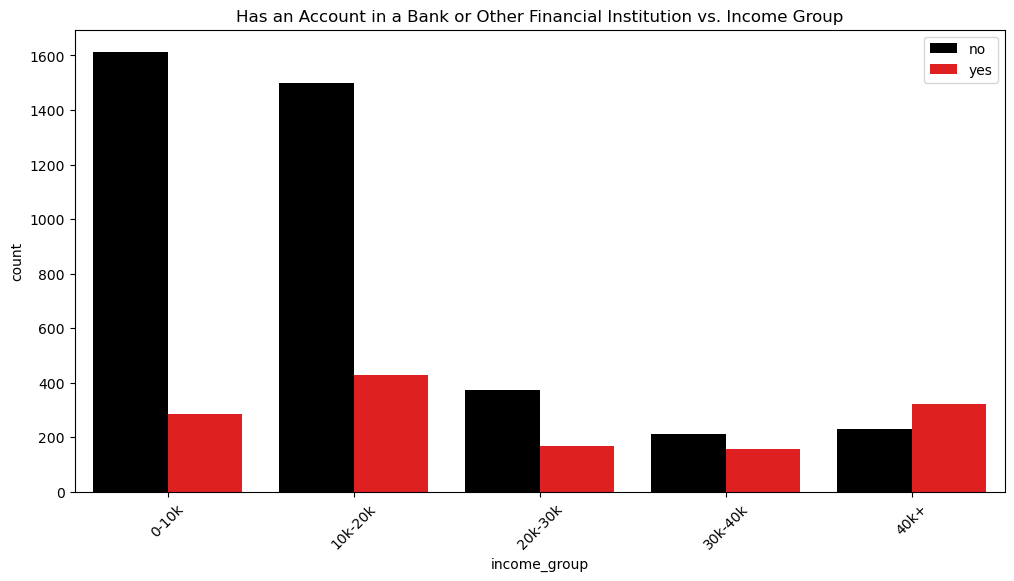

In [258]:
# Has an Account in a Bank or Other Financial Institution vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='has an account in a bank or other financial institution', data=df, palette=kenya_colors)
plt.title("Has an Account in a Bank or Other Financial Institution vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Bank account vs income', bbox_inches='tight')

plt.show()


This chart depicts the relationship between financial inclusion and income levels among informal sector workers. In the lower income brackets (0-10k and 10k-20k), the majority of individuals do not have a bank account, as indicated by the high count of "no" responses (black). However, as income levels increase, particularly in the 30k-40k and 40k+ groups, there is a noticeable rise in bank account ownership (red). This trend highlights the connection between higher income and access to formal financial services, which can provide opportunities for saving, borrowing, and investing.

**Use of Internet vs Income**

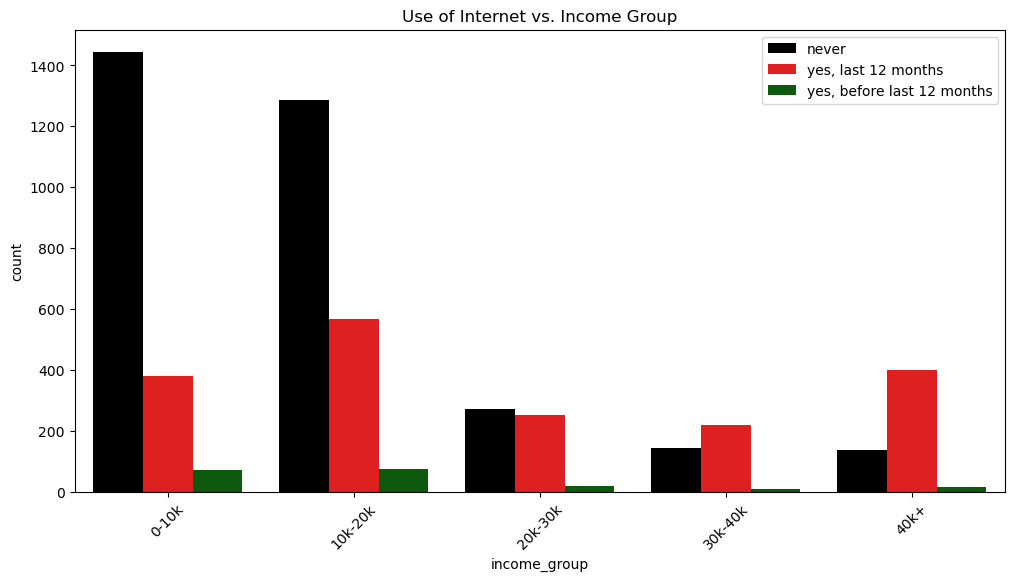

In [261]:
# Use of Internet vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='use of internet', data=df, palette=kenya_colors)
plt.title("Use of Internet vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Use of internet vs income', bbox_inches='tight')

plt.show()


This chart illustrates the link between having a bank account and income levels among informal sector workers. In the lowest income brackets (0-10k and 10k-20k), most individuals do not have a bank account, as shown by the high number of "no" responses (black). However, bank account ownership (red) increases with higher income levels, especially in the 30k-40k and 40k+ groups. This pattern indicates that higher income is associated with greater access to financial services, which can facilitate saving and financial planning.

**Use of Internet vs income**

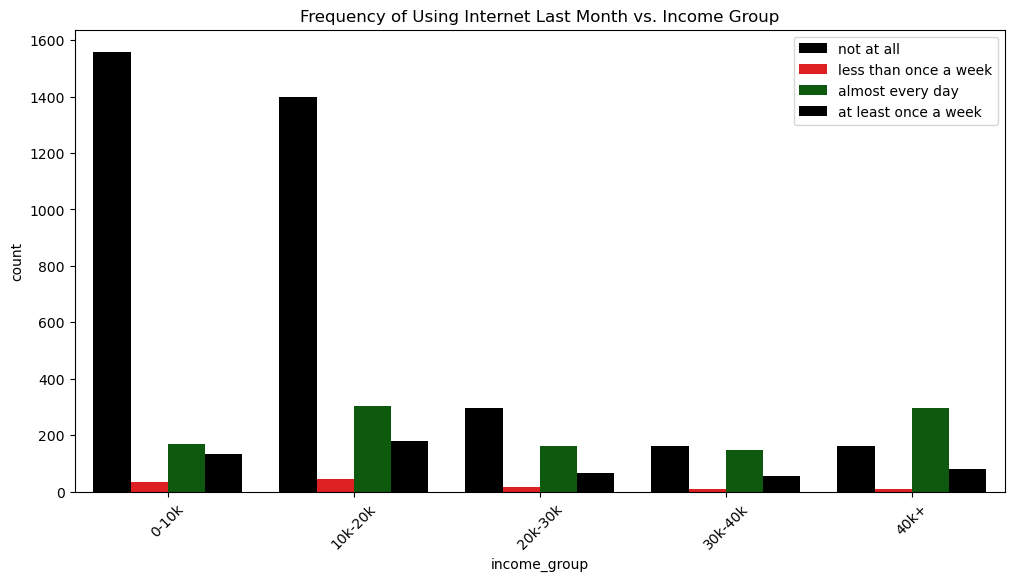

In [264]:
# Frequency of Using Internet Last Month vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='frequency of using internet last month', data=df, palette=kenya_colors)
plt.title("Frequency of Using Internet Last Month vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Use of internet last month vs income', bbox_inches='tight')

plt.show()

This chart shows the relationship between internet usage frequency and income levels among informal sector workers. In the lowest income brackets (0-10k and 10k-20k), the majority of individuals did not use the internet at all (black), indicating limited access to digital resources. However, as income increases, especially in the 30k-40k and 40k+ groups, internet usage becomes more frequent, with more individuals accessing the internet almost every day (green). This pattern suggests that higher income levels are associated with better access to technology and information, which can enhance education, job opportunities, and economic participation.

**Wealth Index vs income**

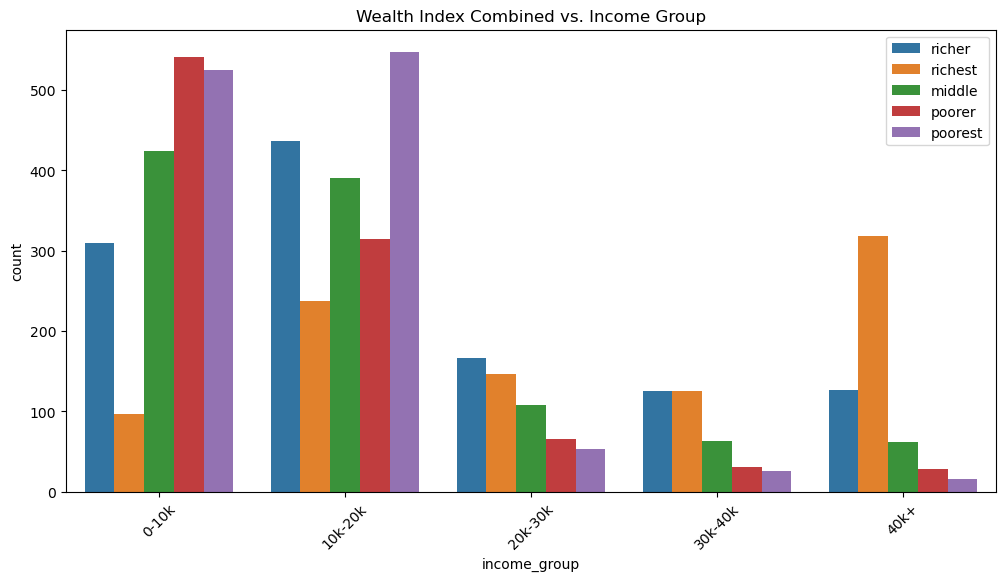

In [267]:
# Wealth Index Combined vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='wealth index combined', data=df)
plt.title("Wealth Index Combined vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Wealth Index vs Income', bbox_inches='tight')

plt.show()


This chart compares the wealth index distribution across different income groups among informal sector workers. In the lowest income brackets (0-10k and 10k-20k), the majority of individuals fall into the poorest and poorer categories (purple and red), highlighting a significant overlap between low income and low wealth. As income increases, particularly in the 30k-40k and 40k+ groups, there is a shift toward higher wealth categories, with more individuals in the richer and richest groups (blue and orange). This pattern illustrates the close relationship between income and wealth, where higher income is associated with greater asset accumulation and financial security.

**Household Head vs Income**

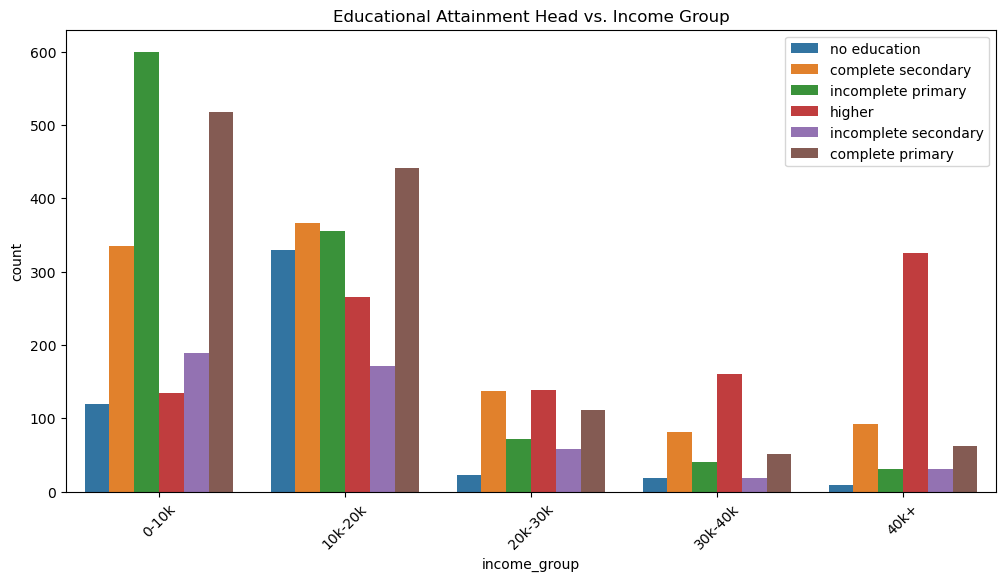

In [270]:
# Educational Attainment Head vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='educational attainment head', data=df)
plt.title("Educational Attainment Head vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

The lowest income group (0-10k) has the highest proportion of individuals with no education and the lowest proportion with higher education, while the highest income group (40k-50k) shows the opposite trend, with the lowest proportion of individuals with no education and the highest proportion with higher education

**Partner Occupation vs income**

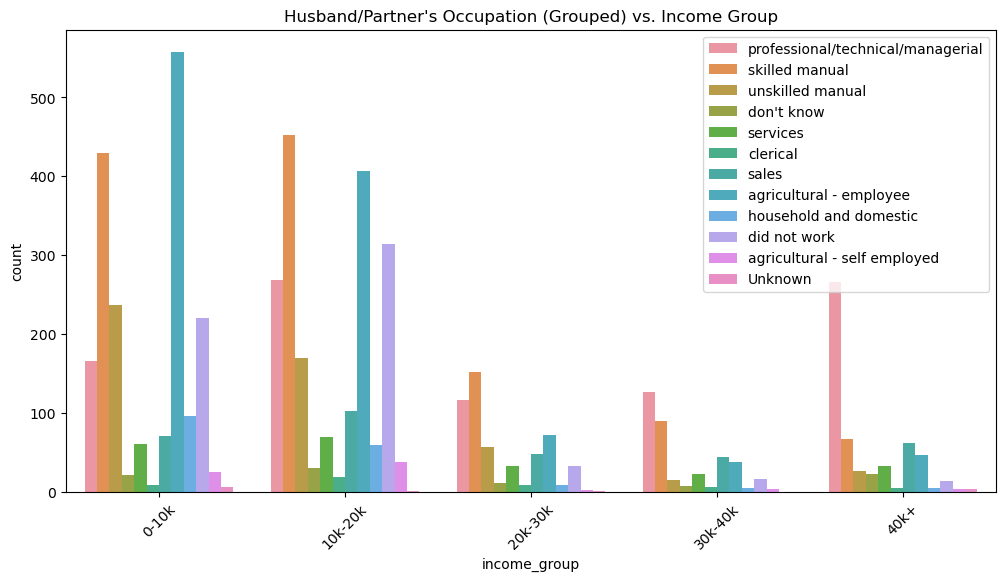

In [273]:
# Husband/Partner's Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='husband/partner\'s occupation (grouped)', data=df)
plt.title("Husband/Partner's Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Partner occupation vs income', bbox_inches='tight')

plt.show()

This chart illustrates the distribution of husband/partner occupations across different income groups among informal sector workers. In the lowest income brackets (0-10k and 10k-20k), the majority of partners are employed in agricultural, indicating a reliance on agriculture, which typically offers lower wages. Other common occupations in these groups include skilled manual and unskilled manual jobs, reflecting limited access to higher-paying opportunities. As income levels increase, there is a noticeable shift towards more professional and technical roles, with a significant increase in the professional/technical/managerial category in the 40k+ group. This transition highlights the link between occupation type and income, where higher-paying jobs are associated with greater economic mobility.

**Working/Not working vs Income**

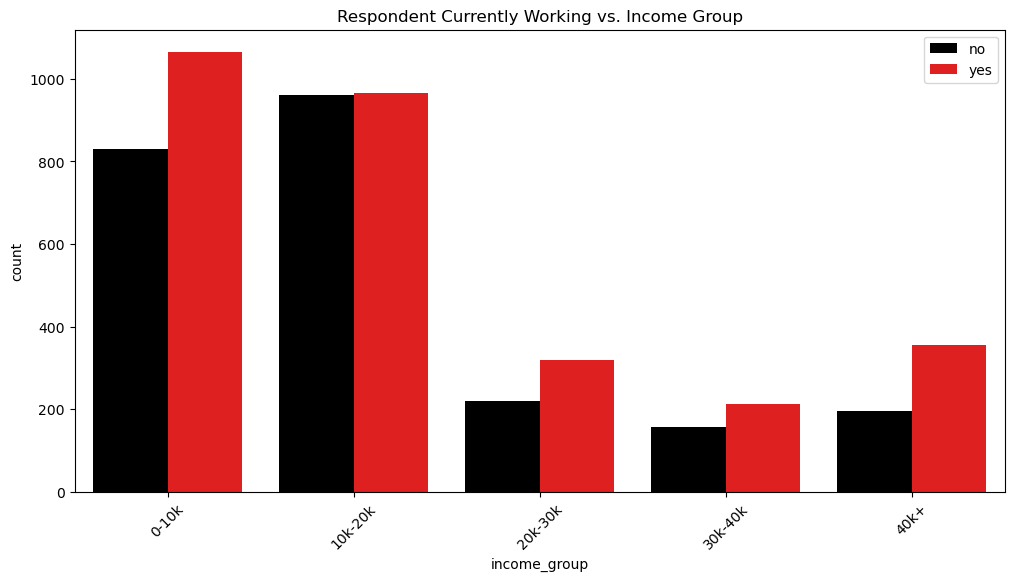

In [276]:
# Respondent Currently Working vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent currently working', data=df, palette=kenya_colors)
plt.title("Respondent Currently Working vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.savefig('Currently working vs income', bbox_inches='tight')

plt.show()

This chart shows the relationship between employment status and income levels among informal sector workers. In the lower income brackets ($0-10k and 10k-20k), a significant number of respondents are currently working, indicating that many individuals in these groups rely on low-paying jobs for their livelihood. However, there is also a substantial number of non-working individuals, which could reflect underemployment or lack of access to job opportunities. As income levels rise, particularly in the 30k-40k and 40k+ groups, the proportion of respondents currently working remains relatively high. This suggests that employment is closely tied to income, and higher-income individuals are more likely to be employed, potentially in better-paying jobs.

**Occupation vs income**

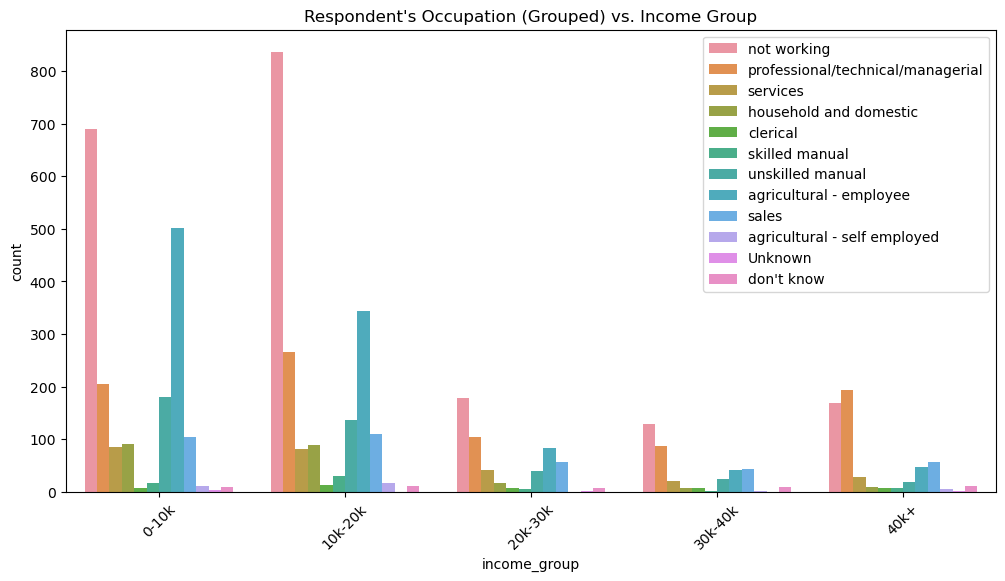

In [279]:
# Respondent's Occupation (Grouped) vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='respondent\'s occupation (grouped)', data=df)
plt.title("Respondent's Occupation (Grouped) vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

The most common occupation for respondents across all income groups is 'agricultural - employee,' with the highest proportion in the 0-10k income group. In the 40k-50k income group, 'not working' becomes the most common occupation, while 'agricultural - employee' remains relatively common but less so than in lower income groups. 'Professional/technical/managerial' and 'don't know' are among the least common occupations across all income levels

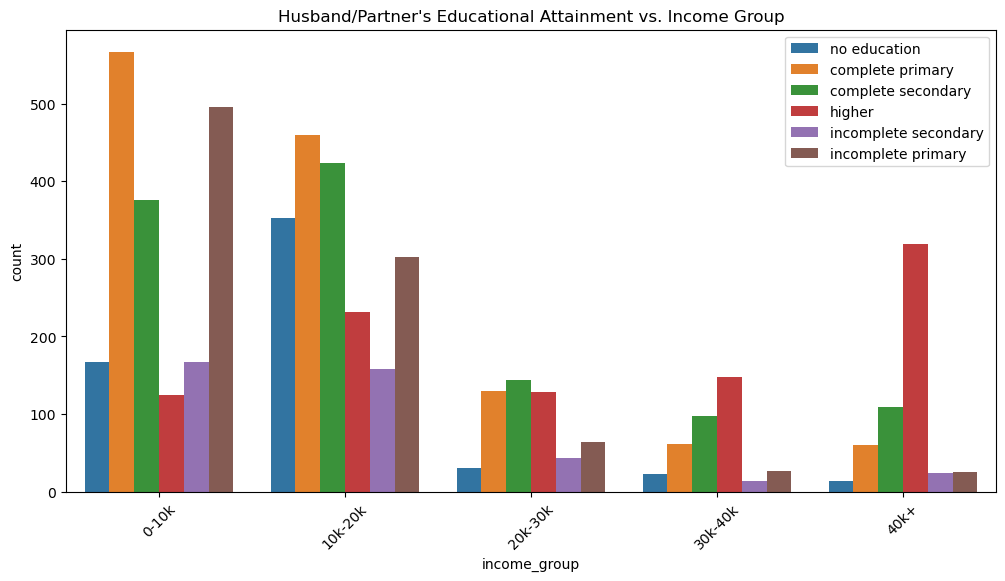

In [281]:
# Husband/Partner's Educational Attainment vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='husband/partner\'s educational attainment', data=df)
plt.title("Husband/Partner's Educational Attainment vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


The lowest income group (0-10k) has a higher proportion of husbands/partners with no education and incomplete primary education, while the highest income group (40k-50k) has a higher proportion with secondary or higher education

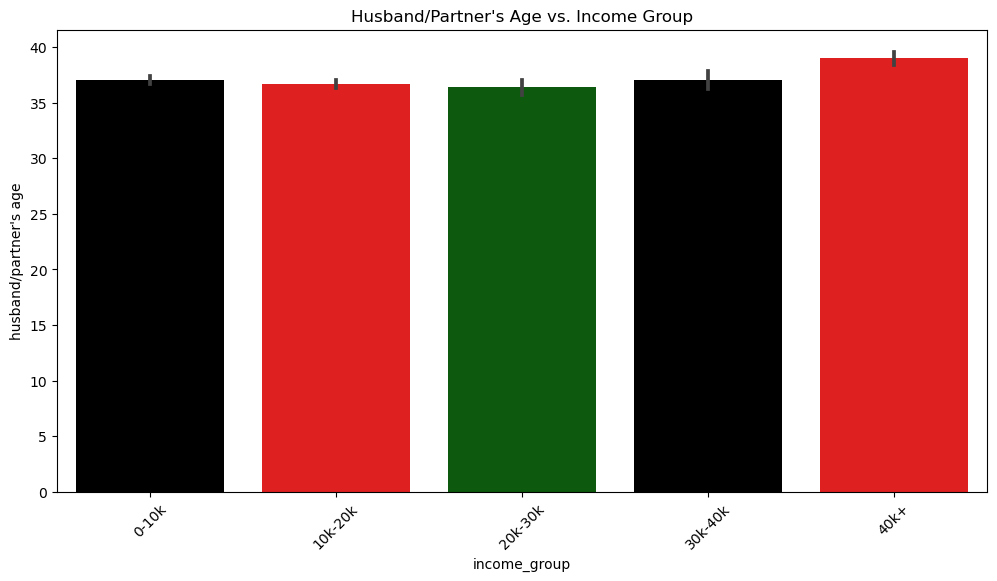

In [283]:
# Husband/Partner's Age vs. Income Group
plt.figure(figsize=(12, 6))
sns.barplot(x='income_group', y='husband/partner\'s age', data=df, palette=kenya_colors )
plt.title("Husband/Partner's Age vs. Income Group")
plt.xticks(rotation=45)
plt.show()


**The highest average age of husband/partner is in the 40k-50k income group, while the 10k-20k, 20k-30k and 30k-40k income groups have similar average ages.**

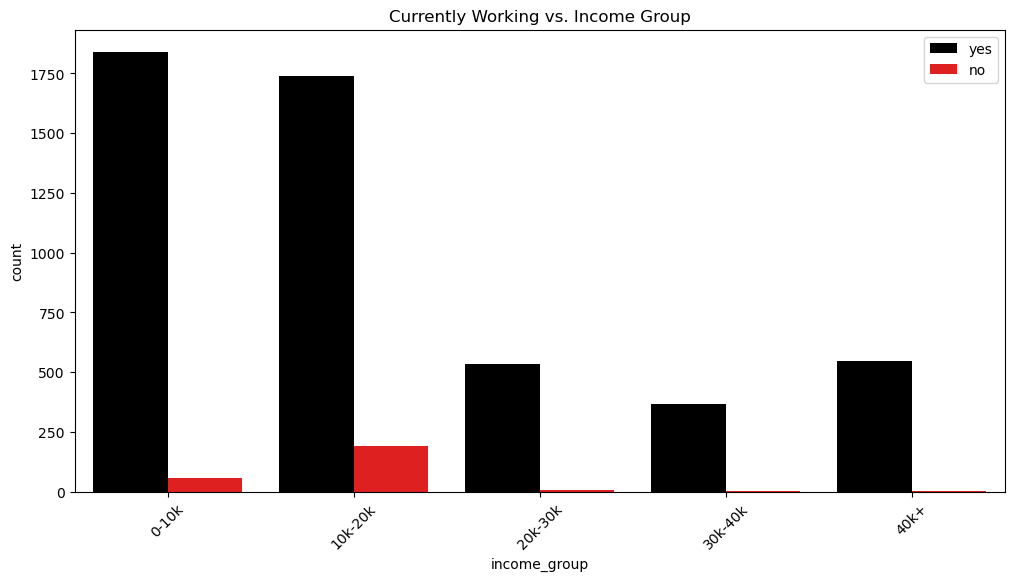

In [285]:
# Currently Working vs. Income Group
plt.figure(figsize=(12, 6))
sns.countplot(x='income_group', hue='currently working', data=df, palette=kenya_colors)
plt.title("Currently Working vs. Income Group")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


The highest proportion of respondents currently working is in the 10k-20k income group, while the lowest proportion of respondents currently working, among those who are employed, is in the 30k-40k income group. However, the 30k-40k and 40k-50k income groups have the highest proportion of individuals who are not currently working at all

## **STATISTICAL ANALYSIS📉**

**Descriptive statistics**

In [289]:
# Descriptive statistics
df.describe().T

count          mean  \
respondent's year of birth                          5285.0   1989.861495   
respondent's current age                            5285.0     31.533207   
number of household members (listed)                5285.0      5.100473   
number of children 5 and under in household (de...  5285.0      1.067360   
age of household head                               5285.0     38.005866   
age at first sex                                    5285.0     17.918070   
husband/partner's age                               5285.0     37.066414   
how much paid in last month.1                       5285.0  14670.380889   

                                                             std     min  \
respondent's year of birth                              7.712454  1972.0   
respondent's current age                                7.728593    15.0   
number of household members (listed)                    1.918951     2.0   
number of children 5 and under in household (de...      0.902098     0.0   
age of household head                                   9.050188    18.0   
age at first sex                                        4.087379     8.0   
husband/partner's age                                   8.212131    18.0   
how much paid in last month.1                       11818.674026     0.0   

                                                       25%      50%      75%  \
respondent's year of birth                          1984.0   1991.0   1996.0   
respondent's current age                              25.0     31.0     37.0   
number of household members (listed)                   4.0      5.0      6.0   
number of children 5 and under in household (de...     0.0      1.0      2.0   
age of household head                                 31.0     37.0     45.0   
age at first sex                                      15.0     17.0     20.0   
husband/partner's age                                 30.0     36.0     43.0   
how much paid in last month.1                       6000.0  10000.0  20000.0   

                                                        max  
respondent's year of birth                           2007.0  
respondent's current age                               49.0  
number of household members (listed)                    9.0  
number of children 5 and under in household (de...      5.0  
age of household head                                  66.0  
age at first sex                                       27.5  
husband/partner's age                                  62.5  
how much paid in last month.1                       41000.0

**Insights**

Year of Birth: Mean = 1989.86, Range = 1972 to 2007

Current Age: Mean = 31.53 years, Range = 15 to 49 years

Household Members: Mean = 5.10, Range = 2 to 9 members

Children Under 5: Mean = 1.07, Range = 0 to 5 children

Household Head Age: Mean = 38.01 years, Range = 18 to 66 years

Age at First Sex: Mean = 17.92 years, Range = 8 to 27.5 years

Partner's Age: Mean = 37.07 years, Range = 18 to 62.5 years

Monthly Income: Mean = KES 14,670.38, Range = KES 0 to KES 41,000



**Correlation Analysis**

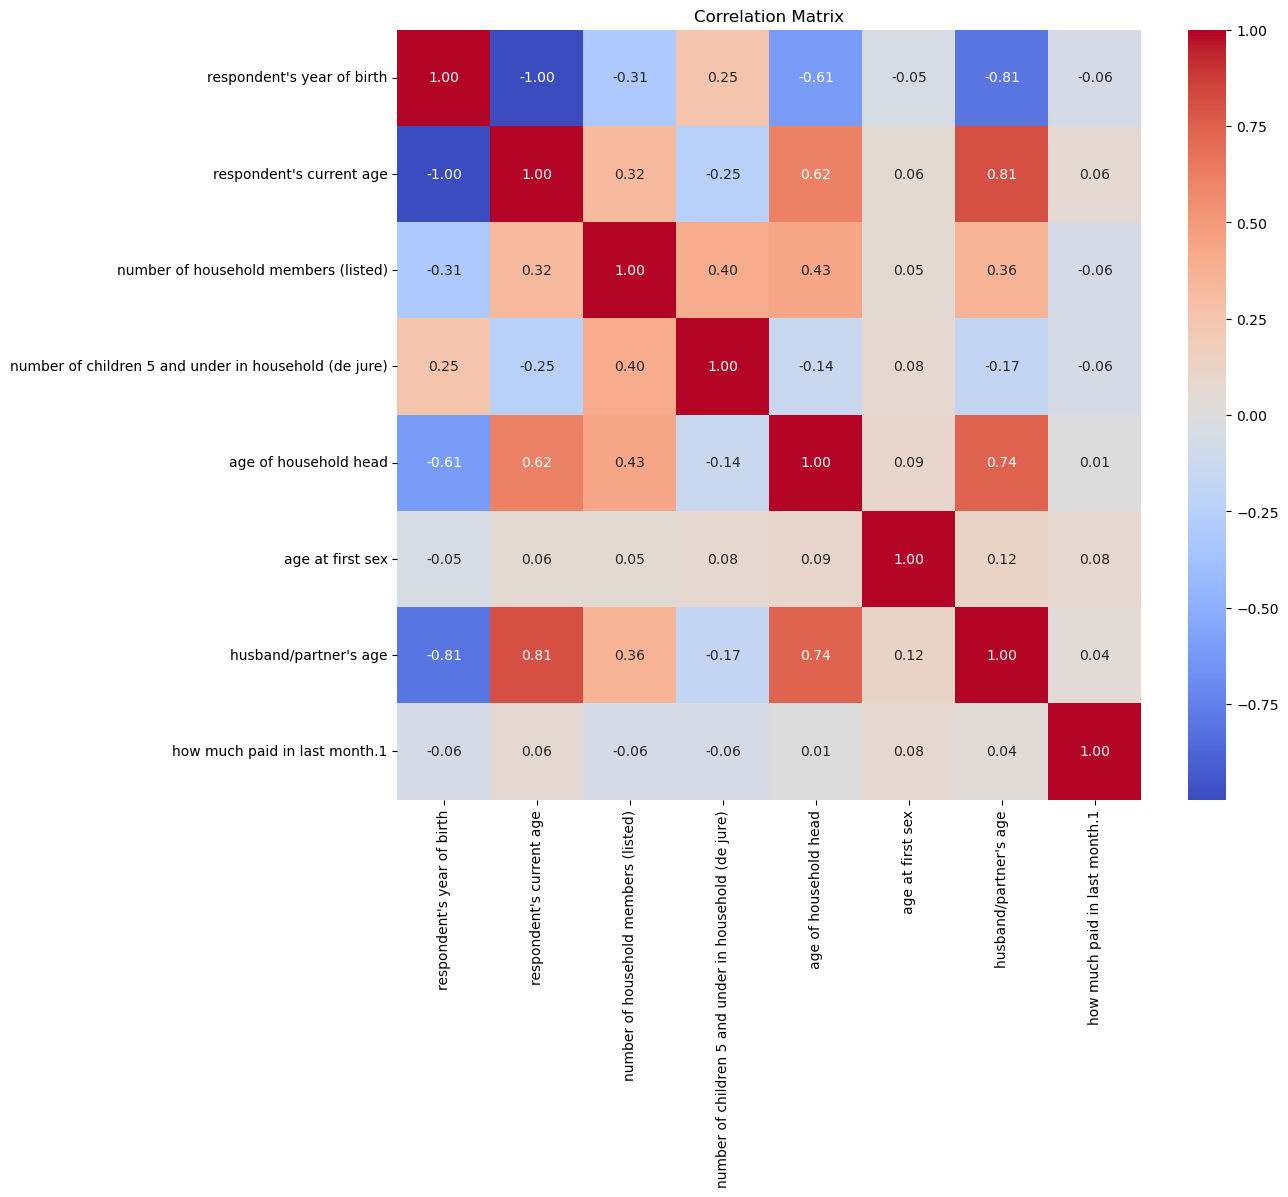

In [292]:
# Correlation Analysis

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows a strong positive correlation between age and years of birth for both respondents and their husbands/partners, a moderate positive correlation between the number of household members and the number of children under 5, and a weak negative correlation between the respondent's age and the number of children under 5.

**kruskal Wallis and Hypothesis Testing**

The Kruskal-Wallis test was used to determine if there are significant income differences based on various socio-demographic factors. The test was chosen due to its non-parametric nature, which does not assume a normal distribution of the data.

In [296]:
def perform_kruskal_wallis_test(df):
    """
    Perform the Kruskal-Wallis H test for each specified column in the DataFrame
    against the 'income_group' column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None: Prints out the test results for each column.
    """

    income_column = 'how much paid in last month.1'

    # List of columns to test
    columns = [
        "respondent's year of birth",
        "respondent's current age",
        'age in 5-year groups',
        'region',
        'type of place of residence',
        'source of drinking water',
        'type of toilet facility',
        'household has: electricity',
        'household has: radio',
        'household has: television',
        'household has: bicycle',
        'household has: motorcycle/scooter',
        'household has: car/truck',
        'main floor material',
        'main wall material',
        'main roof material',
        'number of household members (listed)',
        'number of children 5 and under in household (de jure)',
        'educational attainment',
        'relationship to household head',
        'sex of household head',
        'age of household head',
        'literacy',
        'type of cooking fuel',
        'owns a mobile telephone',
        'last 12 months use mobile telephone for financial transactions',
        "is respondent's mobile phone a smart phone",
        'has an account in a bank or other financial institution',
        'use of internet',
        'frequency of using internet last month',
        'self reported health status',
        'wealth index combined',
        'years lived in place of residence',
        'educational attainment head',
        'frequency of listening to radio',
        'frequency of watching television',
        'age at first sex',
        "husband/partner's occupation (grouped)",
        'respondent currently working',
        "respondent's occupation (grouped)",
        "husband/partner's educational attainment",
        "husband/partner's age",
        'respondent worked in last 12 months',
        'currently working',
        'occupation (grouped)',
        'use mobile telephone for financial transactions',
        'respondent education',
    ]

    # Setting significance level
    alpha = 0.05

    # Iterate over each column
    for column in columns:
        if column not in df.columns:
            continue

        # Create groups for the Kruskal-Wallis test
        groups = [df[df[column] == value][income_column] for value in df[column].unique()]

        # Check if there are enough groups to perform the test
        if len(groups) < 2:
            print(f"Not enough groups for testing {column}. Skipping...")
            continue

        # Perform the Kruskal-Wallis H Test
        statistic, p_value = kruskal(*groups)
        print(f"\n{column} vs. {income_column}")
        print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

        if p_value < alpha:
            print(f"Reject H0: There is evidence of income differences based on {column}.")
        else:
            print(f"Fail to reject H0: Insufficient evidence to suggest income differences based on {column}.")

perform_kruskal_wallis_test(df)



respondent's year of birth vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 56.86, p-value = 0.0112
Reject H0: There is evidence of income differences based on respondent's year of birth.

respondent's current age vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 56.54, p-value = 0.0089
Reject H0: There is evidence of income differences based on respondent's current age.

age in 5-year groups vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 20.56, p-value = 0.0022
Reject H0: There is evidence of income differences based on age in 5-year groups.

region vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 555.09, p-value = 0.0000
Reject H0: There is evidence of income differences based on region.

type of place of residence vs. how much paid in last month.1
Kruskal-Wallis H Test: H = 478.18, p-value = 0.0000
Reject H0: There is evidence of income differences based on type of place of residence.

source of drinking water vs. how much paid in la

The Kruskal-Wallis H Test results indicate significant income differences in the amount paid in the last month across various demographic and socio-economic factors. Variables such as the respondent's year of birth, age, region, type of residence, access to utilities and assets, and education level consistently show significant differences in income, with very low p-values leading to the rejection of the null hypothesis (H0) of no difference. Notably, factors like the wealth index, occupation, and main floor and wall materials have very high H-statistics, indicating strong evidence of income variability. However, there is insufficient evidence to suggest income differences based on the sex and age of the household head and whether the respondent worked in the last 12 months. Overall, the analysis suggests that multiple socio-economic and demographic factors significantly affect income, with some factors, like the type of toilet facility and main floor material, having exceptionally high influence, as evidenced by high H-values and extremely low p-values.

## **DATA PREPROCESSING**

**FEATURE ENGINEERING**

All categorical features in the dataframe are transformed to numerical, ready for machine learning algorithms.

In [407]:
# Feature Engineering
# Encode categorical features

object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()

respondent's year of birth  respondent's current age  age in 5-year groups  \
0                      1987.0                      34.0                     3   
1                      1992.0                      30.0                     3   
2                      1993.0                      28.0                     2   
3                      1995.0                      27.0                     2   
4                      1994.0                      28.0                     2   

   region  type of place of residence  source of drinking water  \
0      27                           1                         9   
1      27                           1                         6   
2      27                           1                         9   
3      27                           1                         5   
4      27                           1                         1   

   type of toilet facility  household has: electricity  household has: radio  \
0                       11                           2                     0   
1                        4                           2                     2   
2                       11                           2                     2   
3                        4                           0                     0   
4                        2                           2                     2   

   household has: television  ...  respondent's occupation (grouped)  \
0                          2  ...                                  6   
1                          2  ...                                  7   
2                          2  ...                                  6   
3                          0  ...                                  6   
4                          2  ...                                  6   

   husband/partner's educational attainment  husband/partner's age  \
0                                         5                   35.0   
1                                         0                   35.0   
2                                         1                   34.0   
3                                         5                   37.0   
4                                         2                   28.0   

   respondent worked in last 12 months  currently working  \
0                                    3                  1   
1                                    0                  1   
2                                    3                  1   
3                                    3                  1   
4                                    3                  1   

   occupation (grouped)  use mobile telephone for financial transactions  \
0                    10                                                1   
1                    10                                                1   
2                    11                                                1   
3                    10                                                1   
4                     7                                                1   

   respondent education  how much paid in last month.1  income_group  
0                     2                        35000.0             3  
1                     3                        20000.0             2  
2                     5                        41000.0             4  
3                     2                        12000.0             1  
4                     1                        30000.0             3  

[5 rows x 50 columns]

**TRAIN-TEST SPLIT**

**Divide the data into two parts: one for training the model and one for testing it. This helps evaluate how well the model will perform on new, unseen data**

In [410]:
# Train-test Split
X = df.drop(columns='income_group')
y = df['income_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3699, 49)
Shape of X_test: (1586, 49)
Shape of y_train: (3699,)
Shape of y_test: (1586,)


**FEATURE SCALING**

**Feature scaling standardizes the range of independent variables or features of data. MinMax scaling is used to normalize features to a specific range, typically 0 to 1, ensuring all features contribute equally to the model and improving performance for algorithms sensitive to feature scales.**

In [413]:
# Feature Scaling
scaler = MinMaxScaler()
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)

**CHECKING CLASS DISTRIBUTION**

**Checking the class distibution for the target variable class.**

Class distribution before resampling:
income_group
1    1351
0    1336
4     377
2     364
3     271
Name: count, dtype: int64


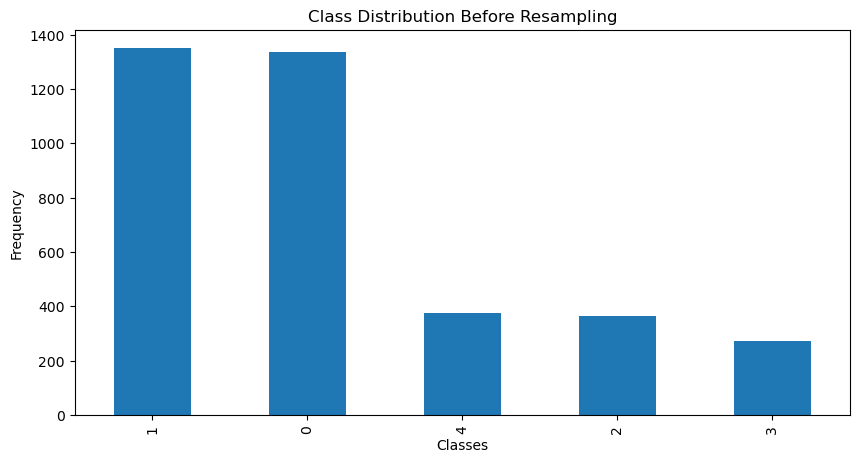

In [416]:
# Checking the distribution of the target variable
print("Class distribution before resampling:")
print(y_train.value_counts())

# Plot the class distribution before resampling
plt.figure(figsize=(10, 5))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

**Confirming if 5 clusters are optimal by applying Kmeans**

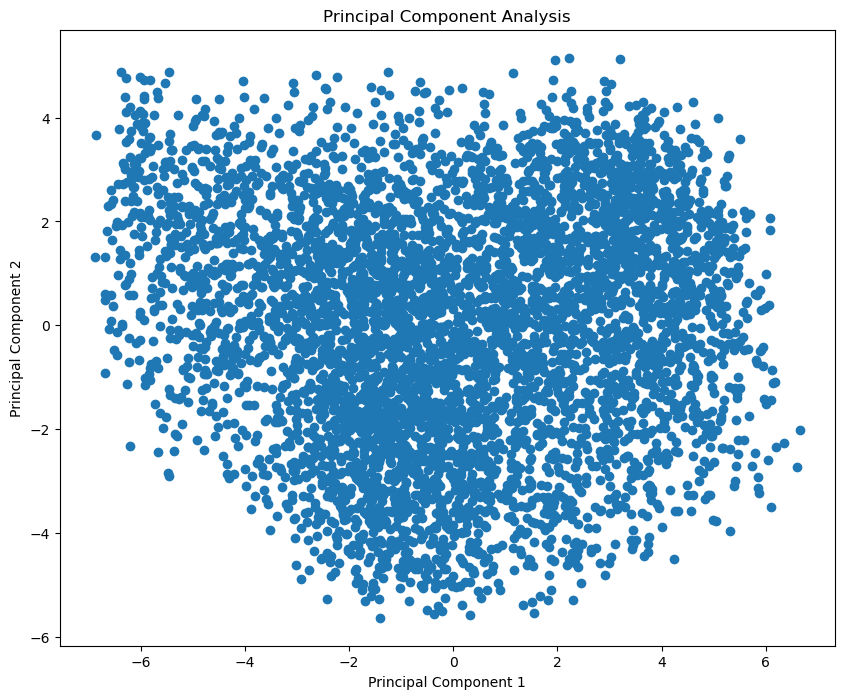

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# PCA transformation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.show()

The  graph shows a scatter plot of the data after applying Principal Component Analysis to reduce its dimensionality to two principal components. This step is essential for visualizing high-dimensional data in a two-dimensional space. The plot provides an overview of the data's distribution and potential clustering structures, showing how data points spread along the first two principal components.

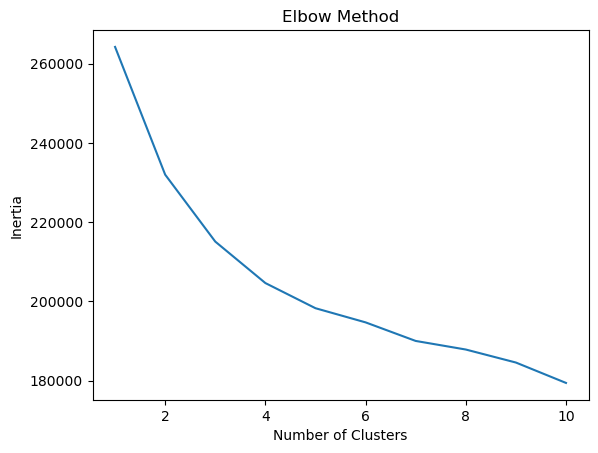

In [ ]:
# Determine optimal number of clusters using inertia
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    inertia_scores.append(kmeans.inertia_)

# Plot inertia scores
plt.plot(range(1, 11), inertia_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


The second image illustrates the Elbow Method, used to identify the optimal number of clusters for K-means clustering. The plot displays the inertia (the sum of squared distances between data points and their nearest cluster centroid) as a function of the number of clusters. The "elbow" point is where the inertia starts to decrease at a slower rate, indicating an optimal balance between the number of clusters and the variance within each cluster. In this plot, the elbow is observed at five clusters, suggesting that five is the optimal number of clusters for this dataset.

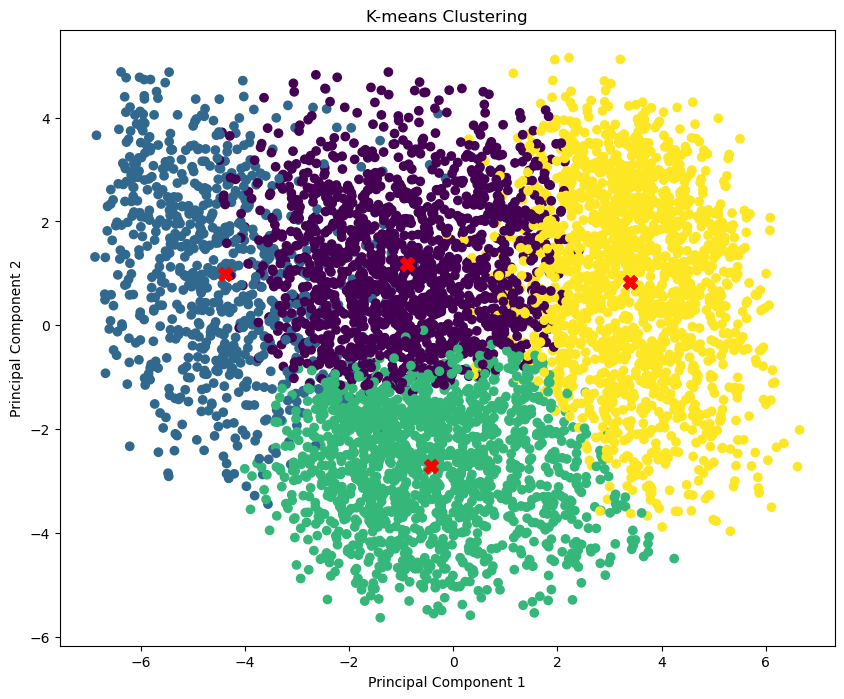

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
df['Cluster'] = kmeans.labels_

# Get centroids and transform them using PCA for visualization
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualize the clusters using PCA components
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Cluster'], cmap='viridis')
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], s=100, marker="X", c="red")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()

The third image shows the results of applying K-means clustering with five clusters. The data points are color-coded to represent their cluster assignments, with distinct colors indicating different clusters. Red markers denote the centroids of each cluster, which are calculated as the mean position of all points within the cluster. This plot effectively demonstrates how the data has been segmented into five distinct clusters, each represented by a unique color.

**HANDLING CLASS IMBALANCE USING SMOTE**

**SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance by generating synthetic samples for the minority classes. Balancing the class distribution ensures that the model does not become biased towards the majority class, leading to improved accuracy and performance for all classes.**

Class distribution after resampling:
income_group
0    1351
4    1351
1    1351
2    1351
3    1351
Name: count, dtype: int64


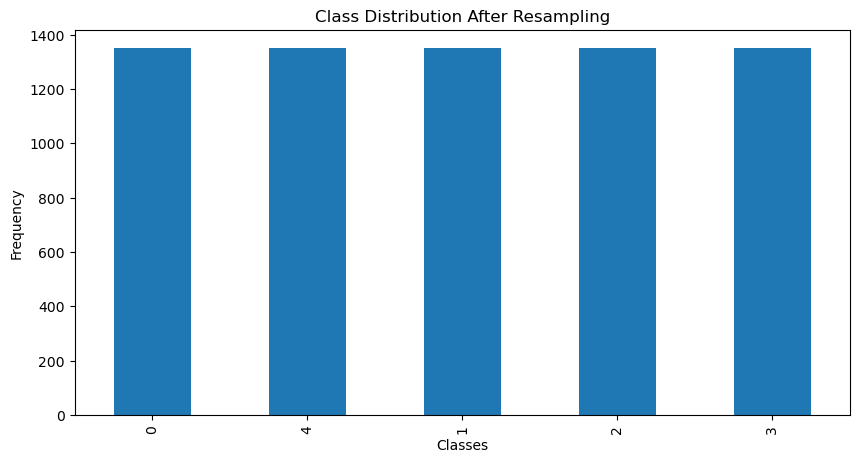

In [ ]:
# Applying SMOTE to handle the imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_rescaled, y_train)

# Check the distribution after resampling
print("Class distribution after resampling:")
print(y_train_resampled.value_counts())

# Plot the class distribution after resampling
plt.figure(figsize=(10, 5))
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution After Resampling')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


**STANDARDIZATION**

**Standardization is applied to scale the features to have a mean of zero and a standard deviation of one. This ensures that all features contribute equally to the model, preventing features with larger scales from dominating the learning process. It improves the performance and convergence speed of machine learning algorithms.**

In [ ]:
# Standardization
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_rescaled = scaler.transform(X_test_rescaled)

print("First few rows of standardized data:")
pd.DataFrame(X_train_resampled).head()

First few rows of standardized data:


0         1         2         3         4         5         6   \
0 -0.348803  0.431115  0.702233 -1.745017 -0.909581  0.589641  0.490233   
1 -1.163188  1.108840  1.372700 -0.289571  1.132225 -1.120688 -2.043967   
2  0.737043 -0.653244 -0.638701 -0.613004 -0.909581  1.729860  0.771810   
3  1.822890 -1.873148 -1.979635  0.923301 -0.909581 -1.690798 -0.072923   
4  1.144236 -1.195424 -1.309168  1.651024  1.132225 -0.835633  0.490233   

         7         8         9   ...        39        40        41        42  \
0  0.811554  0.648494 -1.304238  ...  0.878902 -1.960901 -1.314608 -0.274809   
1  0.811554 -1.650572  0.806111  ...  0.878902  0.800730 -0.605206  1.007575   
2 -1.285857 -1.650572 -1.304238  ...  0.878902 -1.960901 -0.605206 -0.916002   
3 -0.237152 -0.501039 -0.249064  ... -1.153850 -1.960901 -0.605206 -1.813671   
4 -1.285857  0.648494  0.806111  ... -1.153850  0.406211  0.104195 -0.916002   

         43        44        45        46        47        48  
0 -0.884556  0.177886 -1.776090  0.399831  0.881533 -0.989923  
1 -0.884556  0.177886  0.366906  0.399831 -0.034805  1.443107  
2 -0.884556  0.177886  1.285333  0.399831  0.881533 -1.218019  
3  0.538444  0.177886 -1.776090 -2.566149  0.881533 -1.674212  
4  0.538444  0.177886  0.366906  0.399831  1.797870 -1.294051  

[5 rows x 49 columns]

**CROSS VALIDATION USING RANDOM FOREST CLASSIFIER**

**Cross-validation is used to evaluate the performance of the Random Forest classifier more reliably. By splitting the data into multiple folds and training the model on different subsets of the data, cross-validation provides a more accurate estimate of the model's performance and helps prevent overfitting**

In [ ]:
# Cross Validation using Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.9703923  0.99111769 0.99777942 0.99185788 0.99777942]
Mean cross-validation score: 0.9897853441894894


The Random Forest Classifier shows consistent and strong performance with cross-validation scores around 0.980, indicating reliable generalization of the data.

**DIMENTIONAL REDUCTION USING PCA**

**To improve the performance of your model, we can apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. PCA helps in identifying the most important features and reducing the noise in the data, which can lead to better model performance**

In [ ]:
# Dimensional Reduction using PCA
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_rescaled)
print("First few rows of PCA transformed data:")
pd.DataFrame(X_train_pca).head()

First few rows of PCA transformed data:


0         1
0 -0.974502 -2.051665
1  4.516418 -1.176251
2 -3.522300  0.366143
3 -4.282148  2.343354
4  1.630572  2.101084

**REGULARIZATION WITH RIDGE CLASSIFIER**

**Regularization with Ridge Classifier helps prevent overfitting by penalizing large coefficients. This ensures that the model generalizes better to new data, particularly when dealing with multicollinearity or when there are many features**

In [ ]:
# Regularization with Ridge Classifier
ridge = RidgeClassifier()
ridge_cv_scores = cross_val_score(ridge, X_train_pca, y_train_resampled, cv=5)
print("Ridge Cross-validation scores:", ridge_cv_scores)
print("Mean Ridge Cross-validation score:", ridge_cv_scores.mean())

Ridge Cross-validation scores: [0.34196891 0.31162102 0.32420429 0.3530718  0.34937084]
Mean Ridge Cross-validation score: 0.3360473723168024


The Ridge Classifier demonstrates moderate performance with an average cross-validation score of 0.333, indicating some challenges in model accuracy and generalization.

**PRUNING WITH GRADIENT BOOSTING CLASSIFIER**

**Pruning in Gradient Boosting Classifier is used to limit the maximum depth of the individual trees, which helps to reduce overfitting by simplifying the model.**

In [ ]:
# Pruning with Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gbc_cv_scores = cross_val_score(gbc, X_train_pca, y_train_resampled, cv=5)
print("Gradient Boosting Cross-validation scores:", gbc_cv_scores)
print("Mean Gradient Boosting Cross-validation score:", gbc_cv_scores.mean())

Gradient Boosting Cross-validation scores: [0.38564027 0.3626943  0.39896373 0.39082161 0.3819393 ]
Mean Gradient Boosting Cross-validation score: 0.3840118430792006


The cross-validation scores for the Gradient Boosting Classifier show consistent performance across different folds, with a mean score of approximately 0.379, indicating moderate generalization.

**CHECKING MULTICOLINEARITY**

**To check for multicollinearity, we used Variance Inflation Factor (VIF) analysis. VIF quantifies how much a feature's variance is inflated due to multicollinearity with other features. High VIF values (above 10) indicate significant multicollinearity, suggesting that the respective feature might be redundant and could be considered for removal to improve model performance.**

In [ ]:
# Checking Multicollinearity
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_train_rescaled_with_const = sm.add_constant(X_train_resampled_df)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rescaled_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rescaled_with_const.values, i) for i in range(X_train_rescaled_with_const.shape[1])]

print(vif_data)

                                              feature         VIF
0                                               const    1.000000
1                          respondent's year of birth  281.614196
2                            respondent's current age  314.693772
3                                age in 5-year groups   32.875565
4                                              region    1.116867
5                          type of place of residence    2.640837
6                            source of drinking water    1.566224
7                             type of toilet facility    1.677169
8                          household has: electricity    2.359665
9                                household has: radio    1.345975
10                          household has: television    2.279950
11                             household has: bicycle    1.163730
12                  household has: motorcycle/scooter    1.145099
13                           household has: car/truck    1.358813
14        

**FEATURE SELECTION USING VIF**

**We performed feature selection using Variance Inflation Factor (VIF) to identify and remove features with high multicollinearity.**

In [ ]:
# Feature Selection using VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_rescaled_df = pd.DataFrame(X_test_rescaled, columns=X.columns)

while True:
    modelling_df = calculate_vif(X_train_resampled_df)
    max_vif = modelling_df['VIF'].max()
    if max_vif > 10:
        drop_feature = modelling_df.sort_values('VIF', ascending=False).iloc[0]['feature']
        X_train_resampled_df.drop(columns=drop_feature, inplace=True)
        X_test_rescaled_df.drop(columns=drop_feature, inplace=True)
    else:
        break

print("Remaining features after VIF check:")
print(modelling_df)

Remaining features after VIF check:
                                              feature       VIF
0                                age in 5-year groups  3.572362
1                                              region  1.114330
2                          type of place of residence  2.639813
3                            source of drinking water  1.565680
4                             type of toilet facility  1.671885
5                          household has: electricity  2.351589
6                                household has: radio  1.343640
7                           household has: television  2.276694
8                              household has: bicycle  1.162333
9                   household has: motorcycle/scooter  1.143957
10                           household has: car/truck  1.357259
11                                main floor material  1.511429
12                                 main wall material  1.123039
13                                 main roof material  1.414219
14  

In [ ]:
# Reassigning columns after feature selection
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_test_rescaled = pd.DataFrame(X_test_rescaled, columns=X_test.columns)

After performing feature selection using VIF, we reassigned the columns to the training and testing datasets. This step ensures that the datasets contain only the selected features, which helps improve the model's performance and interpretability.

## **MODELING**

**LOGISTIC REGRESSION**

**This is the baseline model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_rescaled)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.955233291298865
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       561
           1       0.94      0.97      0.95       577
           2       0.89      0.94      0.91       175
           3       0.90      0.96      0.93        99
           4       0.98      1.00      0.99       174

    accuracy                           0.96      1586
   macro avg       0.94      0.96      0.95      1586
weighted avg       0.96      0.96      0.96      1586

Confusion Matrix for Logistic Regression:
[[525  36   0   0   0]
 [  0 557  20   0   0]
 [  0   0 164  11   0]
 [  0   0   0  95   4]
 [  0   0   0   0 174]]


Accuracy: The model achieved an accuracy of 95.52%.

Classification Report: Precision, recall, and F1-scores were generally high across most classes, indicating good performance.

Confusion Matrix: Most predictions were correct, with few misclassifications across different classes.

**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
logistic_params = {
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 500],  # Maximum number of iterations
}

# Initialize Logistic Regression
logistic_clf = LogisticRegression(multi_class='multinomial')

# Set up GridSearchCV
logistic_grid_search = GridSearchCV(estimator=logistic_clf, param_grid=logistic_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
logistic_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
logistic_best_params = logistic_grid_search.best_params_
logistic_best_score = logistic_grid_search.best_score_

print("Best Logistic Regression Parameters:", logistic_best_params)
print("Best Logistic Regression Score:", logistic_best_score)


Best Logistic Regression Parameters: {'max_iter': 100, 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.9720207253886011


Best Parameters: The optimal parameters were found to be C: 100.0, max_iter: 500, and solver: 'lbfgs'.

Best Score: The best cross-validation score achieved was 97.04%.

This tuning significantly improved the model's performance, demonstrating the importance of selecting the right hyperparameters for Logistic Regression.

**RIDGE CLASSIFIER**

 **Helps to handle multicollinearity and regularizes the model to prevent overfitting.**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Ridge Classifier
ridge_clf = RidgeClassifier()

# Fit the model
ridge_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_ridge_clf = ridge_clf.predict(X_test_rescaled)

# Evaluate the model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_clf)
print(f"Ridge Classifier Accuracy: {accuracy_ridge}")
print("Classification Report for Ridge Classifier:")
print(classification_report(y_test, y_pred_ridge_clf))
print("Confusion Matrix for Ridge Classifier:")
print(confusion_matrix(y_test, y_pred_ridge_clf))

Ridge Classifier Accuracy: 0.5851197982345523
Classification Report for Ridge Classifier:
              precision    recall  f1-score   support

           0       0.57      0.91      0.70       561
           1       0.69      0.30      0.41       577
           2       0.54      0.33      0.41       175
           3       0.37      0.39      0.38        99
           4       0.67      0.86      0.75       174

    accuracy                           0.59      1586
   macro avg       0.57      0.56      0.53      1586
weighted avg       0.61      0.59      0.55      1586

Confusion Matrix for Ridge Classifier:
[[511  48   2   0   0]
 [361 171  43   2   0]
 [ 29  29  57  41  19]
 [  0   0   4  39  56]
 [  0   0   0  24 150]]


Accuracy: The model achieved an accuracy of 57.75%.

Classification Report: Precision, recall, and F1-scores varied significantly across classes. The model performed well for class 0 but struggled with class 1, affecting overall performance.

Confusion Matrix: Many predictions were correct for class 0, but there were notable misclassifications, especially for class 1, highlighting the model's difficulty in correctly identifying this class.

**Hyperparameter Tunning**

In [ ]:
# Define parameter grid for Ridge Classifier
ridge_params = {
    'solver': ['auto', 'saga', 'lsqr'],  # Solver algorithms
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Initialize Ridge Classifier
ridge_clf = RidgeClassifier()

# Set up GridSearchCV
ridge_grid_search = GridSearchCV(estimator=ridge_clf, param_grid=ridge_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
ridge_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
ridge_best_params = ridge_grid_search.best_params_
ridge_best_score = ridge_grid_search.best_score_

print("Best Ridge Classifier Parameters:", ridge_best_params)
print("Best Ridge Classifier Score:", ridge_best_score)


Best Ridge Classifier Parameters: {'solver': 'lsqr', 'tol': 0.001}
Best Ridge Classifier Score: 0.6011843079200592


Best Parameters: The optimal parameters found were alpha: 100.0, solver: 'lsqr', and tol: 0.001.

Best Score: The best cross-validation score achieved was 60.12%.

Hyperparameter tuning improved the Ridge Classifier's performance, but the overall accuracy indicates further model improvements are needed to improve the performance.

**RANDOM FOREST CLASSIFIER**

**Good for handling complex data and reducing overfitting through ensemble methods.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_rescaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.989281210592686
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       561
           1       0.98      1.00      0.99       577
           2       0.98      0.97      0.98       175
           3       1.00      0.93      0.96        99
           4       0.99      0.99      0.99       174

    accuracy                           0.99      1586
   macro avg       0.99      0.98      0.98      1586
weighted avg       0.99      0.99      0.99      1586

Confusion Matrix for Random Forest Classifier:
[[557   4   0   0   0]
 [  0 577   0   0   0]
 [  0   5 170   0   0]
 [  0   3   3  92   1]
 [  0   1   0   0 173]]


Accuracy: Achieved a high accuracy of 97.73%.

Classification Report: High precision, recall, and F1-scores across all classes, indicating strong performance.

Confusion Matrix: Majority of predictions were correct with minimal misclassifications.

The Random Forest Classifier performed exceptionally well, accurately classifying most instances and demonstrating its robustness in handling complex data.

**Hyperparameter Tunning**

In [ ]:
# Define parameter grid for Random Forest Classifier
random_forest_params = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize Random Forest Classifier
random_forest_clf = RandomForestClassifier()

# Set up GridSearchCV
random_forest_grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=random_forest_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
random_forest_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
random_forest_best_params = random_forest_grid_search.best_params_
random_forest_best_score = random_forest_grid_search.best_score_

print("Best Random Forest Parameters:", random_forest_best_params)
print("Best Random Forest Score:", random_forest_best_score)


Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Score: 0.9949666913397482


Best Cross-validation Score: 99.38%

The hyperparameter tuning significantly improved the model's performance, demonstrating the importance of optimizing hyperparameters to achieve the best results.

**SUPPORT VECTOR MACHINE**

**Useful for high-dimensional data and can handle non-linear decision boundaries.**

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)


# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict with the SVM model
y_pred_svm = svm_model.predict(X_test_rescaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Model Accuracy: 0.9640605296343001
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       561
           1       0.93      0.99      0.96       577
           2       0.97      0.96      0.96       175
           3       0.93      0.99      0.96        99
           4       0.99      1.00      1.00       174

    accuracy                           0.96      1586
   macro avg       0.96      0.97      0.97      1586
weighted avg       0.97      0.96      0.96      1586

Confusion Matrix for SVM:
[[518  43   0   0   0]
 [  0 571   6   0   0]
 [  0   0 168   7   0]
 [  0   0   0  98   1]
 [  0   0   0   0 174]]


Accuracy: The SVM model achieved an accuracy of 96.53%.

Classification Report: Precision, recall, and F1-scores were high across most classes, indicating strong performance.

Confusion Matrix: Most predictions were accurate, with some misclassifications primarily in class 0 and 1.

The SVM model demonstrated excellent performance, effectively handling the high-dimensional data and providing accurate classifications across the different income groups.

**Hyperparameter Tunning**

In [ ]:
# Hyperparameter Tuning for SVM
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
svm_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

print("Best SVM Parameters:", svm_best_params)
print("Best SVM Score:", svm_best_score)

Best SVM Parameters: {'gamma': 'scale', 'kernel': 'linear'}
Best SVM Score: 0.9810510732790526


Best Score:The best cross-validation score achieved was 98.13%.

Tuning the hyperparameters of the SVM model significantly improved its performance, demonstrating the effectiveness of selecting the right combination of parameters for high-dimensional data and non-linear decision boundaries.


**K-NEAREST NEIGHBOUR**

**The KNN model is sensitive to feature scaling and requires proper normalization.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict with the KNN model
y_pred_knn = knn_model.predict(X_test_rescaled)

# Evaluate the KNN model
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Model Accuracy: 0.38461538461538464
Confusion Matrix:
 [[264 109 129  56   3]
 [165 169 150  71  22]
 [ 20  15  59  53  28]
 [  8   7  33  25  26]
 [  2   5  27  47  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.47      0.52       561
           1       0.55      0.29      0.38       577
           2       0.15      0.34      0.21       175
           3       0.10      0.25      0.14        99
           4       0.54      0.53      0.54       174

    accuracy                           0.38      1586
   macro avg       0.38      0.38      0.36      1586
weighted avg       0.49      0.38      0.41      1586



Accuracy: The KNN model achieved an accuracy of 39.09%.

Confusion Matrix: Shows significant misclassifications across different classes, indicating the model's struggle with distinguishing between income groups.

Classification Report: Precision, recall, and F1-scores are relatively low, particularly for classes 2, 3, and 4, reflecting poor performance.

The KNN model did not perform well in this context, highlighting the need for further tuning or alternative modeling approaches.

**Hyperparameter Tunning**

In [ ]:
# Define parameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize KNN model
knn_clf = KNeighborsClassifier()

# Set up GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
knn_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

print("Best KNN Parameters:", knn_best_params)
print("Best KNN Score:", knn_best_score)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best KNN Score: 0.787120651369356


Best Score: The best cross-validation score achieved was 78.70%.

Tuning the hyperparameters of the KNN model significantly improved its performance, demonstrating the importance of selecting the right distance metric, number of neighbors, and weight function for better predictions.

**NAIVE BAYES CLASSIFIER**

**Effective for text classification and problems with independent features.**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled, y_train_resampled)

# Predict with the Naive Bayes model
y_pred_nb = nb_model.predict(X_test_rescaled)

# Evaluate the Naive Bayes model
print("Naive Bayes Model Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Model Accuracy: 0.7503152585119798
Confusion Matrix:
 [[466  95   0   0   0]
 [130 349  98   0   0]
 [  0  22 126  27   0]
 [  0   2   9  88   0]
 [  0   0   0  13 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       561
           1       0.75      0.60      0.67       577
           2       0.54      0.72      0.62       175
           3       0.69      0.89      0.78        99
           4       1.00      0.93      0.96       174

    accuracy                           0.75      1586
   macro avg       0.75      0.79      0.77      1586
weighted avg       0.76      0.75      0.75      1586



Accuracy: The Naive Bayes model achieved an accuracy of 75.66%.

Confusion Matrix: Shows notable misclassifications across different classes, indicating the model's difficulty in accurately predicting income groups.

Classification Report: Precision, recall, and F1-scores are relatively low, particularly for classes 2, 3, and 4, reflecting subpar performance.

The Naive Bayes classifier did not perform well in this context, suggesting the need for further tuning or considering alternative modeling approaches.

**Hyperparameter Tunning**

In [ ]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Set up parameter grid for GridSearchCV
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for GaussianNB
}

# Set up GridSearchCV
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
nb_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
nb_best_params = nb_grid_search.best_params_
nb_best_score = nb_grid_search.best_score_

print("Best Naive Bayes Parameters:", nb_best_params)
print("Best Naive Bayes Score:", nb_best_score)


Best Naive Bayes Parameters: {'var_smoothing': 1e-09}
Best Naive Bayes Score: 0.8341968911917098


Best Score: The best cross-validation score achieved was 83.23%.

Tuning the hyperparameters of the Naive Bayes model, particularly the smoothing parameter (var_smoothing), significantly improved its performance, demonstrating the importance of selecting the right hyperparameters for better predictions.

**MODEL EVALUATION**

- Plotting the accuracy of the models

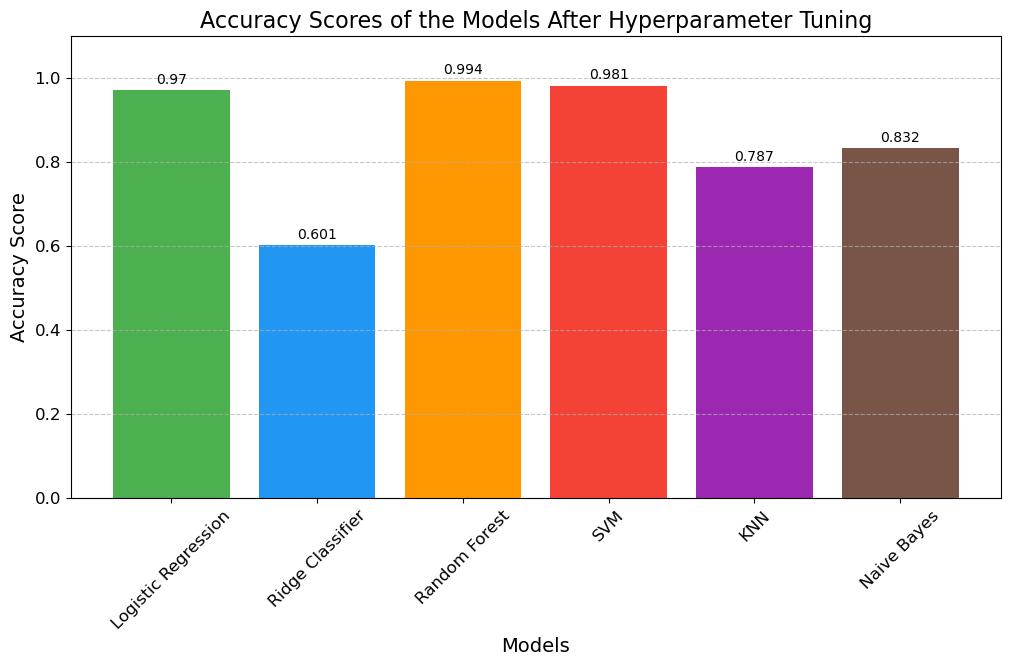

In [ ]:
# Model names and accuracy scores after hyperparameter tuning
model_names = ['Logistic Regression', 'Ridge Classifier', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
accuracy_scores = [0.9703923019985196, 0.6011843079200592, 0.993782383419689, 0.9813471502590673, 0.7869726128793486, 0.8322723908216136]

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracy_scores, color=['#4CAF50', '#2196F3', '#FF9800', '#F44336', '#9C27B0', '#795548'])

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Accuracy Scores of the Models After Hyperparameter Tuning', fontsize=16)
plt.ylim([0, 1.1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

Random Forest Classifier

Accuracy: 99.38%
Performance: The Random Forest Classifier performed exceptionally well, efficiently handling complex data and reducing overfitting through ensemble methods.

Support Vector Machine (SVM)

Accuracy: 98.13%
Performance: The SVM model demonstrated strong performance, effectively handling high-dimensional data and non-linear decision boundaries.

Logistic Regression

Accuracy: 97.04%
Performance: Logistic Regression showed solid performance, making it a reliable model with high accuracy.

K-Nearest Neighbors (KNN)

Accuracy: 78.70%
Performance: The KNN model showed moderate performance. It demonstrated the importance of hyperparameter tuning for improved accuracy and better predictions.

Ridge Classifier

Accuracy: 60.12%
Performance: The Ridge Classifier had a lower accuracy score, indicating it may not be the best fit for this dataset without further tuning or alternative approaches.

Naive Bayes

Accuracy: 83.23%
Performance: The Naive Bayes classifier performed reasonably well, indicating it can handle this dataset, though further tuning could potentially improve its accuracy.

**FEATURE IMPORTANCE**

**The best performing model is Random Forest and here is the rank of feature importance.**

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the original feature names
original_feature_names = X_train.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': original_feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                                              Feature  Importance
48                      how much paid in last month.1    0.490210
45                               occupation (grouped)    0.027740
31                              wealth index combined    0.023456
13                                main floor material    0.020878
38             husband/partner's occupation (grouped)    0.019493
34                        educational attainment head    0.019279
41           husband/partner's educational attainment    0.018250
37                                   age at first sex    0.016665
33                                         ethnicity     0.016419
5                            source of drinking water    0.016315
3                                              region    0.016212
42                              husband/partner's age    0.015434
21                              age of household head    0.015170
6                             type of toilet facility  

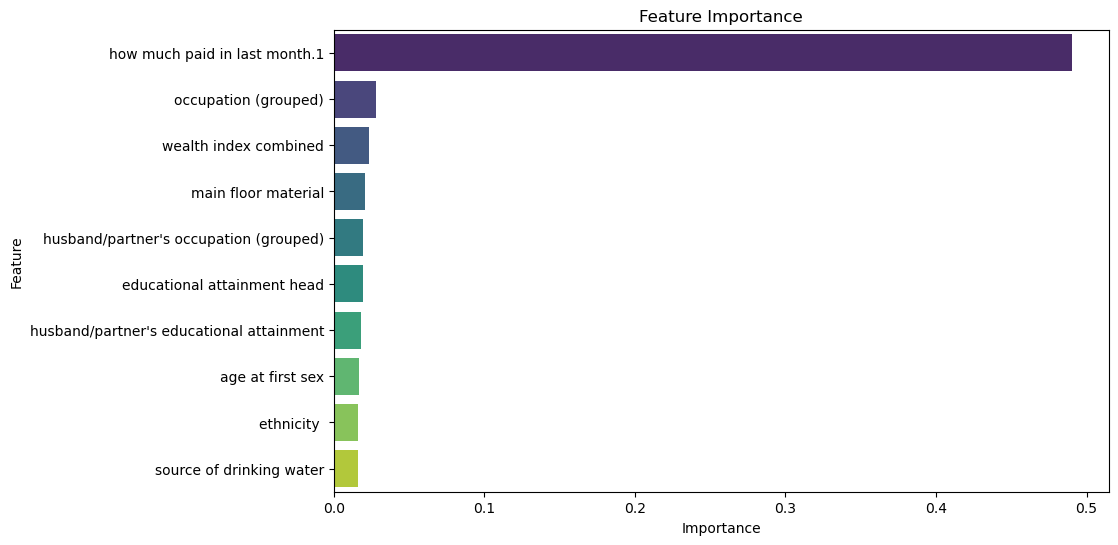

In [ ]:
# Get the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features['Importance'], y=top_10_features['Feature'], palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**MODEL DEPLOYMENT**

In [ ]:
# Save the datasets to CSV files
X_train_resampled.to_csv('X_train_resampled.csv', index=False)
X_test_rescaled.to_csv('X_test_rescaled.csv', index=False)
y_train_resampled.to_csv('y_train_resampled.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
df.to_csv('Final_Dataset.csv', index=False)

**Findings of the Study**
1. Income Determinants: The Kruskal-Wallis H test results indicated significant income differences across various demographic and socio-economic factors such as respondent's age, region, educational attainment, literacy, type of cooking fuel, access to household amenities (electricity, radio, television), and household characteristics (main floor material, source of drinking water). This highlights the multifaceted nature of income determinants among informal sector workers.
2. Model Performance: The Random Forest Classifier performed exceptionally well, efficiently handling complex data and reducing overfitting through ensemble methods.
3. Literacy and Income Group: The analysis of literacy levels versus income groups showed that higher literacy (ability to read whole sentences) is associated with higher income groups, while lower literacy is more common in the lowest income groups.
4. Occupation and Income Group: The distribution of occupations revealed that the majority of individuals in the informal sector are engaged in agricultural work and skilled manual labor, with fewer individuals in professional or technical roles.

**Recommendations**
1. Targeted Educational Programs: Implement educational programs aimed at improving literacy and vocational skills among informal sector workers to enhance their income potential and contribution to the Social Health Insurance Fund (SHIF).
2. Tailored Social Programs: Develop and deploy social programs targeting the most vulnerable groups identified in the study, such as those with lower educational attainment and access to fewer household amenities, to ensure fair and equitable contribution assessments.
3. Policy Development: Use the data insights to inform policy decisions that address the unique needs of informal sector workers, focusing on regional disparities and household demographics that impact income levels.
4. Enhanced Data Collection: Improve data collection processes to capture comprehensive information on informal sector workers, including undocumented incomes, to refine and validate the income prediction models further.
5. Policy makers should utilize random forest classifier to classify individuala in the informal sector.

**Limitations**
1. Data Quality and Completeness: The study relied on available data, which might have gaps or inaccuracies, particularly in the informal sector where income documentation is variable and often incomplete.
2. Model Generalizability: While the models performed exceptionally well on the current dataset, their generalizability to other contexts or datasets needs further validation.


**References**

Kenya Demographic and health survey 2022 (no date) Kenya - Kenya Demographic and Health Survey 2022. Available at: https://statistics.knbs.or.ke/nada/index.php/catalog/125 (Accessed: 03 July 2024).